In [ ]:
#!/usr/bin/env python
# coding: utf-8

# Climate catastrophe<br><br>
<br><br>
## Data analysis on changes in average temperatures<br><br>
<br><br>
Project analyzing data on changes in average temperatures. The `csv` file containing the raw data can be found at [kaggle.com](https://www.kaggle.com/datasets/sevgisarac/temperature-change)

### Import

In[ ]:

In[25]:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.interpolate import splrep, splev

### DataFrame

In[ ]:

Default value

In[26]:

In [2]:
pd.set_option("display.width", 80)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In[ ]:

Default DataFrame

In[27]:

In [3]:
df = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv",
                 encoding="Windows-1250")  # index_col=False

df.head(1)

In[ ]:

In[7]:

In [4]:
df.shape

(9656, 66)

In[ ]:

Columns name rename, where \s (inside names) into _

In[28]:

In [5]:
df = df.rename(columns={"Area Code": "Area_Code",
                        "Months Code": "Months_Code",
                        "Element Code": "Element_Code"})

In[ ]:

Replacing comas in string

In[29]:

In [6]:
df['Area'] = df['Area'].str.replace(',', '')

Replacing quote in string

In[10]:

In [7]:
df['Area'] = df['Area'].str.replace('\"', '')

In[ ]:

Optional 1 !!! (Jaro is using this in his part o code)<br><br>
Adding continent name & continent number columns. To have those columns added to default dataframe.<br><br>
1. Reading and creating additional frame, for join puprose (from '_Countries_Continents.csv' file)<br><br>
2. Inner join default dataframe with two new columns (continents for each country)<br><br>
(every rows containing country name will stay in df)<br><br>
(every rows containing geo-region name will not stay in df)

In[30]:

In [8]:
def optional_1(df):
    continent = pd.read_csv("_Countries_Continents.csv", names=[
                            'Area', 'Continent', 'Continent_Code'], encoding="UTF-8")
   
    df = pd.merge(left=continent, right=df, on='Area', how='inner')
    return df

In[ ]:

Optional 2 !!! (Jaro is using this in his part o code)<br><br>
1. Remove each row that contain 'Standard Deviation' value in column 'Element_Code' (code: 7271)<br><br>
2. For loop that will iterate each row (separately), searching NaN values in last 59 columns (year columns).<br><br>
After each iteration every NaN will be updated to row mean value (from 59 year columns for each row separately)<br><br>
new df is returned but it must be override, like: "df_new = optional_2(df)"<br><br>
(of course this can be the same variable: "df = optional_2(df)" )

In[31]:

In [9]:
def optional_2(df):
    df = df.loc[(df['Element_Code'] == 7271) & (df['Area_Code'] < 5000)]
    for i in range(df.shape[0]-1):
        m = round(df.iloc[i, -59:].mean(), 3)
        df.iloc[i, -59:] = df.iloc[i, -59:].fillna(m)
    return df

#### JARO

#### Displayng all rows in dataframe<br><br>
`pd.set_option('display.max_rows', None)`

In[ ]:

In[13]:

In [ ]:
jaro1 = df.copy()

In[ ]:

In[14]:

In [ ]:
jaro1.columns = jaro1.columns.str.replace('Y', '')

#### Whole World temperatures (1961-2019)

In[ ]:

In[15]:

In [ ]:
world_t = jaro1.loc[(jaro1['Area_Code'] == 5000) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# world_t.iloc[:,-59:].isna().sum()
world_t_ok = world_t.iloc[:, -59:]

#### Africa temperatures (1961-2019)

#### Africa temperatures (1961-2019)

In[ ]:

In[16]:

In [ ]:
africa_t = jaro1.loc[(jaro1['Area_Code'] == 5100) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# africa_t.iloc[:,-59:].isna().sum()
africa_t_ok = africa_t.iloc[:, -59:]

#### Caribbean, Northern & Central Americas temperatures (1961-2019)

In[ ]:

In[17]:

In [ ]:
north_america_t = jaro1.loc[((jaro1['Area_Code'] == 5203) | (jaro1['Area_Code'] == 5204) | (jaro1['Area_Code'] == 5206))
                            & (jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# north_america_t.iloc[:,-59:].isna().sum()
north_america_t_ok = north_america_t.iloc[:, -59:].mean()

#### South America temperatures (1961-2019)

In[ ]:

In[15]:

In [ ]:
south_america_t = jaro1.loc[(jaro1['Area_Code'] == 5207) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# south_america_t.iloc[:,-59:].isna().sum()
south_america_t_ok = south_america_t.iloc[:, -59:]

#### Asia temperatures (1961-2019)

In[ ]:

In[16]:

In [ ]:
asia_t = jaro1.loc[(jaro1['Area_Code'] == 5300) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# asia_t.iloc[:,-59:].isna().sum()
asia_t_ok = asia_t.iloc[:, -59:]

#### Europe temperatures (1961-2019)

In[ ]:

In[17]:

In [ ]:
europe_t = jaro1.loc[(jaro1['Area_Code'] == 5400) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# europe_t.iloc[:,-59:].isna().sum()
europe_t_ok = europe_t.iloc[:, -59:]

#### Oceania temperatures (1961-2019)

In[ ]:

In[18]:

In [ ]:
oceania_t = jaro1.loc[(jaro1['Area_Code'] == 5500) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# oceania_t.iloc[:,-59:].isna().sum()
oceania_t_ok = oceania_t.iloc[:, -59:]

#### Antarctica temperatures (1961-2019)

In[ ]:

In[19]:

In [ ]:
antarctica_t = jaro1.loc[(jaro1['Area_Code'] == 30) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# oceania_t.iloc[:,-59:].isna().sum()
antarctica_t_ok = antarctica_t.iloc[:, -59:]

In[ ]:

In[20]:

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = africa_t_ok.values.T

In[21]:

In [ ]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Africa')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[22]:

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = north_america_t_ok.values.T

In[23]:

In [ ]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='North America')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[24]:

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = south_america_t_ok.values.T

In[25]:

In [ ]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='South America')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[26]:

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = asia_t_ok.values.T

In[27]:

In [ ]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Asia')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[28]:

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = europe_t_ok.values.T

In[29]:

In [ ]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Europe')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[30]:

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = oceania_t_ok.values.T

In[31]:

In [ ]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Oceania')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

In[ ]:

In[32]:

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = antarctica_t_ok.values.T

In[33]:

In [ ]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Antarctica')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

Using 'Optional 1'

In[ ]:

In[34]:

In [ ]:
jaro = optional_1(df)
jaro.columns = jaro.columns.str.replace('Y', '')
jaro.shape

Removing specific rows, leaving only those where:<br><br><br>
1. 'Months_Code' is 'Meteorological year'<br><br><br>
2. 'Element_Code' is 'Temperature change'<br><br><br>
3. 'Area_Code' < 5000 means only countries (not regions name)

In[ ]:

In[35]:

In [ ]:
jaro = jaro.loc[(jaro['Months_Code'] == 7020) & (
    jaro['Element_Code'] == 7271) & (jaro['Area_Code'] < 5000)]
jaro.shape

Using 'Optional 2'

In[ ]:

In[36]:

In [ ]:
jaro = optional_2(jaro)
jaro.shape

#### If optional_1() and/or optional_2() isn't choosen then start from here:

Making individual variable for group purpose working

In[ ]:

In[37]:

In [ ]:
jaro = df.copy()

In[38]:

In [ ]:
antarctica_t = jaro1.loc[(jaro1['Area_Code'] == 30) & (
    jaro1['Element_Code'] == 7271) & (jaro1['Months_Code'] == 7020)]
# oceania_t.iloc[:,-59:].isna().sum()
antarctica_t_ok = antarctica_t.iloc[:, -59:]

In[ ]:

In[39]:

In [ ]:
jaro.iloc[:, -59:].isna().sum()

#### NORTHERN & CENTRAL AMERICA

In[ ]:

Making individual variable for group purpose working

DataFrame with 5 countries from America (Northern & Central

In[40]:

In [ ]:
NAmerica = df.copy()
NAmerica = optional_1(NAmerica)
NAmerica_full= NAmerica [(NAmerica.Continent == 'North America')]
NAmerica_c3 = NAmerica_full[(NAmerica_full.Area == 'Canada')
              | (NAmerica_full.Area == 'United States of America')
                | (NAmerica_full.Area == 'Dominican Republic')]
NAmerica_c3 = NAmerica_c3[(NAmerica_c3.Months == 'Meteorological year')
              & (NAmerica_c3.Element == 'Temperature change')]
NAmerica_c3

Inp[]:<br><br>
reparing data

In[41]:

In [ ]:
NAmerica_c3.columns = NAmerica_c3.columns.str.replace('Y', '')
del NAmerica_c3['Area_Code']
del NAmerica_c3['Months_Code']
del NAmerica_c3['Months']
del NAmerica_c3['Element']
del NAmerica_c3['Unit']
del NAmerica_c3['Element_Code']
del NAmerica_c3['Continent']
del NAmerica_c3['Continent_Code']
NAmerica_c3

In[]:<br><br>
Transformation table

In[42]:

In [ ]:
NAmerica_trans = pd.melt(NAmerica_c3, id_vars='Area')
NAmerica_trans = NAmerica_trans.rename(columns={'variable': 'Year',
                              'value': 'Temp'})
NAmerica_trans = NAmerica_trans.sort_values(by=['Area', 'Year'])
NAmerica_trans.Year = pd.to_numeric(NAmerica_trans.Year)
NAmerica_trans.info()

In[]:<br><br>
DataFrame with Forests

In[43]:

In [ ]:
NAmerica_forest = pd.read_csv('forest.csv')
NAmerica_forest = NAmerica_forest[(NAmerica_forest.country_name == 'Canada')
                | (NAmerica_forest.country_name == 'United States')
                | (NAmerica_forest.country_name == 'Dominican Republic')]

In[44]:

In [ ]:
NAmerica_forest = NAmerica_forest.rename(columns={'year': 'Year',
                                'country_name': 'Area',
                                'value': 'Forest'})

In[45]:

In [ ]:
NAmerica_forest.replace(to_replace="United States",
           value="United States of America", inplace=True)

In[46]:

In [ ]:
del NAmerica_forest['country_code']
NAmerica_forest.Year = pd.to_numeric(NAmerica_forest.Year)
NAmerica_forest.isnull().sum()
NAmerica_forest

In[]:<br><br>
DataFrame with CO2

In[47]:

In [ ]:
NAmerica_co2 = pd.read_csv('co2.csv')
NAmerica_co2 = NAmerica_co2[(NAmerica_co2.country_name == 'Canada')
          | (NAmerica_co2.country_name == 'United States')
          | (NAmerica_co2.country_name == 'Dominican Republic')]

In[48]:

In [ ]:
NAmerica_co2 = NAmerica_co2.rename(columns={'year': 'Year',
                          'country_name': 'Area',
                          'value': 'CO2'})

In[49]:

In [ ]:
NAmerica_co2.replace(to_replace="United States",
           value="United States of America", inplace=True)

In[50]:

In [ ]:
del NAmerica_co2['country_code']

In[51]:

In [ ]:
NAmerica_co2.isnull().sum()

In[52]:

In [ ]:
NAmerica_co2.info()

In[]:<br><br>
DataFrame with GDP

In[53]:

In [ ]:
NAmerica_gdp = pd.read_csv('GDP_percapita.csv')

In[54]:

In [ ]:
NAmerica_gdp = NAmerica_gdp.rename(columns={'Country Name':'Area'})

In[55]:

In [ ]:
NAmerica_gdp = NAmerica_gdp[(NAmerica_gdp.Area == 'Canada')
          | (NAmerica_gdp.Area == 'United States')
          | (NAmerica_gdp.Area == 'Dominican Republic')]

In[56]:

In [ ]:
NAmerica_gdp.replace(to_replace="United States",
           value="United States of America", inplace=True)
del NAmerica_gdp['Code']
del NAmerica_gdp['Unnamed: 65']

In[57]:

In [ ]:
NAmerica_gdp

In[]:<br><br>
Transform GDP

In[58]:

In [ ]:
NAmerica_gdp_trans = pd.melt(NAmerica_gdp, id_vars='Area')
NAmerica_gdp_trans = NAmerica_gdp_trans.rename(columns={'variable': 'Year',
                              'value': 'GDP_per_capita'})
NAmerica_gdp_trans = NAmerica_gdp_trans.sort_values(by=['Area', 'Year'])
NAmerica_gdp_trans.Year = pd.to_numeric(NAmerica_gdp_trans.Year)

In[59]:

In [ ]:
NAmerica_gdp_trans

In[]:<br><br>
Join  temperature, forest, co2 and GDP

In[60]:

In [ ]:
NAmerica_tf = pd.merge(NAmerica_trans, NAmerica_forest, on =['Area','Year'], how = 'left')
NAmerica_tfc = pd.merge(NAmerica_tf, NAmerica_co2, on=['Area', 'Year'], how = 'left')
NAmerica_tfcg = pd.merge(NAmerica_tfc, NAmerica_gdp_trans, on=['Area', 'Year'], how = 'left')
NAmerica_tfcg 

In[]:<br><br>
 Temperature

In[61]:

In [ ]:
tfc_Canada = NAmerica_tfcg [(NAmerica_tfcg.Area == 'Canada')]
tfc_US = NAmerica_tfcg[(NAmerica_tfcg.Area == 'United States of America')]
tfc_Dominican = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Dominican Republic')]
plt.plot(tfc_Canada.Year, tfc_Canada.Temp, label = 'Kanada', color = '#00035b')
plt.plot(tfc_US.Year, tfc_US.Temp, label = 'Stany Zjednoczone', color = '#0343df')
plt.plot(tfc_Dominican.Year, tfc_Dominican.Temp, label = 'Dominikana', color = '#a2cffe')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura \u2103')
plt.title('Zmiany temperatur (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 Forest

In[62]:

In [ ]:
tfc_Canada = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Canada')]
tfc_US = NAmerica_tfcg[(NAmerica_tfcg.Area == 'United States of America')]
tfc_Dominican = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Dominican Republic')]
plt.plot(tfc_Canada.Year, tfc_Canada.Forest, label = 'Kanada', color = '#00035b')
plt.plot(tfc_US.Year, tfc_US.Forest, label = 'Stany Zjednoczone', color = '#0343df')
plt.plot(tfc_Dominican.Year, tfc_Dominican.Forest, label = 'Dominikana', color = '#a2cffe')
plt.yscale('log')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Poziom zalesienia')
plt.title('Zalesienie (1990-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 CO2

In[63]:

In [ ]:
tfc_Canada = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Canada')]
tfc_US = NAmerica_tfcg[(NAmerica_tfcg.Area == 'United States of America')]
tfc_Dominican = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Dominican Republic')]
plt.plot(tfc_Canada.Year, tfc_Canada.CO2, label = 'Kanada', color = '#00035b')
plt.plot(tfc_US.Year, tfc_US.CO2, label = 'Stany Zjednoczone', color = '#0343df')
plt.plot(tfc_Dominican.Year, tfc_Dominican.CO2, label = 'Dominikana', color = '#a2cffe')
plt.yscale('log')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Emisja CO^2')
plt.title('Emisja CO^2 (1961-2019)')
plt.legend()
plt.show()

In[]:<br>
anada: temp vs CO2

In [ ]:
fig, ax1 = plt.subplots()

In [ ]:
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#00035b')
ax1.plot(tfc_Canada.Year, tfc_Canada.Temp, label = 'Kanada', color = '#00035b')
ax1.tick_params(axis='y', labelcolor='#00035b')

In [ ]:
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

In [ ]:
ax2.set_ylabel('CO^2', color='black')  # we already handled the x-label with ax1
ax2.plot(tfc_Canada.Year, tfc_Canada.CO2, label = 'Kanada', color = 'black')
ax2.tick_params(axis='y', labelcolor='black')

In [ ]:
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Kanada: zmiany temperatury vs emisja CO^2 (1961-2019)')

In [ ]:
plt.show()

In[]:<br>
SA: temp vs CO2

In [ ]:
fig, ax1 = plt.subplots()

In [ ]:
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#0343df')
ax1.plot(tfc_US.Year, tfc_US.Temp, label = 'USA', color = '#0343df')
ax1.tick_params(axis='y', labelcolor='#0343df')

In [ ]:
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

In [ ]:
ax2.set_ylabel('CO^2', color='black')  # we already handled the x-label with ax1
ax2.plot(tfc_US.Year, tfc_US.CO2, label = 'USA', color = 'black')
ax2.tick_params(axis='y', labelcolor='black')

In [ ]:
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('USA: zmiany temperatury vs emisja CO^2 (1961-2019)')

In [ ]:
plt.show()

In[]:<br>
ominikana: temp vs CO2

In [ ]:
fig, ax1 = plt.subplots()

In [ ]:
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#a2cffe')
ax1.plot(tfc_Dominican.Year, tfc_Dominican.Temp, label = 'Dominikana', color = '#a2cffe')
ax1.tick_params(axis='y', labelcolor='#a2cffe')

In [ ]:
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

In [ ]:
ax2.set_ylabel('CO^2', color='black')  # we already handled the x-label with ax1
ax2.plot(tfc_Dominican.Year, tfc_Dominican.CO2, label = 'Dominikana', color = 'black')
ax2.tick_params(axis='y', labelcolor='black')

In [ ]:
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Dominikana: zmiany temperatury vs emisja CO^2 (1961-2019)')

In [ ]:
plt.show()

n[]:<br><br>
Correlation_Canada

In[64]:

In [ ]:
corr_Canada = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Canada')]
del corr_Canada['Area']
del corr_Canada['Year']

In[65]:

In [ ]:
corr_Canada= corr_Canada.corr()
sns.heatmap(corr_Canada, annot=True)
plt.show()

n[]:<br><br>
Correlation_USA

In[66]:

In [ ]:
corr_USA = NAmerica_tfcg[(NAmerica_tfcg.Area == 'United States of America')]
del corr_USA['Area']
del corr_USA['Year']

In[67]:

In [ ]:
corr_USA= corr_USA.corr()
sns.heatmap(corr_USA, annot=True)
plt.show()

n[]:<br><br>
Correlation_Dominican

In[68]:

In [ ]:
corr_Dominican = NAmerica_tfcg[(NAmerica_tfcg.Area == 'Dominican Republic')]
del corr_Dominican['Area']
del corr_Dominican['Year']

In[69]:

In [ ]:
corr_Dominican= corr_Dominican.corr()
sns.heatmap(corr_Dominican, annot=True)
plt.show()

#### AFRICA<br><br>
In[ ]:

Making individual variable for group purpose working

DataFrame with 3 countries from Africa

In[70]:

In [ ]:
africa = df.copy()
africa_t = optional_1(africa)
africa_t_full= africa_t [(africa_t.Continent == 'Africa')]
africa_t_c3 = africa_t_full[(africa_t_full.Area == 'Algeria')
                | (africa_t_full.Area == 'United Republic of Tanzania')
                | (africa_t_full.Area == 'Mozambique')]
africa_t_c3 = africa_t_c3[(africa_t_c3.Months == 'Meteorological year')
              & (africa_t_c3.Element == 'Temperature change')]
africa_t_c3

Inp[]:<br><br>
reparing data

In[71]:

In [ ]:
africa_t_c3.columns = africa_t_c3.columns.str.replace('Y', '')
africa_t_c3.replace(to_replace="United Republic of Tanzania",
           value="Tanzania", inplace=True)
del africa_t_c3['Area_Code']
del africa_t_c3['Months_Code']
del africa_t_c3['Months']
del africa_t_c3['Element']
del africa_t_c3['Unit']
del africa_t_c3['Element_Code']
del africa_t_c3['Continent']
del africa_t_c3['Continent_Code']
africa_t_c3

In[]:<br><br>
Transformation table

In[72]:

In [ ]:
africa_t_c3_trans = pd.melt(africa_t_c3, id_vars='Area')
africa_t_c3_trans = africa_t_c3_trans.rename(columns={'variable': 'Year',
                              'value': 'Temp'})
africa_t_c3_trans = africa_t_c3_trans.sort_values(by=['Area', 'Year'])
africa_t_c3_trans.Year = pd.to_numeric(africa_t_c3_trans.Year)
africa_t_c3_trans.info()

In[]:<br><br>
DataFrame with Forests

In[73]:

In [ ]:
africa_forest = pd.read_csv('forest.csv')
africa_forest = africa_forest[(africa_forest.country_name == 'Algeria')
                | (africa_forest.country_name == 'Tanzania')
            
                | (africa_forest.country_name == 'Mozambique')]

In[74]:

In [ ]:
africa_forest = africa_forest.rename(columns={'year': 'Year',
                                'country_name': 'Area',
                                'value': 'Forest'})

In[75]:

In [ ]:
del africa_forest['country_code']
africa_forest.Year = pd.to_numeric(africa_forest.Year)
africa_forest.isnull().sum()
africa_forest.info()

In[]:<br><br>
DataFrame with CO2

In[76]:

In [ ]:
africa_co2 = pd.read_csv('co2.csv')
africa_co2 = africa_co2[(africa_co2.country_name == 'Algeria')
          | (africa_co2.country_name == 'Tanzania')
          | (africa_co2.country_name == 'Mozambique')]

In[77]:

In [ ]:
africa_co2 = africa_co2.rename(columns={'year': 'Year',
                          'country_name': 'Area',
                          'value': 'CO2'})

In[78]:

In [ ]:
del africa_co2['country_code']

In[79]:

In [ ]:
africa_co2.isnull().sum()
africa_co2.info()

In[]:<br><br>
DataFrame with GDP

In[80]:

In [ ]:
africa_gdp = pd.read_csv('GDP_percapita.csv')

In[81]:

In [ ]:
africa_gdp = africa_gdp.rename(columns={'Country Name':'Area'})

In[82]:

In [ ]:
africa_gdp = africa_gdp[(africa_gdp.Area == 'Algeria')
          | (africa_gdp.Area == 'Tanzania')
          | (africa_gdp.Area == 'Mozambique')]

In[83]:

In [ ]:
del africa_gdp['Code']
del africa_gdp['Unnamed: 65']

In[84]:

In [ ]:
africa_gdp

In[]:<br><br>
Transform GDP

In[85]:

In [ ]:
africa_gdp_trans = pd.melt(africa_gdp, id_vars='Area')
africa_gdp_trans = africa_gdp_trans.rename(columns={'variable': 'Year',
                              'value': 'GDP_per_capita'})
africa_gdp_trans = africa_gdp_trans.sort_values(by=['Area', 'Year'])
africa_gdp_trans.Year = pd.to_numeric(africa_gdp_trans.Year)

In[86]:

In [ ]:
africa_gdp_trans.Area.unique()

In[]:<br><br>
Join  temperature, forest & co2

In[87]:

In [ ]:
africa_tf = pd.merge(africa_t_c3_trans, africa_forest, on =['Area','Year'], how = 'left')
africa_tfc = pd.merge(africa_tf, africa_co2, on=['Area', 'Year'], how = 'left')
africa_tfcg = pd.merge(africa_tfc, africa_gdp_trans, on =['Area', 'Year'], how = 'left')
africa_tfcg

In[]:<br><br>
 Temperature

In[88]:

In [ ]:
tfcg_Algeria = africa_tfcg[(africa_tfcg.Area == 'Algeria')]
tfcg_Tanzania = africa_tfcg[(africa_tfcg.Area == 'Tanzania')]
tfcg_Mozambique = africa_tfcg[(africa_tfcg.Area == 'Mozambique')]
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.Temp, label = 'Algieria', color = '#000000')
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.Temp, label = 'Tanzania', color='#929591')
plt.plot(tfcg_Mozambique.Year, tfcg_Mozambique.Temp, label = 'Mozambik', color = '#d8dcd6')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura \u2103')
plt.title('Zmiany temperatur (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 ALGERIA: Temperature vs GDP

In[89]:

In [ ]:
tfcg_Algeria = africa_tfcg[(africa_tfcg.Area == 'Algeria')]
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.Temp, label = 'Algieria_temp')
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.GDP_per_capita, label = 'Algieria_GDP')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura \u2103 \n GDP per capita')
plt.title('AGLIERIA: Zmiany temperatur vs GDP per capita (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 Tanzania: Temperature vs GDP

In[90]:

In [ ]:
tfcg_Tanzania = africa_tfcg[(africa_tfcg.Area == 'Tanzania')]
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.Temp, label = 'Tanzania_temp')
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.GDP_per_capita, label = 'Tanzania_GDP')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura \u2103 \n GDP per capita')
plt.title('TANZANIA: Zmiany temperatur vs GDP per capita (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 Mozambique: Temperature vs GDP

In[91]:

In [ ]:
tfcg_Mozambique = africa_tfcg[(africa_tfcg.Area == 'Mozambique')]
plt.plot(tfcg_Mozambique.Year, tfcg_Mozambique.Temp, label = 'Mozambik_temp')
plt.plot(tfcg_Mozambique.Year, tfcg_Mozambique.GDP_per_capita, label = 'Mozambik_GDP')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura \u2103 \n GDP per capita')
plt.title('MOZAMBIK: Zmiany temperatur vs GDP per capita (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 Forest

In[92]:

In [ ]:
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.Forest, label = 'Algieria', color = '#000000')
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.Forest, label = 'Tanzania', color='#929591')
plt.plot(tfcg_Mozambique.Year, tfcg_Mozambique.Forest, label = 'Mozambik', color = '#d8dcd6')
plt.yscale('log')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Poziom zalesienia')
plt.title('Zalesienie (1990-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 CO2

In[93]:

In [ ]:
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.CO2, label = 'Algieria', color = '#000000')
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.CO2, label = 'Tanzania', color='#929591')
plt.plot(tfcg_Mozambique.Year, tfcg_Mozambique.CO2, label = 'Mozambik', color = '#d8dcd6')
plt.yscale('log')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Emisja CO^2')
plt.title('Emisja CO^2 (1961-2019)')
plt.legend()
plt.show()

In[]:<br><br>
 GDP

In[94]:

In [ ]:
plt.plot(tfcg_Algeria.Year, tfcg_Algeria.GDP_per_capita, label = 'Algieria', color = '#000000')
plt.plot(tfcg_Tanzania.Year, tfcg_Tanzania.GDP_per_capita, label = 'Tanzania', color='#929591')
plt.plot(tfcg_Mozambique.Year, tfcg_Mozambique.GDP_per_capita, label = 'Mozambik', color = '#d8dcd6')
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('GDP per capita (zmiana)')
plt.title('GDP per capita(1961-2019)')
plt.legend()
plt.show()

n[]:<br>
lgeria: temp vs CO2

In [ ]:
fig, ax1 = plt.subplots()

In [ ]:
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#000000')
ax1.plot(tfcg_Algeria.Year, tfcg_Algeria.Temp, label = 'Algeria', color = '#000000')
ax1.tick_params(axis='y', labelcolor='#000000')

In [ ]:
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

In [ ]:
ax2.set_ylabel('CO^2', color='red')  # we already handled the x-label with ax1
ax2.plot(tfcg_Algeria.Year, tfcg_Algeria.CO2, label = 'Algeria', color = 'red')
ax2.tick_params(axis='y', labelcolor='red')

In [ ]:
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Algeria: zmiany temperatury vs emisja CO^2 (1961-2019)')

In [ ]:
plt.show()

n[]:<br>
anzania: temp vs CO2

In [ ]:
fig, ax1 = plt.subplots()

In [ ]:
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#929591')
ax1.plot(tfcg_Tanzania.Year, tfcg_Tanzania.Temp, label = 'Tanzania', color ='#929591')
ax1.tick_params(axis='y', labelcolor='#929591')

In [ ]:
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

In [ ]:
ax2.set_ylabel('CO^2', color='red')  # we already handled the x-label with ax1
ax2.plot(tfcg_Tanzania.Year, tfcg_Tanzania.CO2, label = 'Tanzania', color = 'red')
ax2.tick_params(axis='y', labelcolor='red')

In [ ]:
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Tanzania: zmiany temperatury vs emisja CO^2 (1961-2019)')

In [ ]:
plt.show()

n[]:<br>
ozambik: temp vs CO2

In [ ]:
fig, ax1 = plt.subplots()

In [ ]:
ax1.set_xlabel('Rok')
ax1.set_ylabel('Temperatura', color='#d8dcd6')
ax1.plot(tfcg_Mozambique.Year, tfcg_Mozambique.Temp, label = 'Mozambik', color ='#d8dcd6')
ax1.tick_params(axis='y', labelcolor='#d8dcd6')

In [ ]:
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

In [ ]:
ax2.set_ylabel('CO^2', color='red')  # we already handled the x-label with ax1
ax2.plot(tfcg_Mozambique.Year, tfcg_Mozambique.CO2, label = 'Mozambik', color = 'red')
ax2.tick_params(axis='y', labelcolor='red')

In [ ]:
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Mozambik: zmiany temperatury vs emisja CO^2 (1961-2019)')

In [ ]:
plt.show()

n[]:<br><br>
Correlation_Algeria

In[95]:

In [ ]:
corr_Algeria = africa_tfcg[(africa_tfcg.Area == 'Algeria')]
del corr_Algeria['Area']
del corr_Algeria['Year']

In[96]:

In [ ]:
corr_Algeria = corr_Algeria.corr()
sns.heatmap(corr_Algeria, annot=True)
plt.show()

n[]:<br><br>
Correlation_Tanzania

In[97]:

In [ ]:
corr_Tanzania = africa_tfcg[(africa_tfcg.Area == 'Tanzania')]
del corr_Tanzania['Area']
del corr_Tanzania['Year']

In[98]:

In [ ]:
corr_Tanzania = corr_Tanzania.corr()
sns.heatmap(corr_Tanzania, annot=True)
plt.show()

n[]:<br><br>
Correlation_Mozambique

In[99]:

In [ ]:
corr_Mozambique = africa_tfcg[(africa_tfcg.Area == 'Mozambique')]
del corr_Mozambique['Area']
del corr_Mozambique['Year']

In[100]:

In [ ]:
corr_Mozambique = corr_Mozambique.corr()
sns.heatmap(corr_Mozambique, annot=True)
plt.show()

#### MATTHIAS

In[ ]:

Making individual variable for group purpose working

In[101]:

In [78]:
mateo = df.copy()

DataFrame with 5 countries from America (Northern & Central)

In[102]:

In [79]:
mateo1=optional_1(mateo)

In[ ]:

Creating individual Dataframe for countries in Asia

In[103]:

In [80]:
asia=mateo1[(mateo1.Continent_Code==2) & (mateo1.Months_Code==7020) & (mateo1.Element_Code==7271)]

In[ ]:

In[104]:

In [81]:
get_ipython().run_line_magic('matplotlib', 'inline')
x = world_t_ok.columns
y1 = world_t_ok.values.T
y2 = europe_t_ok.values.T

NameError: name 'world_t_ok' is not defined

In[105]:

In [82]:
plt.plot(x, y1, label='World')
plt.plot(x, y2, label='Europe')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show()

NameError: name 'x' is not defined

Droping unnecessary columns

In[106]:

In [83]:
asia=asia.drop(columns=['Continent',
                            'Continent_Code',
                             'Area_Code',
                             'Months_Code',
                             'Months',
                             'Element_Code',
                             'Element',
                             'Unit'])

In[ ]:

Repalcing unnecessary marks with space

In[107]:

In [84]:
asia.columns=asia.columns.str.replace('Y', '')
asia['Area'] = asia['Area'].str.replace("'" ,' ')

In[ ]:

Dataframe 3 Asia countries

In[108]:

In [85]:
asia_3=asia[(asia.Area=='India') | (asia.Area=='Republic of Korea') | (asia.Area=='China')]

In[ ]:

In[109]:

In [86]:
asia_3.isnull().sum()

Area    0
1961    0
1962    0
1963    0
1964    0
1965    0
1966    0
1967    0
1968    0
1969    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
dtype: int64

In[ ]:

Transform teble 

In[110]:

In [87]:
asia_3_tmp = pd.melt(asia_3, id_vars='Area')

In[ ]:

Renameing columns

In[111]:

In [88]:
asia_3_tmp=asia_3_tmp.rename(columns= {'variable' : 'Year',
                                       'value' : 'Temp' })

In[ ]:

In [89]:
asia_3_tmp = asia_3_tmp.sort_values(by= ['Area','Year'])

Making x variables

In [ ]:
 In[112]:

In [90]:
x_mat=asia_3_tmp.Year.unique()

Converting object in to int64

In [ ]:
In[]:

In [91]:
x_mat=x_mat.astype(np.int64)

Making y variables for 3 Asia countries

In [ ]:
In[]:

In [92]:
y1_tmp=asia_3_tmp[asia_3_tmp.Area=='China'].iloc[:,2].values.T
y2_tmp=asia_3_tmp[asia_3_tmp.Area=='India'].iloc[:,2].values.T
y3_tmp=asia_3_tmp[asia_3_tmp.Area=='Republic of Korea'].iloc[:,2].values.T

Preparing plots for smoothing

In [ ]:
In[]:

In [93]:
bspl1 = splrep(x_mat,y1_tmp,s=4)   
bspl_y1 = splev(x_mat,bspl1) 

In [94]:
bspl2 = splrep(x_mat,y2_tmp,s=4)   
bspl_y2 = splev(x_mat,bspl2) 

In [95]:
bspl3 = splrep(x_mat,y3_tmp,s=12)   
bspl_y3 = splev(x_mat,bspl3)

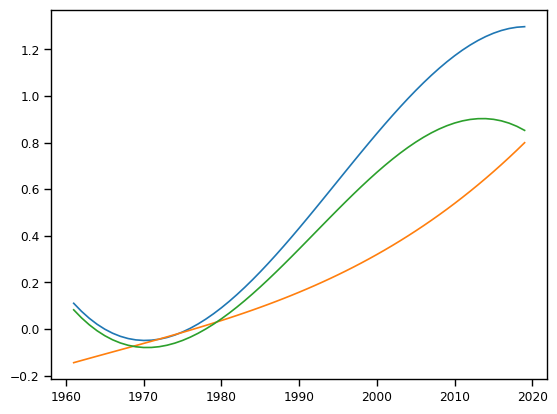

In [96]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x_mat, bspl_y1, label='Chiny')
plt.plot(x_mat, bspl_y2, label='Indie')
plt.plot(x_mat, bspl_y3, label='South Korea')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


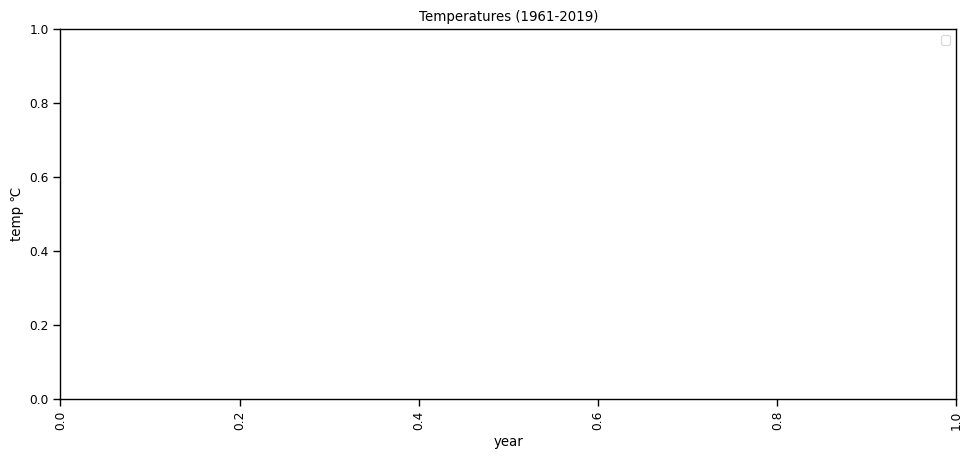

In [97]:
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show();

#### South America

In[ ]:

Making individual variable for group purpose working

##### DataFrame with 3 countries from South America 

##### Temperature change in 3 countries of South America

In[18]:

In [10]:
SouthAmerica = df.copy()
SouthAmerica = optional_1(SouthAmerica)
SouthAmerica_whole= SouthAmerica [(SouthAmerica.Continent == 'Shouth America')]
SouthAmerica_temp = SouthAmerica_whole[(SouthAmerica_whole.Area == 'Argentina')| (SouthAmerica_whole.Area == 'Brazil') | (SouthAmerica_whole.Area == 'Peru')]
SouthAmerica_temp = SouthAmerica_temp[(SouthAmerica_temp.Months == 'Meteorological year') & (SouthAmerica_temp.Element == 'Temperature change')]
SouthAmerica_temp

Area       Continent  Continent_Code  Area_Code  Months_Code  \
338   Argentina  Shouth America               6          9         7020   
984      Brazil  Shouth America               6         21         7020   
5710       Peru  Shouth America               6        170         7020   

                   Months  Element_Code             Element Unit  Y1961  ...  \
338   Meteorological year          7271  Temperature change   °C  0.129  ...   
984   Meteorological year          7271  Temperature change   °C  0.165  ...   
5710  Meteorological year          7271  Temperature change   °C -0.023  ...   

      Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
338   0.078  0.324  0.748  0.394  0.912  0.910  0.459  1.057  0.828  0.709  
984   1.181  0.841  1.118  1.060  1.293  1.697  1.607  1.498  1.284  1.672  
5710  1.227  0.914  0.998  0.788  0.997  1.377  1.462  1.041  0.795  1.097  

[3 rows x 68 columns]

In [11]:
SouthAmerica_temp.columns = SouthAmerica_temp.columns.str.replace('Y', '')
del SouthAmerica_temp['Area_Code']
del SouthAmerica_temp['Months_Code']
del SouthAmerica_temp['Months']
del SouthAmerica_temp['Element']
del SouthAmerica_temp['Unit']
del SouthAmerica_temp['Element_Code']
del SouthAmerica_temp['Continent']
del SouthAmerica_temp['Continent_Code']
SouthAmerica_temp

Area   1961   1962  1963   1964   1965   1966   1967   1968  1969  \
338   Argentina  0.129 -0.058 0.146 -0.368  0.063 -0.190 -0.023  0.456 0.283   
984      Brazil  0.165 -0.180 0.149 -0.235 -0.079  0.051  0.072 -0.384 0.349   
5710       Peru -0.023 -0.160 0.061 -0.241  0.216  0.081 -0.279 -0.299 0.505   

      ...  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  
338   ... 0.078 0.324 0.748 0.394 0.912 0.910 0.459 1.057 0.828 0.709  
984   ... 1.181 0.841 1.118 1.060 1.293 1.697 1.607 1.498 1.284 1.672  
5710  ... 1.227 0.914 0.998 0.788 0.997 1.377 1.462 1.041 0.795 1.097  

[3 rows x 60 columns]

In[ ]:

##### Modified table - Temperature change

In[19]:

In [12]:
SouthAmerica_temp_mdf = pd.melt(SouthAmerica_temp, id_vars='Area')
SouthAmerica_temp_mdf = SouthAmerica_temp_mdf.rename(columns={'variable': 'Year','value': 'Temperature'})
SouthAmerica_temp_mdf= SouthAmerica_temp_mdf.sort_values(by=['Area', 'Year'])
SouthAmerica_temp_mdf

Area  Year  Temperature
0    Argentina  1961        0.129
3    Argentina  1962       -0.058
6    Argentina  1963        0.146
9    Argentina  1964       -0.368
12   Argentina  1965        0.063
..         ...   ...          ...
164       Peru  2015        1.377
167       Peru  2016        1.462
170       Peru  2017        1.041
173       Peru  2018        0.795
176       Peru  2019        1.097

[177 rows x 3 columns]

In[20]:

In [13]:
SouthAmerica_temp_mdf.Year = pd.to_numeric(SouthAmerica_temp_mdf.Year)

In[ ]:

##### Value of CO2 in 3 countries of South America

In[22]:

In [14]:
SouthAmerica_CO2 = pd.read_csv('co2.csv')

In[23]:

In [15]:
del SouthAmerica_CO2['country_code']

In[24]:

In [16]:
SouthAmerica_CO2 = SouthAmerica_CO2[(SouthAmerica_CO2.country_name == 'Argentina') | (SouthAmerica_CO2.country_name == 'Brazil')
          | (SouthAmerica_CO2.country_name == 'Peru')]
SouthAmerica_CO2

country_name  year     value
507     Argentina  1960 48815.104
508     Argentina  1961 51180.319
509     Argentina  1962 53695.881
510     Argentina  1963 50083.886
511     Argentina  1964 55727.399
...           ...   ...       ...
9885         Peru  2015 54549.999
9886         Peru  2016 56860.001
9887         Peru  2017 54270.000
9888         Peru  2018 54590.000
9889         Peru  2019 56750.000

[180 rows x 3 columns]

In[472]:

In [17]:
SouthAmerica_CO2 = SouthAmerica_CO2.rename(columns={'country_name':'Area', 'year':'Year', 'value': 'CO2'})
SouthAmerica_CO2

Area  Year       CO2
507   Argentina  1960 48815.104
508   Argentina  1961 51180.319
509   Argentina  1962 53695.881
510   Argentina  1963 50083.886
511   Argentina  1964 55727.399
...         ...   ...       ...
9885       Peru  2015 54549.999
9886       Peru  2016 56860.001
9887       Peru  2017 54270.000
9888       Peru  2018 54590.000
9889       Peru  2019 56750.000

[180 rows x 3 columns]

In[473]:

In [18]:
SouthAmerica_CO2.Year = pd.to_numeric(SouthAmerica_CO2.Year)

In[ ]:

##### Temperature change and value of CO2

In[366]:

In [19]:
SouthAmerica_temp_CO2 = pd.merge(SouthAmerica_temp_mdf, SouthAmerica_CO2, on =['Area','Year'], how = 'left')
SouthAmerica_temp_CO2

Area  Year  Temperature       CO2
0    Argentina  1961        0.129 51180.319
1    Argentina  1962       -0.058 53695.881
2    Argentina  1963        0.146 50083.886
3    Argentina  1964       -0.368 55727.399
4    Argentina  1965        0.063 58866.351
..         ...   ...          ...       ...
172       Peru  2015        1.377 54549.999
173       Peru  2016        1.462 56860.001
174       Peru  2017        1.041 54270.000
175       Peru  2018        0.795 54590.000
176       Peru  2019        1.097 56750.000

[177 rows x 4 columns]

In[ ]:

##### Regression - value of CO2 and temperature change

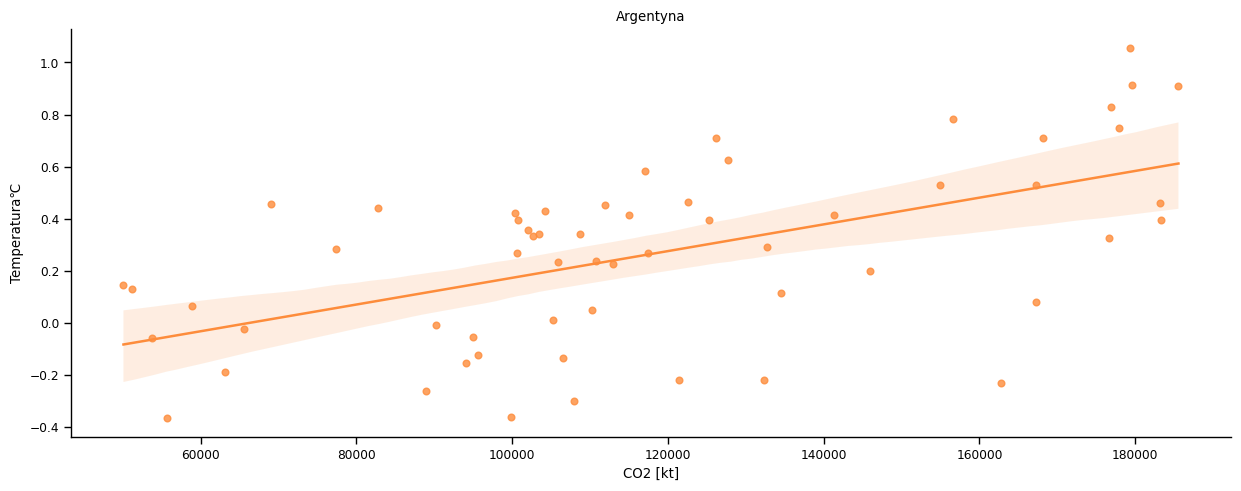

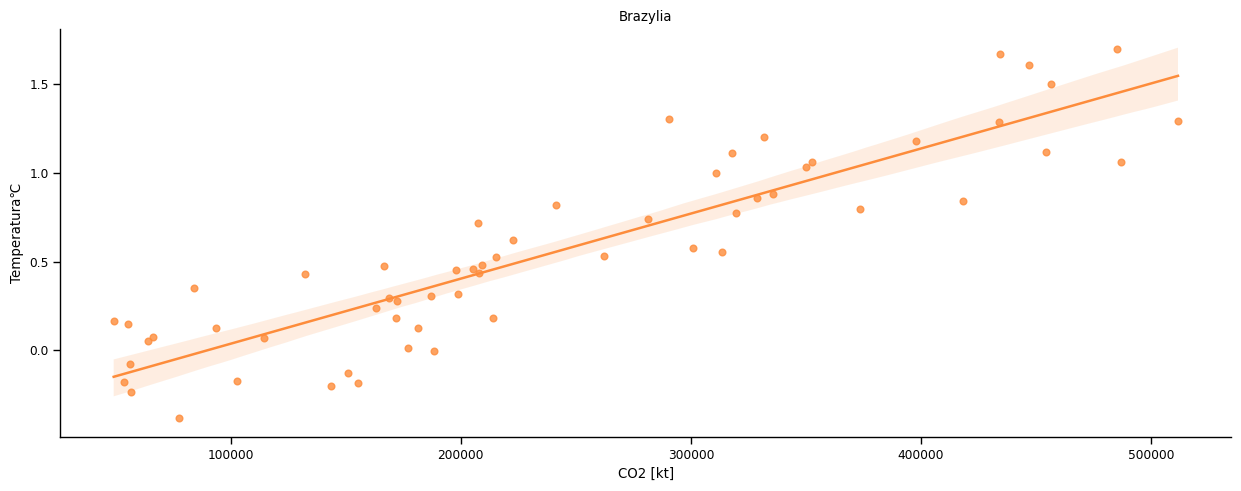

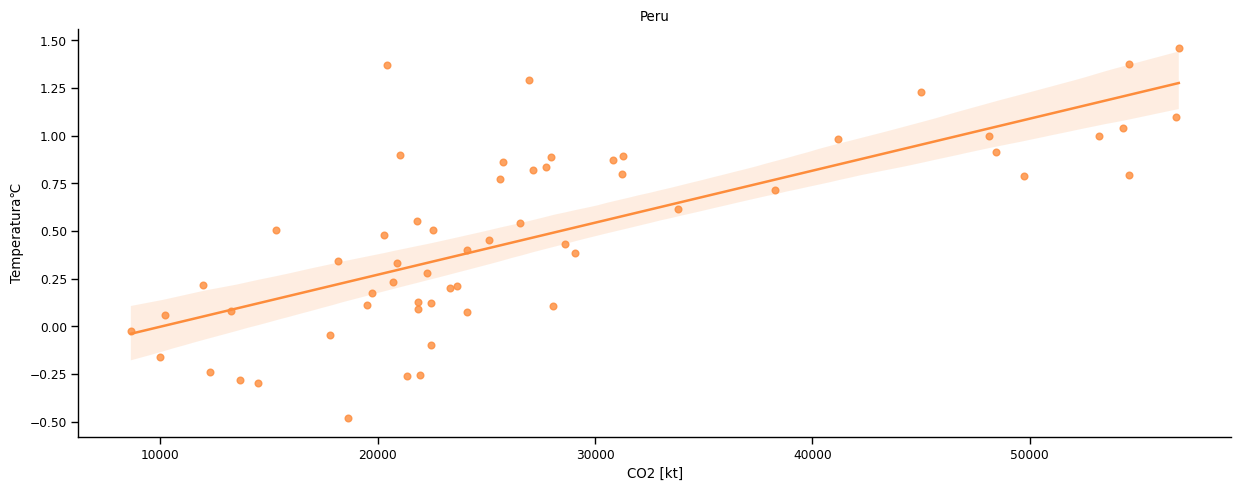

In [21]:
sns.set_context('paper')
l=sns.lmplot(data=SouthAmerica_temp_CO2[((SouthAmerica_temp_CO2['Area'] == 'Argentina'))],
                                    
            x="CO2",
            y="Temperature",
            aspect=2.5, 
            col='Area',
            hue = 'Area',
            palette = 'Oranges')
l.set(xlabel = 'CO2 [kt]', ylabel = "Temperatura\u2103")
plt.title('Argentyna')

l1=sns.lmplot(data=SouthAmerica_temp_CO2[((SouthAmerica_temp_CO2['Area'] == 'Brazil'))],
                                    
            x="CO2",
            y="Temperature",
            aspect=2.5, 
            col='Area',
            hue = 'Area',
            palette = 'Oranges')
l1.set(xlabel = 'CO2 [kt]', ylabel = "Temperatura\u2103")
plt.title('Brazylia')

l2=sns.lmplot(data=SouthAmerica_temp_CO2[((SouthAmerica_temp_CO2['Area'] == 'Peru'))],
                                    
            x="CO2",
            y="Temperature",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Oranges')
l2.set(xlabel = 'CO2 [kt]', ylabel = "Temperatura\u2103")
plt.title('Peru')
plt.show()

In[ ]:

##### Chart - temperature change vs value of CO2

In [60]:
SouthAmerica_temp_CO2

SouthAmerica_temp_CO2.CO2 = round((SouthAmerica_temp_CO2.CO2/1000), 2)

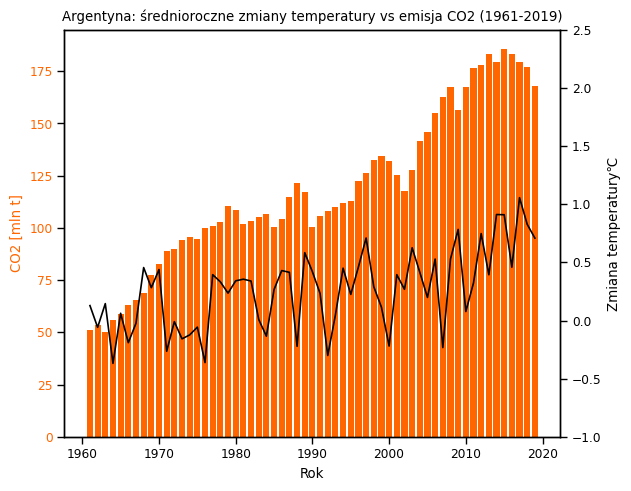

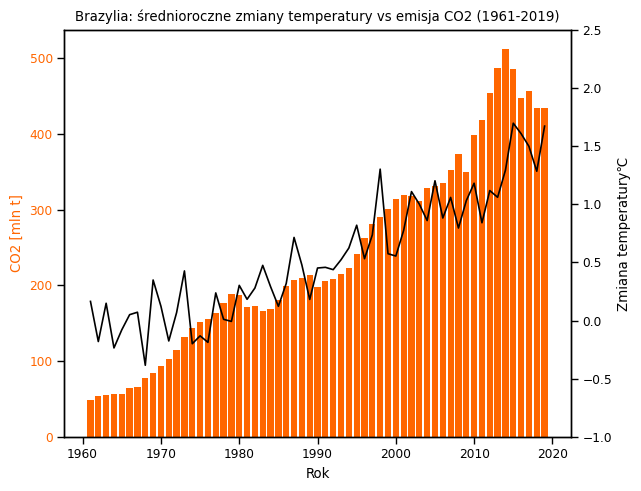

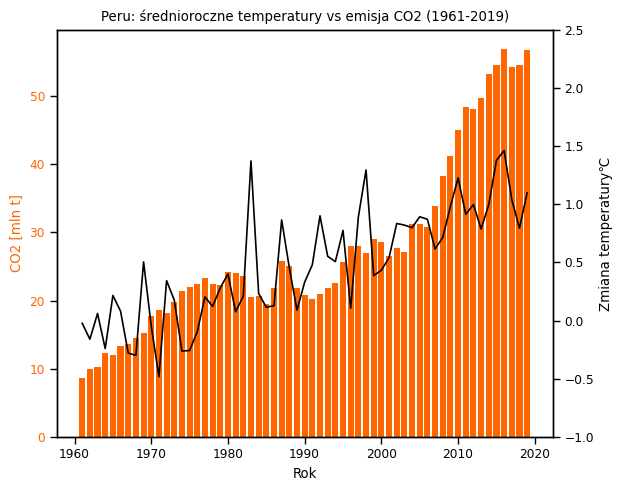

In [177]:
Argentina_temp_CO2 = SouthAmerica_temp_CO2[(SouthAmerica_temp_CO2.Area == 'Argentina')]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('CO2 [mln t]', color='#FF6600')
ax1.bar(Argentina_temp_CO2.Year, Argentina_temp_CO2.CO2, label = 'Argentyna', color ='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zmiana temperatury\u2103', color='#000000') 
ax2.plot(Argentina_temp_CO2.Year, Argentina_temp_CO2.Temperature, label = 'Argentyna', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Argentyna: średnioroczne zmiany temperatury vs emisja CO2 (1961-2019)')
plt.ylim(-1,2.5)



Brazil_temp_CO2 = SouthAmerica_temp_CO2[(SouthAmerica_temp_CO2.Area == 'Brazil')]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('CO2 [mln t]', color='#FF6600')
ax1.bar(Brazil_temp_CO2.Year, Brazil_temp_CO2.CO2, label = 'Brazylia', color ='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zmiana temperatury\u2103', color='#000000') 
ax2.plot(Brazil_temp_CO2.Year, Brazil_temp_CO2.Temperature, label = 'Brazylia', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Brazylia: średnioroczne zmiany temperatury vs emisja CO2 (1961-2019)')
plt.ylim(-1,2.5)



Peru_temp_CO2 = SouthAmerica_temp_CO2[(SouthAmerica_temp_CO2.Area == 'Peru')]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('CO2 [mln t]', color='#FF6600')
ax1.bar(Peru_temp_CO2.Year, Peru_temp_CO2.CO2, label = 'Peru', color ='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zmiana temperatury\u2103', color='#000000')
ax2.plot(Peru_temp_CO2.Year, Peru_temp_CO2.Temperature, label = 'Peru', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Peru: średnioroczne temperatury vs emisja CO2 (1961-2019)')

plt.ylim(-1,2.5)
plt.show()

In[ ]:

##### GDP per capita in 3 countries of South America

In[474]:

In [20]:
SouthAmerica_GDP = pd.read_csv('GDP_percapita.csv')

In[475]:

In [21]:
del SouthAmerica_GDP['Code']
del SouthAmerica_GDP['Unnamed: 65']

In[476]:

In [22]:
SouthAmerica_GDP = SouthAmerica_GDP.rename(columns={'Country Name':'Area'})

In[477]:

In [23]:
SouthAmerica_GDP = SouthAmerica_GDP[(SouthAmerica_GDP.Area == 'Argentina') | (SouthAmerica_GDP.Area == 'Brazil')
          | (SouthAmerica_GDP.Area == 'Peru')]
SouthAmerica_GDP

Area    1960    1961     1962    1963     1964     1965     1966  \
9    Argentina     NaN     NaN 1155.891 850.305 1173.238 1279.114 1272.803   
29      Brazil     NaN 232.481  251.348 295.632  258.605  269.456  330.041   
186       Peru 253.265 277.569  305.762 325.516  382.744  441.182  507.531   

        1967     1968  ...      2011      2012      2013      2014      2015  \
9   1062.543 1141.080  ... 12848.864 13082.664 13080.255 12334.798 13789.060   
29   353.111  375.391  ... 13245.387 12370.223 12300.387 12112.835  8813.990   
186  500.873  450.401  ...  5869.324  6528.972  6756.753  6672.877  6229.101   

         2016      2017      2018      2019     2020  
9   12790.242 14613.042 11795.159 10056.638 8579.018  
29   8710.063  9928.676  9151.382  8897.553 6796.845  
186  6204.996  6710.508  6957.793  7027.612 6126.875  

[3 rows x 62 columns]

In[ ]:

##### Modified table - GDP per capita

In[478]:

In [24]:
SouthAmerica_GDP_mdf = pd.melt(SouthAmerica_GDP, id_vars='Area')
SouthAmerica_GDP_mdf = SouthAmerica_GDP_mdf.rename(columns={'variable': 'Year', 'value': 'GDP_per_capita'})
SouthAmerica_GDP_mdf= SouthAmerica_GDP_mdf.sort_values(by=['Area', 'Year'])
SouthAmerica_GDP_mdf

Area  Year  GDP_per_capita
0    Argentina  1960             NaN
3    Argentina  1961             NaN
6    Argentina  1962        1155.891
9    Argentina  1963         850.305
12   Argentina  1964        1173.238
..         ...   ...             ...
170       Peru  2016        6204.996
173       Peru  2017        6710.508
176       Peru  2018        6957.793
179       Peru  2019        7027.612
182       Peru  2020        6126.875

[183 rows x 3 columns]

In[479]:

In [25]:
SouthAmerica_GDP_mdf.Year = pd.to_numeric(SouthAmerica_GDP_mdf.Year)

In[ ]:

GDP per capita other charts

In[427]:

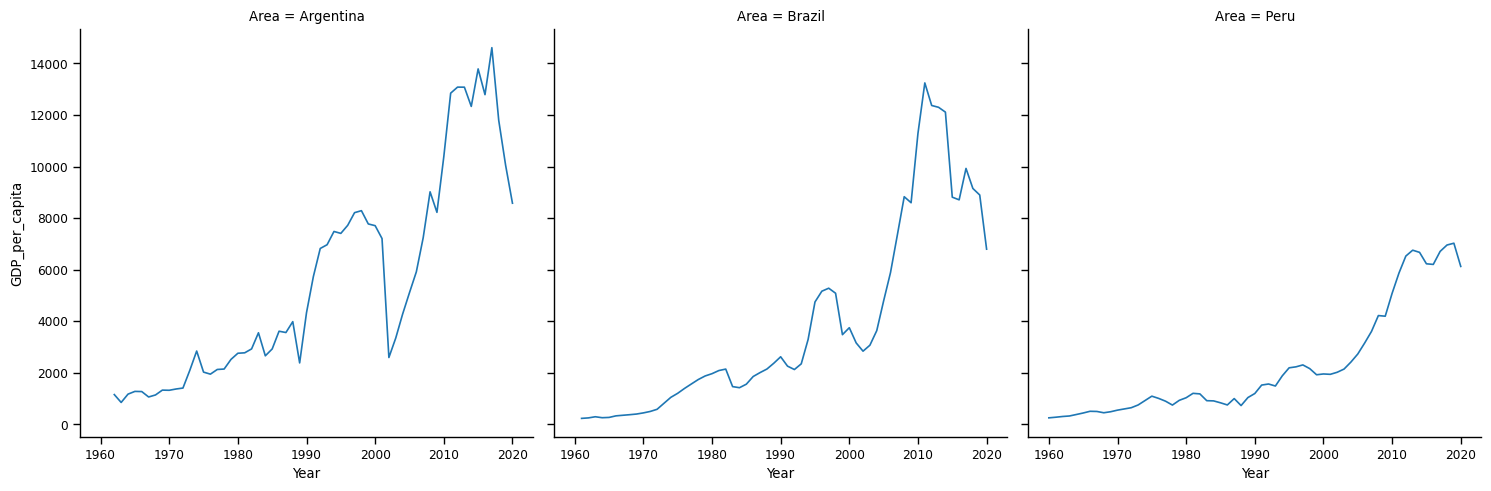

In [29]:
sns.set_context('paper')
sns.relplot(data=SouthAmerica_GDP_mdf[(SouthAmerica_GDP_mdf['Area'] == 'Argentina')
                                      | (SouthAmerica_GDP_mdf['Area'] == 'Brazil')
                                       |(SouthAmerica_GDP_mdf['Area'] == 'Peru')],
            x="Year",
            y="GDP_per_capita",
            kind='line',
            col='Area')
plt.show()

In[ ]:

##### Percent value of forestation in 3 countries of South America

In[33]:

In [26]:
SouthAmerica_forestation = pd.read_csv('forest.csv')

In[34]:

In [27]:
del SouthAmerica_forestation['country_code']

In[35]:

In [28]:
SouthAmerica_forestation = SouthAmerica_forestation[(SouthAmerica_forestation.country_name == 'Argentina') | (SouthAmerica_forestation.country_name == 'Brazil')
          | (SouthAmerica_forestation.country_name == 'Peru')]
SouthAmerica_forestation

country_name  year  value
279     Argentina  1990 12.864
280     Argentina  1991 12.797
281     Argentina  1992 12.730
282     Argentina  1993 12.664
283     Argentina  1994 12.597
...           ...   ...    ...
5665         Peru  2016 57.039
5666         Peru  2017 56.902
5667         Peru  2018 56.778
5668         Peru  2019 56.643
5669         Peru  2020 56.508

[93 rows x 3 columns]

In[36]:

In [29]:
SouthAmerica_forestation = SouthAmerica_forestation.rename(columns={'country_name':'Area', 'year':'Year', 'value': 'Forestation_percent'})
SouthAmerica_forestation

Area  Year  Forestation_percent
279   Argentina  1990               12.864
280   Argentina  1991               12.797
281   Argentina  1992               12.730
282   Argentina  1993               12.664
283   Argentina  1994               12.597
...         ...   ...                  ...
5665       Peru  2016               57.039
5666       Peru  2017               56.902
5667       Peru  2018               56.778
5668       Peru  2019               56.643
5669       Peru  2020               56.508

[93 rows x 3 columns]

In[37]:

In [30]:
SouthAmerica_forestation.Year = pd.to_numeric(SouthAmerica_forestation.Year)

In[ ]:

##### Urban population (% of total population) in 3 countries of South America

In[489]:

In [31]:
SouthAmerica_urban = pd.read_csv('share-of-population-urban.csv')

In[490]:

In [32]:
del SouthAmerica_urban['Code']

In[491]:

In [33]:
SouthAmerica_urban = SouthAmerica_urban.rename(columns={'Entity':'Area', 
                                     'Urban population (% of total population)': 'Urbanization_rate_percent'})

In[492]:

In [34]:
SouthAmerica_urban = SouthAmerica_urban[(SouthAmerica_urban.Area == 'Argentina') 
                        | (SouthAmerica_urban.Area == 'Brazil')
                            | (SouthAmerica_urban.Area == 'Peru')]
SouthAmerica_urban

Area  Year  Urbanization_rate_percent
427    Argentina  1960                     73.611
428    Argentina  1961                     74.217
429    Argentina  1962                     74.767
430    Argentina  1963                     75.309
431    Argentina  1964                     75.844
...          ...   ...                        ...
10051       Peru  2016                     77.539
10052       Peru  2017                     77.720
10053       Peru  2018                     77.907
10054       Peru  2019                     78.099
10055       Peru  2020                     78.297

[183 rows x 3 columns]

In[493]:

In [35]:
SouthAmerica_urban.Year = pd.to_numeric(SouthAmerica_urban.Year)

In[ ]:

Summarized tabel: Temperature change + CO2 + GDP per capita + Forestation + energy use + urbanization

In[497]:

In [36]:
SouthAmerica_temp_CO2 = pd.merge(SouthAmerica_temp_mdf, SouthAmerica_CO2, on =['Area','Year'], how = 'left')
SouthAmerica_temp_CO2_GDP = pd.merge(SouthAmerica_temp_CO2, SouthAmerica_GDP_mdf,  on =['Area','Year'], how = 'left')
SouthAmerica_temp_CO2_GDP_forest = pd.merge(SouthAmerica_temp_CO2_GDP, SouthAmerica_forestation, on =['Area','Year'], how = 'left')
SouthAmerica_temp_CO2_GDP_forest_urb = pd.merge(SouthAmerica_temp_CO2_GDP_forest, SouthAmerica_urban, on =['Area','Year'], how = 'left')
SouthAmerica_temp_CO2_GDP_forest_urb

Area  Year  Temperature       CO2  GDP_per_capita  \
0    Argentina  1961        0.129 51180.319             NaN   
1    Argentina  1962       -0.058 53695.881        1155.891   
2    Argentina  1963        0.146 50083.886         850.305   
3    Argentina  1964       -0.368 55727.399        1173.238   
4    Argentina  1965        0.063 58866.351        1279.114   
..         ...   ...          ...       ...             ...   
172       Peru  2015        1.377 54549.999        6229.101   
173       Peru  2016        1.462 56860.001        6204.996   
174       Peru  2017        1.041 54270.000        6710.508   
175       Peru  2018        0.795 54590.000        6957.793   
176       Peru  2019        1.097 56750.000        7027.612   

     Forestation_percent  Urbanization_rate_percent  
0                    NaN                     74.217  
1                    NaN                     74.767  
2                    NaN                     75.309  
3                    NaN                     75.844  
4                    NaN                     76.369  
..                   ...                        ...  
172               57.183                     77.357  
173               57.039                     77.539  
174               56.902                     77.720  
175               56.778                     77.907  
176               56.643                     78.099  

[177 rows x 7 columns]

In[ ]:

##### Regression - temperature change vs GDP per capita

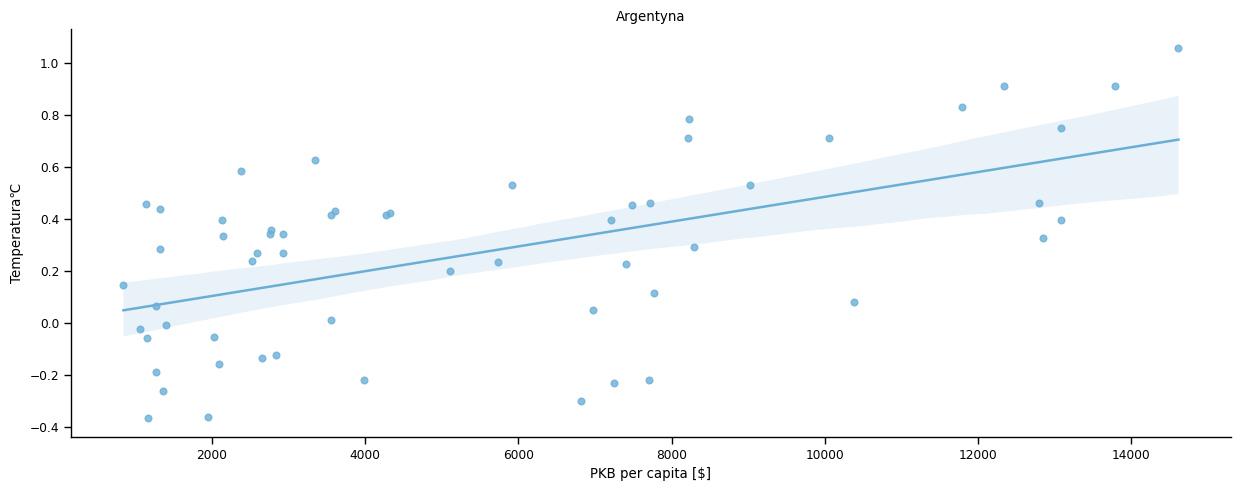

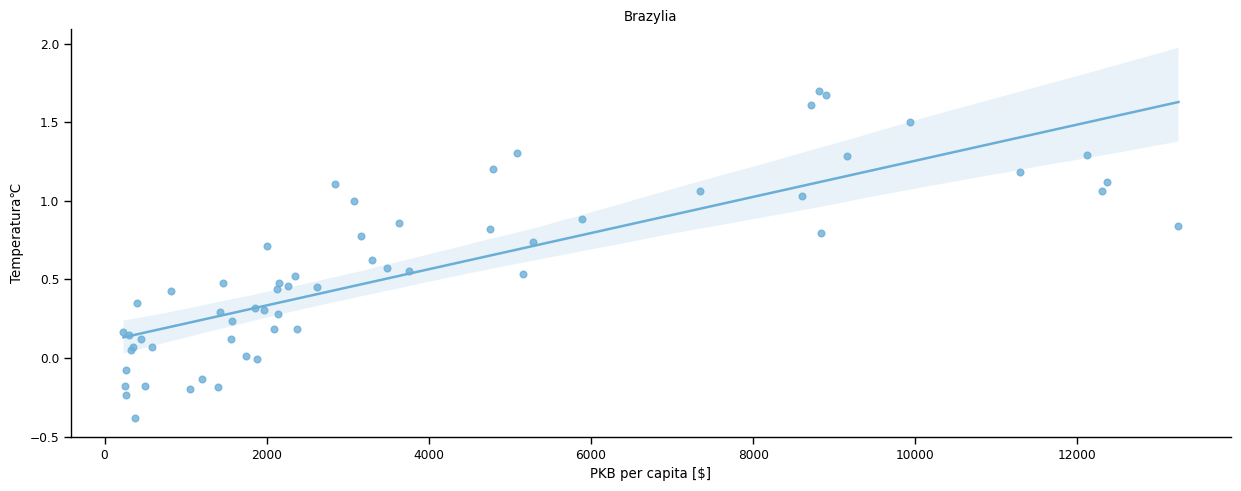

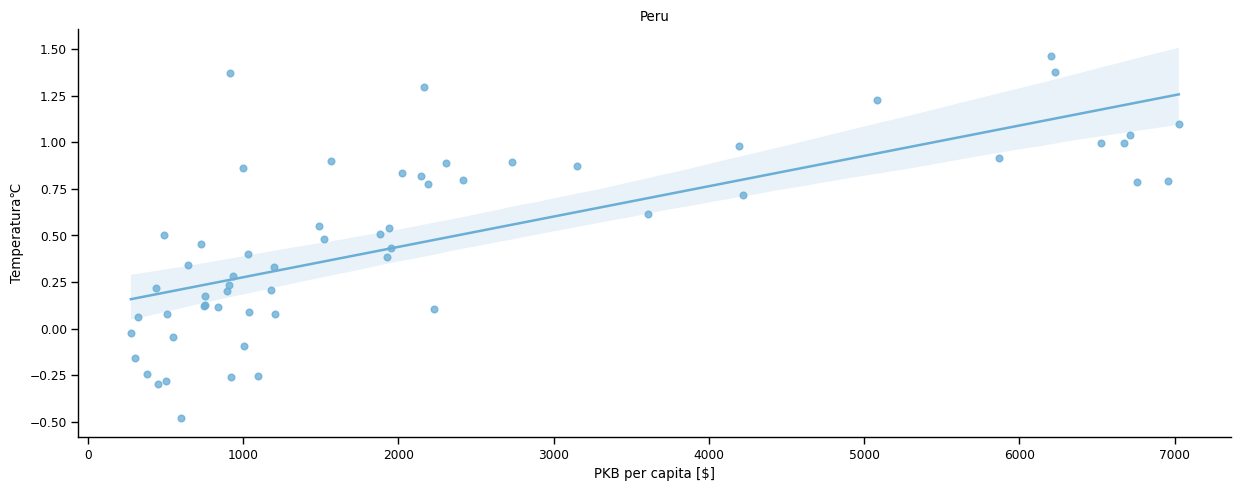

In [41]:
sns.set_context('paper')
l=sns.lmplot(data=SouthAmerica_temp_CO2_GDP[((SouthAmerica_temp_CO2_GDP['Area'] == 'Argentina'))],
                                    
            x="GDP_per_capita",
            y="Temperature",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Blues')
l.set(xlabel = 'PKB per capita [$]', ylabel = "Temperatura\u2103")
plt.title('Argentyna')

l1=sns.lmplot(data=SouthAmerica_temp_CO2_GDP[((SouthAmerica_temp_CO2_GDP['Area'] == 'Brazil'))],
                                    
            x="GDP_per_capita",
            y="Temperature",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Blues')
l1.set(xlabel = 'PKB per capita [$]', ylabel = "Temperatura\u2103")
plt.title('Brazylia')

l2=sns.lmplot(data=SouthAmerica_temp_CO2_GDP[((SouthAmerica_temp_CO2_GDP['Area'] == 'Peru'))],
                                    
            x="GDP_per_capita",
            y="Temperature",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Blues')
l2.set(xlabel = 'PKB per capita [$]', ylabel = "Temperatura\u2103")
plt.title('Peru')
plt.show()

In[ ]:

##### Temperature change vs GDP percapita - chart

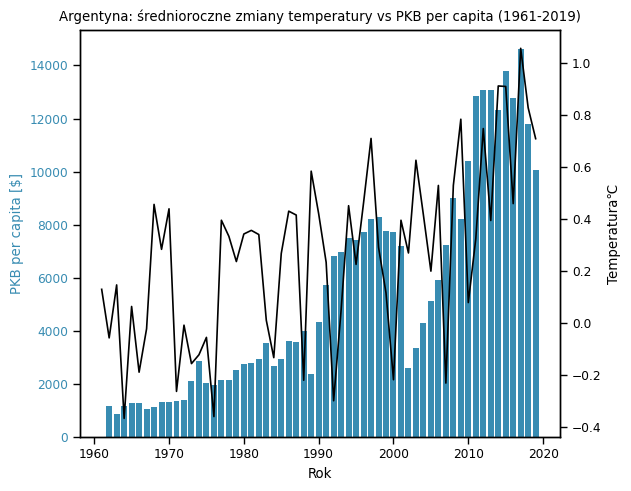

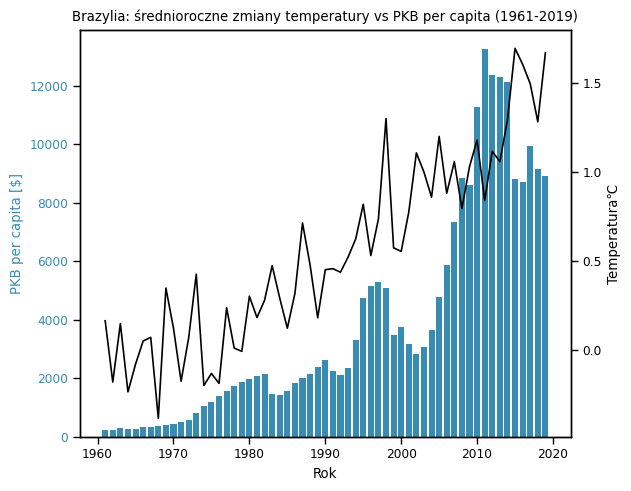

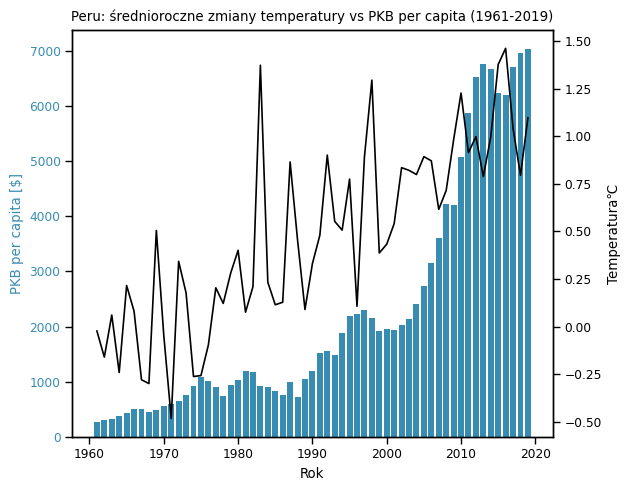

In [42]:
Argentina_temp_GDP = SouthAmerica_temp_CO2_GDP[(SouthAmerica_temp_CO2_GDP.Area == 'Argentina')]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('PKB per capita [$]', color='#388CB2')
ax1.bar(Argentina_temp_GDP.Year, Argentina_temp_GDP.GDP_per_capita, label = 'Argentyna', color ='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura\u2103', color='#000000') 
ax2.plot(Argentina_temp_GDP.Year, Argentina_temp_GDP.Temperature, label = 'Argentyna', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Argentyna: średnioroczne zmiany temperatury vs PKB per capita (1961-2019)')



Brazil_temp_GDP = SouthAmerica_temp_CO2_GDP[(SouthAmerica_temp_CO2_GDP.Area == 'Brazil')]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('PKB per capita [$]', color='#388CB2')
ax1.bar(Brazil_temp_GDP.Year, Brazil_temp_GDP.GDP_per_capita, label = 'Brazylia', color ='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura\u2103', color='#000000') 
ax2.plot(Brazil_temp_GDP.Year, Brazil_temp_GDP.Temperature, label = 'Brazylia', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Brazylia: średnioroczne zmiany temperatury vs PKB per capita (1961-2019)')




Peru_temp_GDP = SouthAmerica_temp_CO2_GDP[(SouthAmerica_temp_CO2_GDP.Area == 'Peru')]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('PKB per capita [$]', color='#388CB2')
ax1.bar(Peru_temp_GDP.Year, Peru_temp_GDP.GDP_per_capita, label = 'Peru', color ='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura\u2103', color='#000000')
ax2.plot(Peru_temp_GDP.Year, Peru_temp_GDP.Temperature, label = 'Peru', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Peru: średnioroczne zmiany temperatury vs PKB per capita (1961-2019)')

plt.show()

In[ ]:

##### Regression - temperature change vs forestation

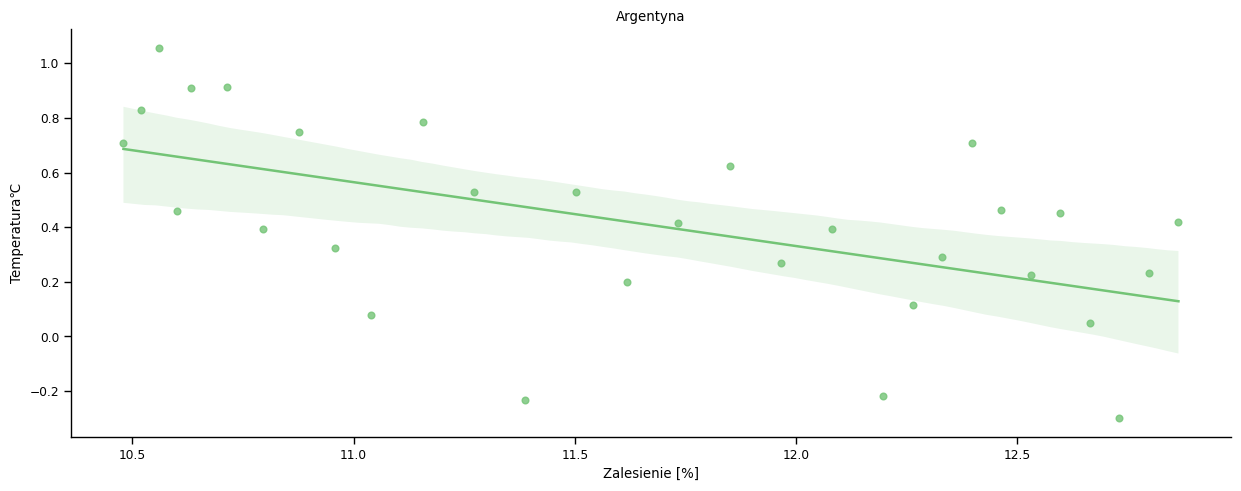

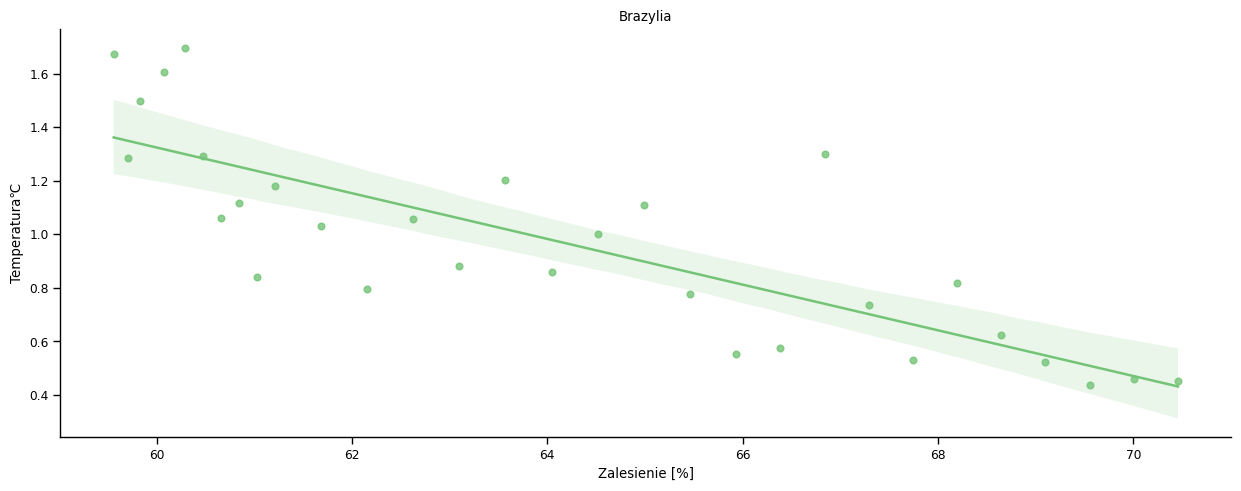

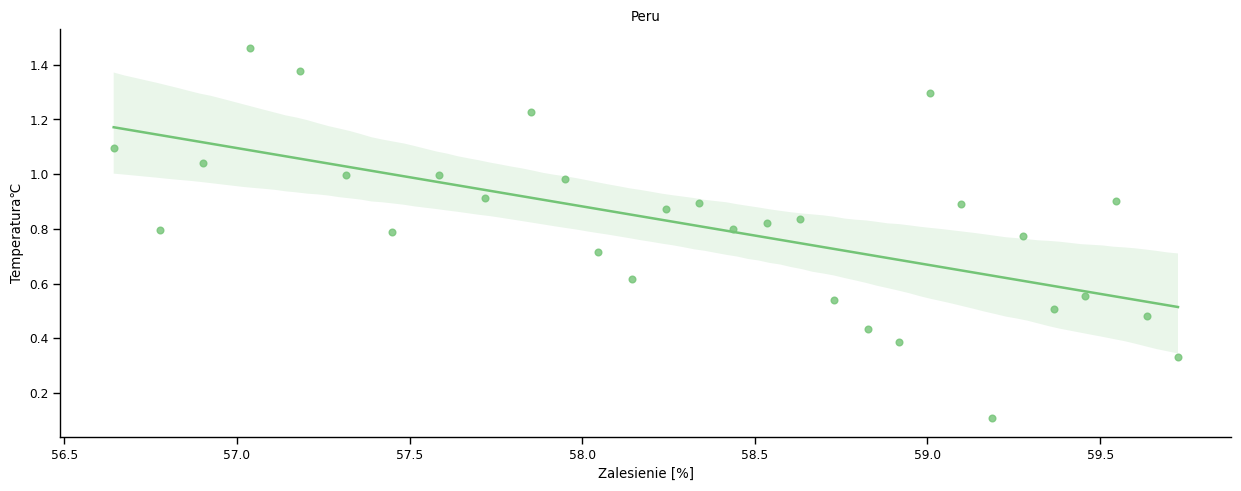

In [43]:
sns.set_context('paper')
l = sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest[((SouthAmerica_temp_CO2_GDP_forest['Area'] == 'Argentina'))],
                                    
            x="Forestation_percent",
            y="Temperature",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Greens')
l.set(xlabel = 'Zalesienie [%]', ylabel = "Temperatura\u2103")
plt.title('Argentyna')

l1 = sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest[((SouthAmerica_temp_CO2_GDP_forest['Area'] == 'Brazil'))],
                                    
            x="Forestation_percent",
            y="Temperature",
            aspect=2.5, 
            col='Area',
            hue = 'Area',
            palette = 'Greens')
l1.set(xlabel = 'Zalesienie [%]', ylabel = "Temperatura\u2103")
plt.title('Brazylia')

l2 = sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest[((SouthAmerica_temp_CO2_GDP_forest['Area'] == 'Peru'))],
                                    
            x="Forestation_percent",
            y="Temperature",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Greens')
l2.set(xlabel = 'Zalesienie [%]', ylabel = "Temperatura\u2103")
plt.title('Peru')
plt.show()

In[ ]:

##### Temperature change vs forestation - chart

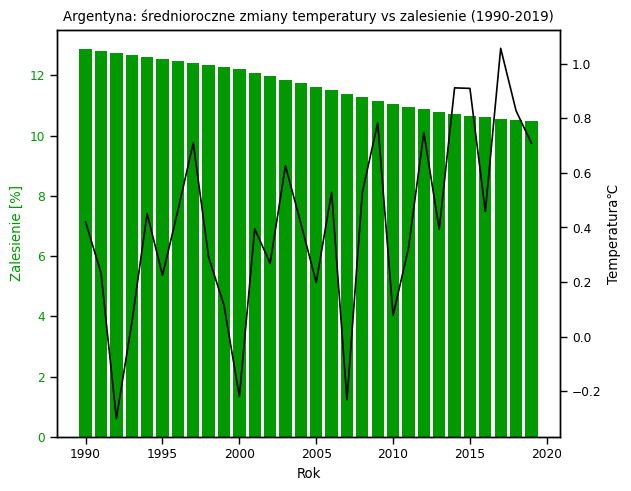

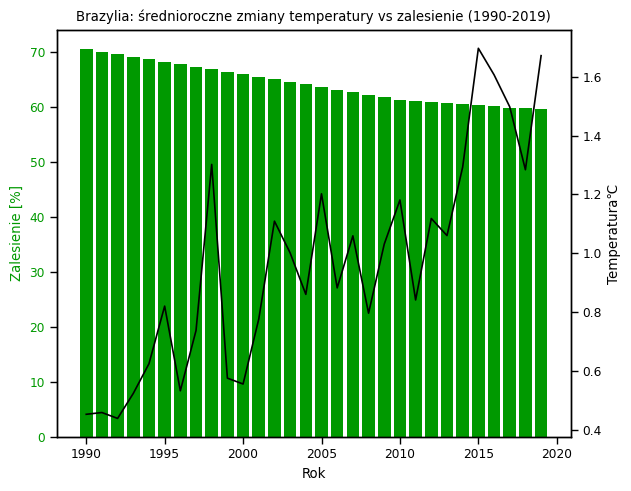

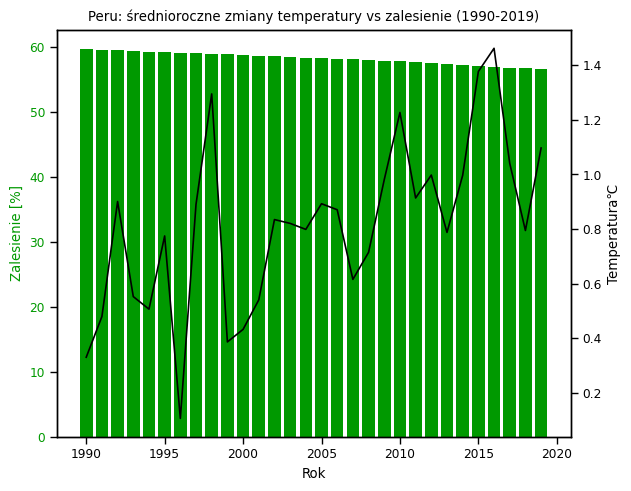

In [44]:
Argentina_temp_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Argentina')
                                                            &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]
                                             

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie [%]', color='#009900')
ax1.bar(Argentina_temp_forest.Year, Argentina_temp_forest.Forestation_percent, label = 'Argentyna', color ='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura\u2103', color='#000000') 
ax2.plot(Argentina_temp_forest.Year, Argentina_temp_forest.Temperature, label = 'Argentyna', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Argentyna: średnioroczne zmiany temperatury vs zalesienie (1990-2019)')



Brazil_temp_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Brazil')
                                                           &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie [%]', color='#009900')
ax1.bar(Brazil_temp_forest.Year, Brazil_temp_forest.Forestation_percent, label = 'Brazylia', color ='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura\u2103', color='#000000') 
ax2.plot(Brazil_temp_forest.Year, Brazil_temp_forest.Temperature, label = 'Brazylia', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Brazylia: średnioroczne zmiany temperatury vs zalesienie (1990-2019)')





Peru_temp_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Peru')
                                                           &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]
fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Zalesienie [%]', color='#009900')
ax1.bar(Peru_temp_forest.Year, Peru_temp_forest.Forestation_percent, label = 'Peru', color ='#009900')
ax1.tick_params(axis='y', labelcolor='#009900')

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura\u2103', color='#000000')
ax2.plot(Peru_temp_forest.Year, Peru_temp_forest.Temperature, label = 'Peru', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Peru: średnioroczne zmiany temperatury vs zalesienie (1990-2019)')

plt.show()

In[ ]:

##### Forestation vs GDP per capita - chart

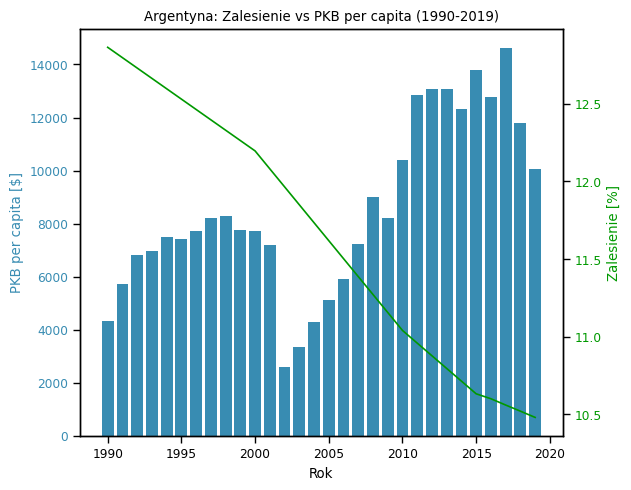

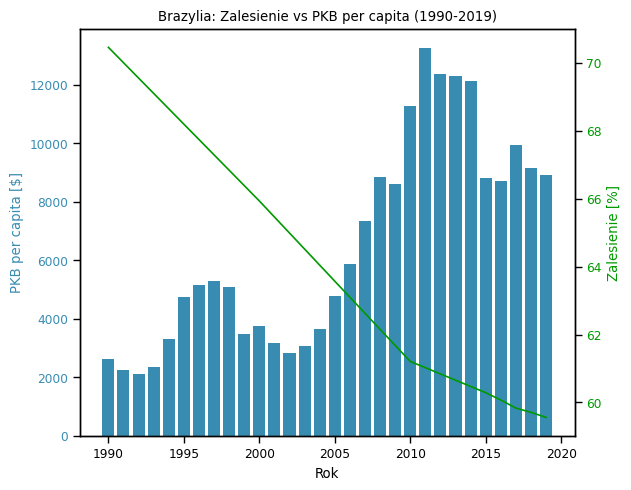

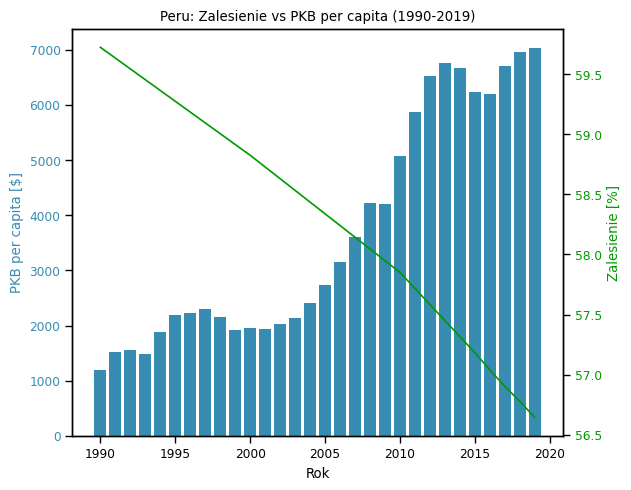

In [45]:
Argentina_GDP_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Argentina')
                                                            &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]
                                             

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('PKB per capita [$]', color='#388CB2')
ax1.bar(Argentina_GDP_forest.Year, Argentina_GDP_forest.GDP_per_capita, label = 'Argentyna', color ='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zalesienie [%]', color='#009900') 
ax2.plot(Argentina_GDP_forest.Year, Argentina_GDP_forest.Forestation_percent, label = 'Argentyna', color = '#009900')
ax2.tick_params(axis='y', labelcolor='#009900')

fig.tight_layout()  
plt.title('Argentyna: Zalesienie vs PKB per capita (1990-2019)')



Brazil_GDP_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Brazil')
                                                           &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('PKB per capita [$]', color='#388CB2')
ax1.bar(Brazil_GDP_forest.Year, Brazil_GDP_forest.GDP_per_capita, label = 'Brazylia', color ='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zalesienie [%]', color='#009900') 
ax2.plot(Brazil_GDP_forest.Year, Brazil_GDP_forest.Forestation_percent, label = 'Brazylia', color = '#009900')
ax2.tick_params(axis='y', labelcolor='#009900')

fig.tight_layout()  
plt.title('Brazylia: Zalesienie vs PKB per capita (1990-2019)')



Peru_GDP_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Peru')
                                                           &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]
fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('PKB per capita [$]', color='#388CB2')
ax1.bar(Peru_GDP_forest.Year, Peru_GDP_forest.GDP_per_capita, label = 'Peru', color ='#388CB2')
ax1.tick_params(axis='y', labelcolor='#388CB2')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zalesienie [%]', color='#009900')
ax2.plot(Peru_GDP_forest.Year, Peru_GDP_forest.Forestation_percent, label = 'Peru', color = '#009900')
ax2.tick_params(axis='y', labelcolor='#009900')

fig.tight_layout()  
plt.title('Peru: Zalesienie vs PKB per capita (1990-2019)')

plt.show()

In[ ]:

##### Forestation vs value of CO2 - chart

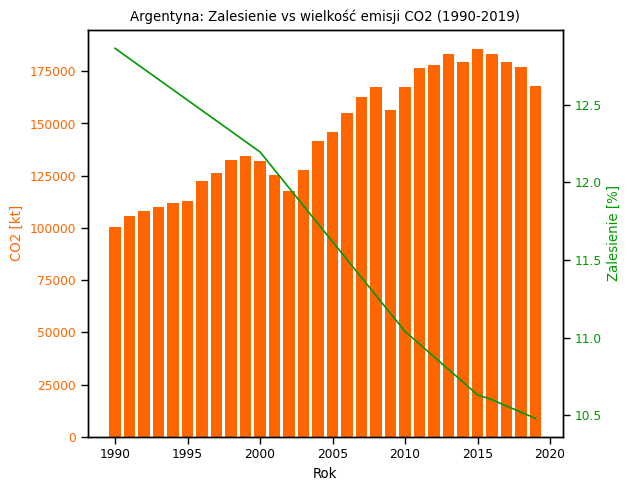

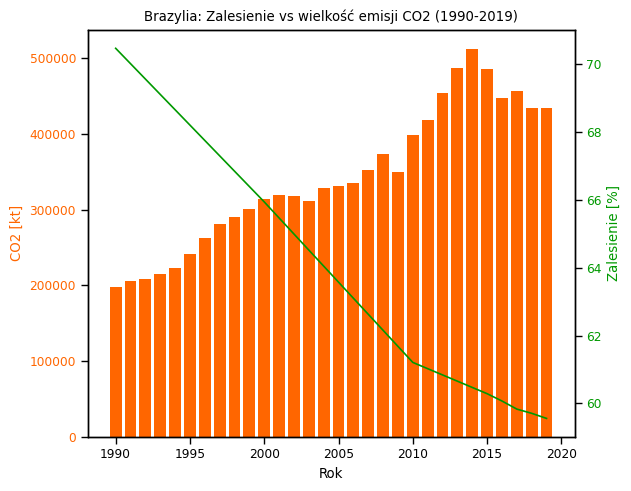

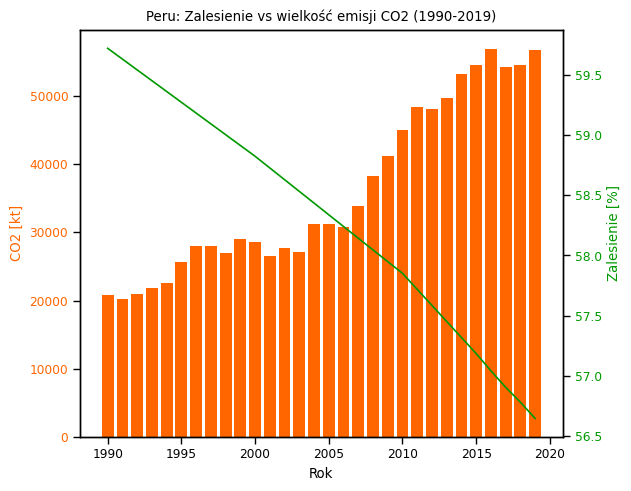

In [46]:
Argentina_CO2_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Argentina')
                                                           &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]
                                             

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('CO2 [kt]', color='#FF6600')
ax1.bar(Argentina_CO2_forest.Year, Argentina_CO2_forest.CO2, label = 'Argentyna', color ='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zalesienie [%]', color='#009900') 
ax2.plot(Argentina_CO2_forest.Year, Argentina_CO2_forest.Forestation_percent, label = 'Argentyna', color = '#009900')
ax2.tick_params(axis='y', labelcolor='#009900')

fig.tight_layout()  
plt.title('Argentyna: Zalesienie vs wielkość emisji CO2 (1990-2019)')



Brazil_GDP_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Brazil')
                                                           &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('CO2 [kt]', color='#FF6600')
ax1.bar(Brazil_GDP_forest.Year, Brazil_GDP_forest.CO2, label = 'Brazylia', color ='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zalesienie [%]', color='#009900') 
ax2.plot(Brazil_GDP_forest.Year, Brazil_GDP_forest.Forestation_percent, label = 'Brazylia', color = '#009900')
ax2.tick_params(axis='y', labelcolor='#009900')

fig.tight_layout()  
plt.title('Brazylia: Zalesienie vs wielkość emisji CO2 (1990-2019)')



Peru_GDP_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Peru')
                                                           &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]
fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('CO2 [kt]', color='#FF6600')
ax1.bar(Peru_GDP_forest.Year, Peru_GDP_forest.CO2, label = 'Peru', color ='#FF6600')
ax1.tick_params(axis='y', labelcolor='#FF6600')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zalesienie [%]', color='#009900')
ax2.plot(Peru_GDP_forest.Year, Peru_GDP_forest.Forestation_percent, label = 'Peru', color = '#009900')
ax2.tick_params(axis='y', labelcolor='#009900')

fig.tight_layout()  
plt.title('Peru: Zalesienie vs wielkość emisji CO2 (1990-2019)')

plt.show()

In[ ]:

##### Forestation vs urbanization rate - chart

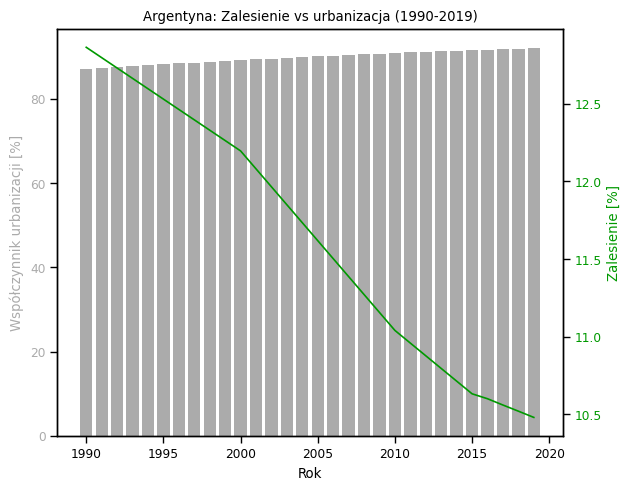

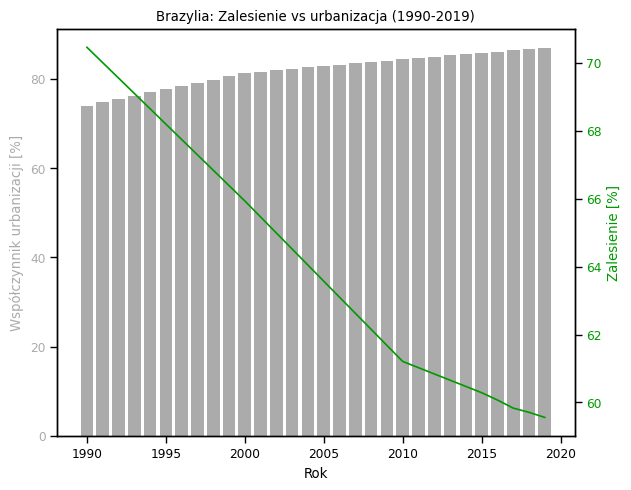

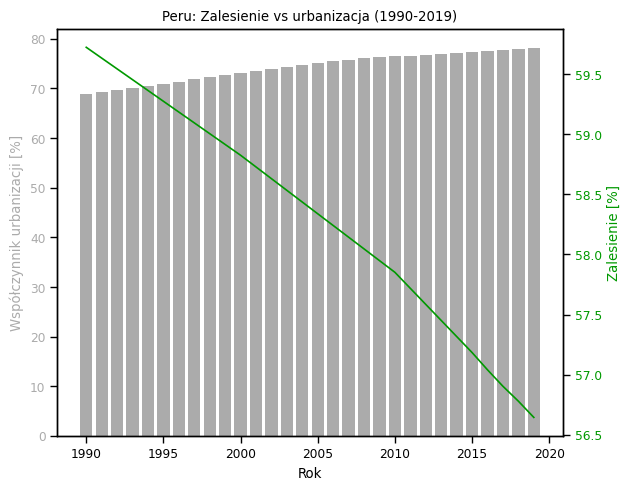

In [47]:
Argentina_urban_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Argentina')
                                                           &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]
                                             

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Współczynnik urbanizacji [%]', color='#ABABAB')
ax1.bar(Argentina_urban_forest.Year, Argentina_urban_forest.Urbanization_rate_percent, label = 'Argentyna', color ='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zalesienie [%]', color='#009900') 
ax2.plot(Argentina_urban_forest.Year, Argentina_urban_forest.Forestation_percent, label = 'Argentyna', color = '#009900')
ax2.tick_params(axis='y', labelcolor='#009900')

fig.tight_layout()  
plt.title('Argentyna: Zalesienie vs urbanizacja (1990-2019)')



Brazil_urban_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Brazil')
                                                           &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Współczynnik urbanizacji [%]', color='#ABABAB')
ax1.bar(Brazil_urban_forest.Year, Brazil_urban_forest.Urbanization_rate_percent, label = 'Brazylia', color ='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zalesienie [%]', color='#009900') 
ax2.plot(Brazil_urban_forest.Year, Brazil_urban_forest.Forestation_percent, label = 'Brazylia', color = '#009900')
ax2.tick_params(axis='y', labelcolor='#009900')

fig.tight_layout()  
plt.title('Brazylia: Zalesienie vs urbanizacja (1990-2019)')



Peru_urban_forest = SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Peru')
                                                           &(SouthAmerica_temp_CO2_GDP_forest_urb.Year > 1989))]
fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Współczynnik urbanizacji [%]', color='#ABABAB')
ax1.bar(Peru_urban_forest.Year, Peru_urban_forest.Urbanization_rate_percent, label = 'Peru', color ='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')

ax2 = ax1.twinx()  

ax2.set_ylabel('Zalesienie [%]', color='#009900')
ax2.plot(Peru_urban_forest.Year, Peru_urban_forest.Forestation_percent, label = 'Peru', color = '#009900')
ax2.tick_params(axis='y', labelcolor='#009900')

fig.tight_layout()  
plt.title('Peru: Zalesienie vs urbanizacja (1990-2019)')

plt.show()

In[ ]:

##### Temperature change vs urbanization rate - chart

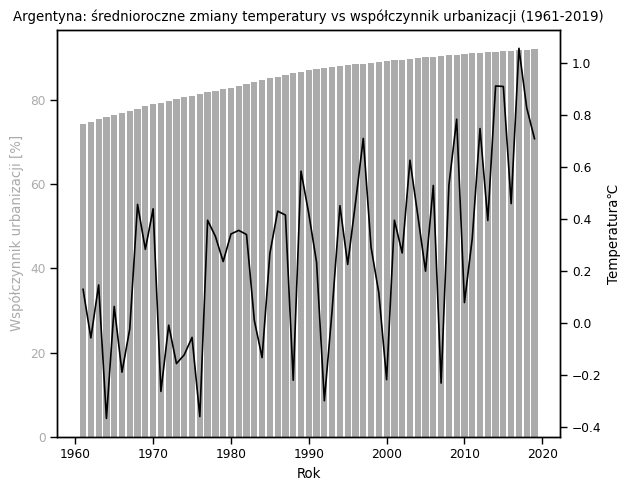

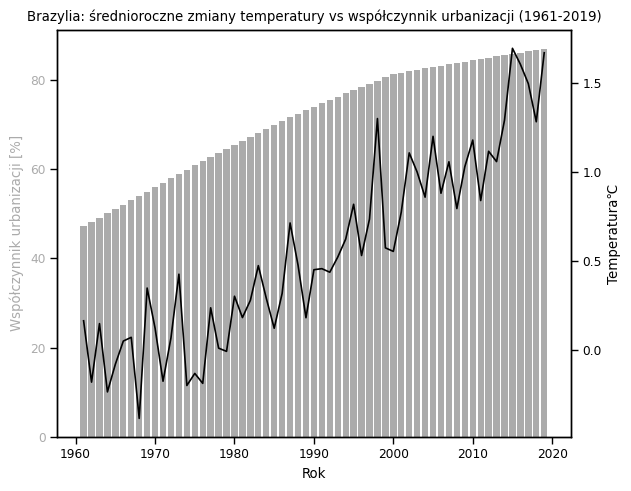

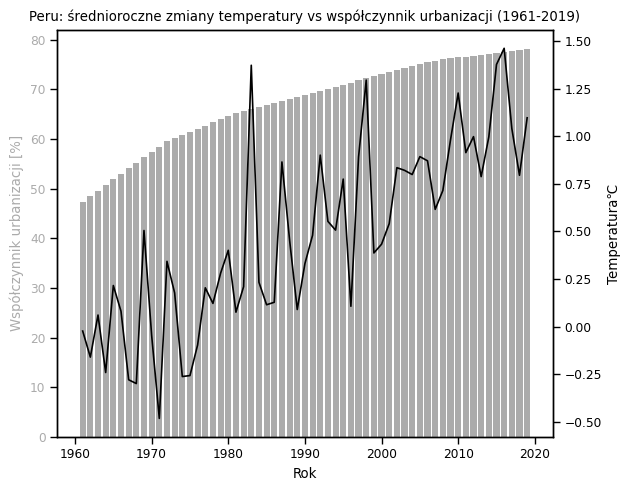

In [48]:
Argentina_temp_urban = SouthAmerica_temp_CO2_GDP_forest_urb[(SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Argentina')]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Współczynnik urbanizacji [%]', color='#ABABAB')
ax1.bar(Argentina_temp_urban.Year, Argentina_temp_urban.Urbanization_rate_percent, label = 'Argentyna', color ='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura\u2103', color='#000000') 
ax2.plot(Argentina_temp_urban.Year, Argentina_temp_urban.Temperature, label = 'Argentyna', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Argentyna: średnioroczne zmiany temperatury vs współczynnik urbanizacji (1961-2019)')



Brazil_temp_urban = SouthAmerica_temp_CO2_GDP_forest_urb[(SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Brazil')]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Współczynnik urbanizacji [%]', color='#ABABAB')
ax1.bar(Brazil_temp_urban.Year, Brazil_temp_urban.Urbanization_rate_percent, label = 'Brazylia', color ='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura\u2103', color='#000000') 
ax2.plot(Brazil_temp_urban.Year, Brazil_temp_urban.Temperature, label = 'Brazylia', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Brazylia: średnioroczne zmiany temperatury vs współczynnik urbanizacji (1961-2019)')




Peru_temp_urban = SouthAmerica_temp_CO2_GDP_forest_urb[(SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Peru')]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Rok')
ax1.set_ylabel('Współczynnik urbanizacji [%]', color='#ABABAB')
ax1.bar(Peru_temp_urban.Year, Peru_temp_urban.Urbanization_rate_percent, label = 'Peru', color ='#ABABAB')
ax1.tick_params(axis='y', labelcolor='#ABABAB')

ax2 = ax1.twinx()  

ax2.set_ylabel('Temperatura\u2103', color='#000000')
ax2.plot(Peru_temp_urban.Year, Peru_temp_urban.Temperature, label = 'Peru', color = '#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

fig.tight_layout()  
plt.title('Peru: średnioroczne zmiany temperatury vs współczynnik urbanizacji (1961-2019)')

plt.show()

In[ ]:

##### Regression - temperature change vs urbanization rate

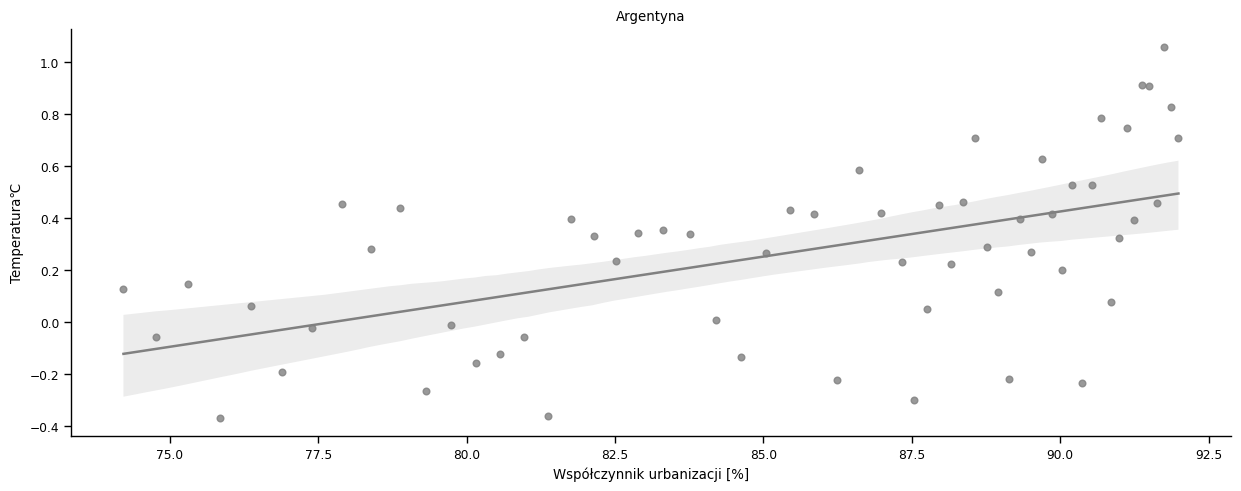

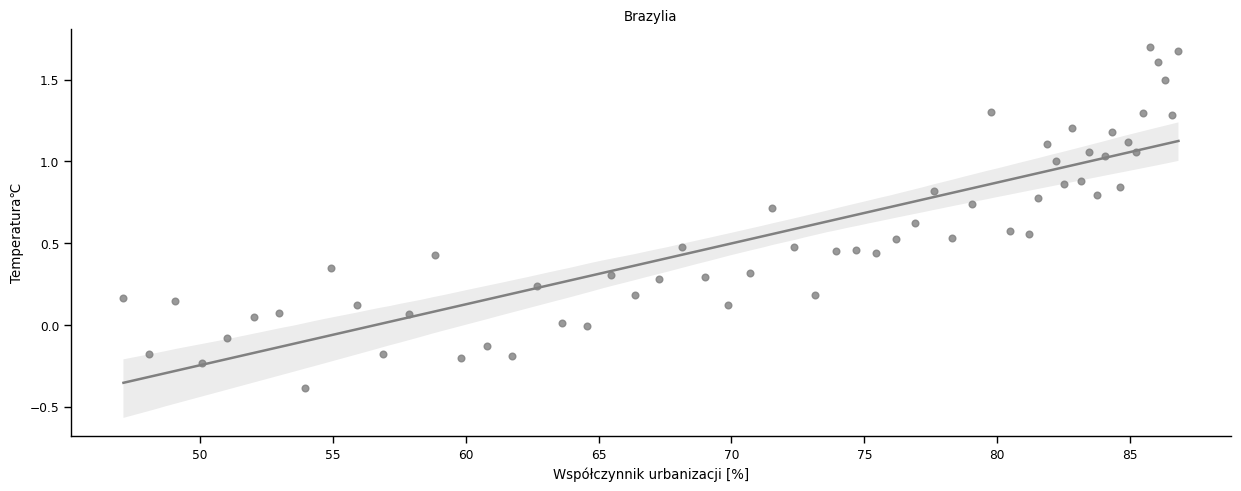

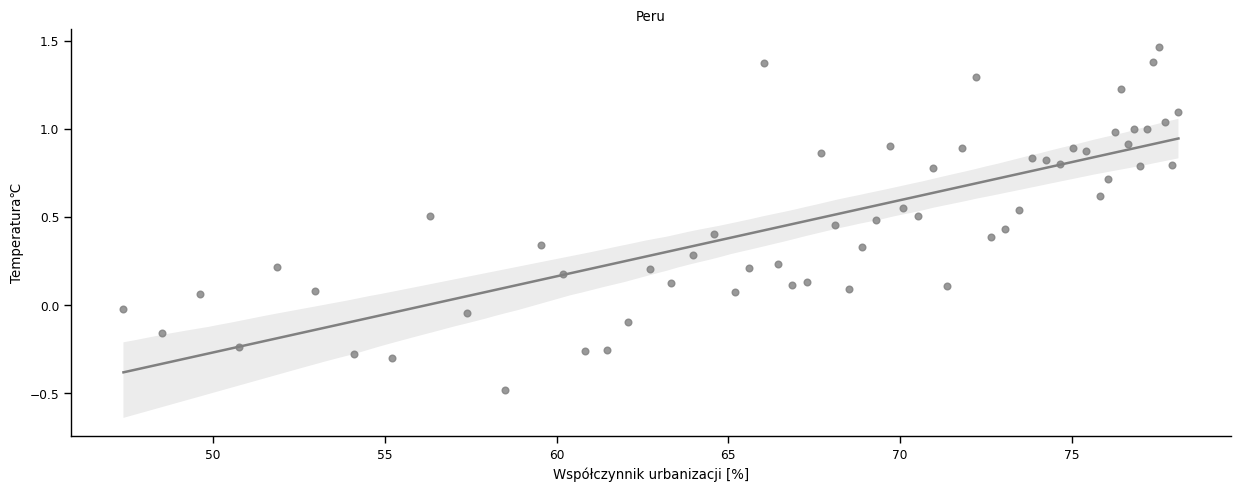

In [49]:
sns.set_context('paper')
l= sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Argentina'))],
                                    
            x="Urbanization_rate_percent",
            y="Temperature",
            aspect=2.5,
            col = 'Area',
            hue='Area',
            palette = 'gray')
l.set(xlabel = 'Współczynnik urbanizacji [%]', ylabel = "Temperatura\u2103")
plt.title('Argentyna')

l1 = sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Brazil'))],
                                    
            x="Urbanization_rate_percent",
            y="Temperature",
            aspect=2.5,
            col = 'Area',
            hue='Area',
            palette = 'gray')
l1.set(xlabel = 'Współczynnik urbanizacji [%]', ylabel = "Temperatura\u2103")
plt.title('Brazylia')

l2 = sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Peru'))],
                                    
            x="Urbanization_rate_percent",
            y="Temperature",
            aspect=2.5,
            col = 'Area',
            hue = 'Area',
            palette = 'gray')
l2.set(xlabel = 'Współczynnik urbanizacji [%]', ylabel = "Temperatura\u2103")
plt.title('Peru')
plt.show()

In[ ]:

##### Regression: CO2 vs GDP per capita

In [51]:
SouthAmerica_temp_CO2_GDP_forest_urb

SouthAmerica_temp_CO2_GDP_forest_urb.CO2 = round((SouthAmerica_temp_CO2_GDP_forest_urb.CO2/1000), 2)

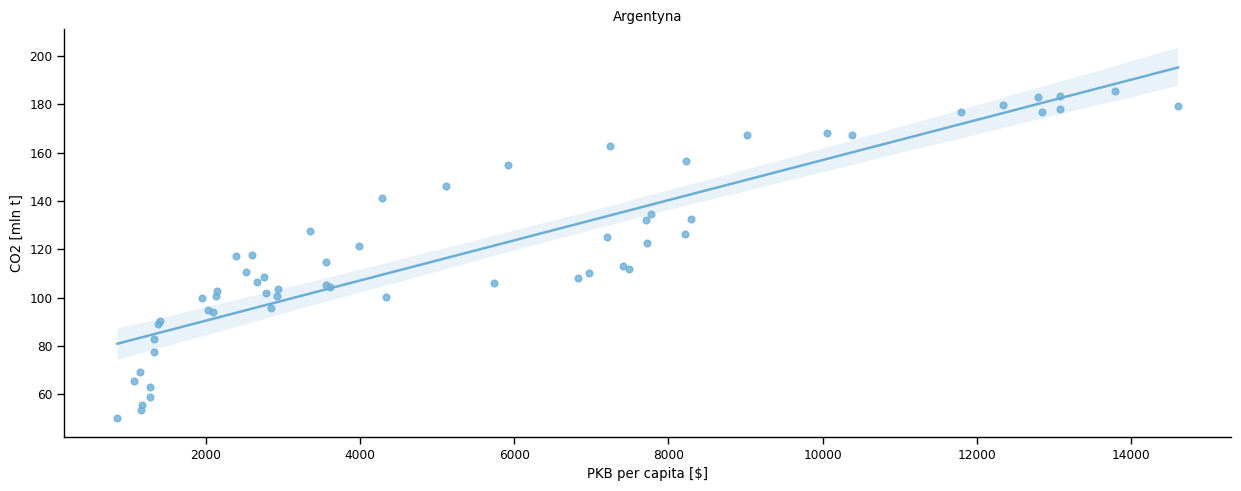

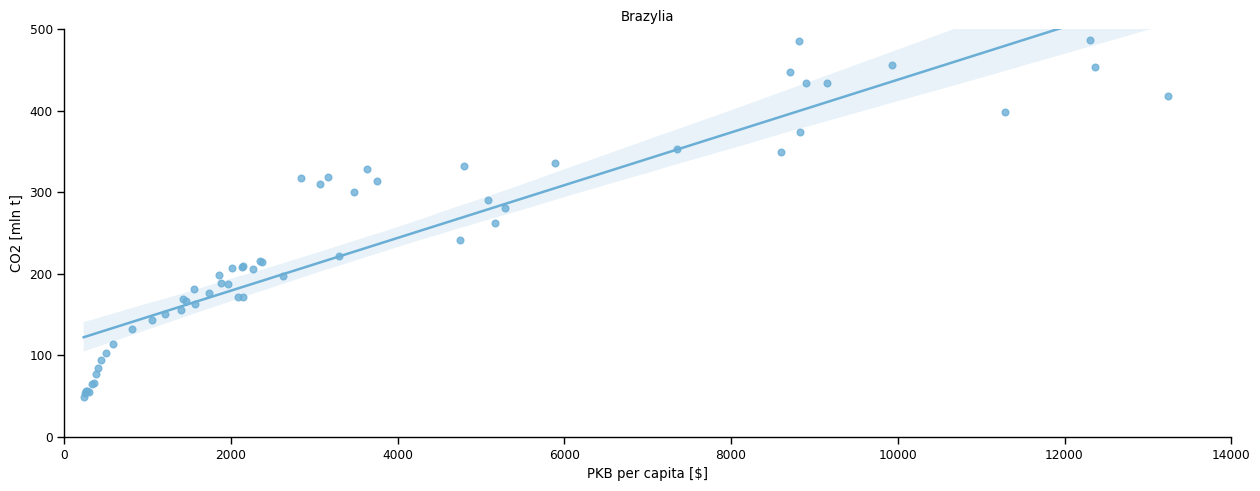

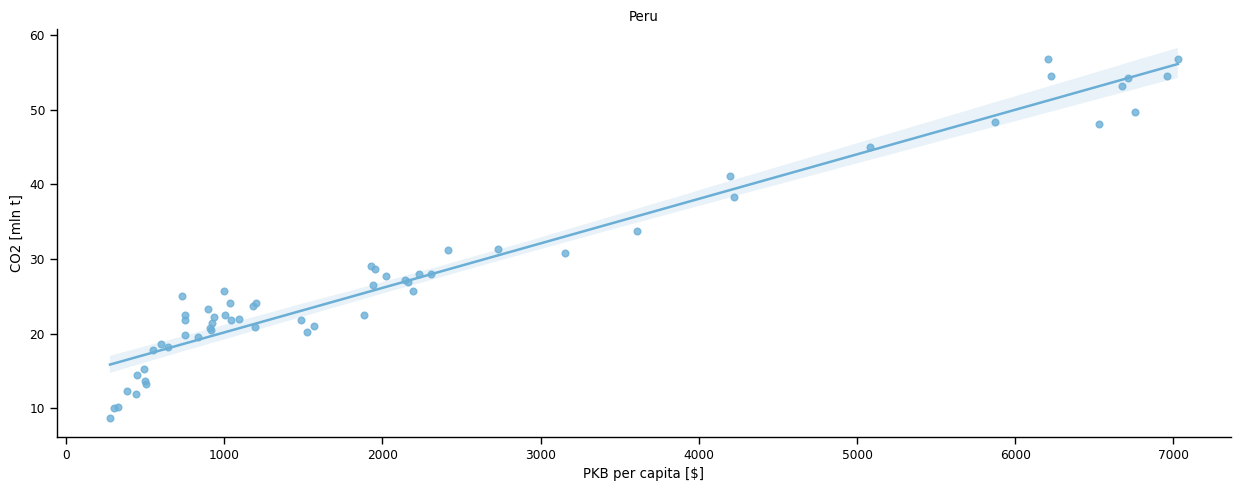

In [186]:
sns.set_context('paper')
l=sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Argentina'))],
                                    
            x="GDP_per_capita",
            y="CO2",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Blues')
l.set(xlabel = 'PKB per capita [$]', ylabel = "CO2 [mln t]")
plt.title('Argentyna')

l1=sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Brazil'))],
                                    
            x="GDP_per_capita",
            y="CO2",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Blues')
l1.set(xlabel = 'PKB per capita [$]', ylabel = "CO2 [mln t]")
plt.title('Brazylia')
plt.ylim(0,500)
plt.xlim(0,14000)

l2=sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Peru'))],
                                    
            x="GDP_per_capita",
            y="CO2",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Blues')
l2.set(xlabel = 'PKB per capita [$]', ylabel = "CO2 [mln t]")
plt.title('Peru')
plt.show()

In[ ]:

##### Regression: CO2 vs forestation

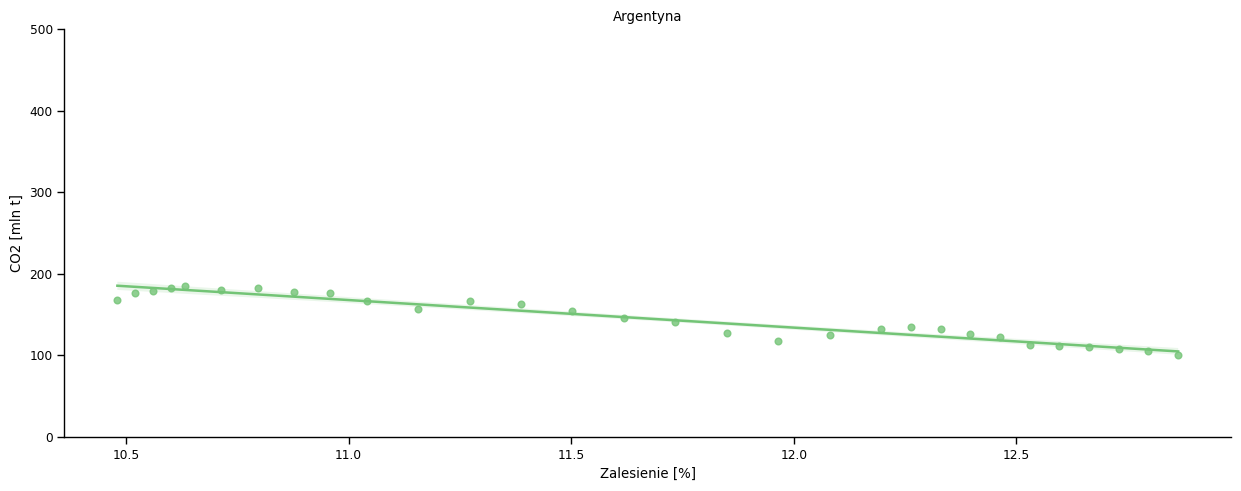

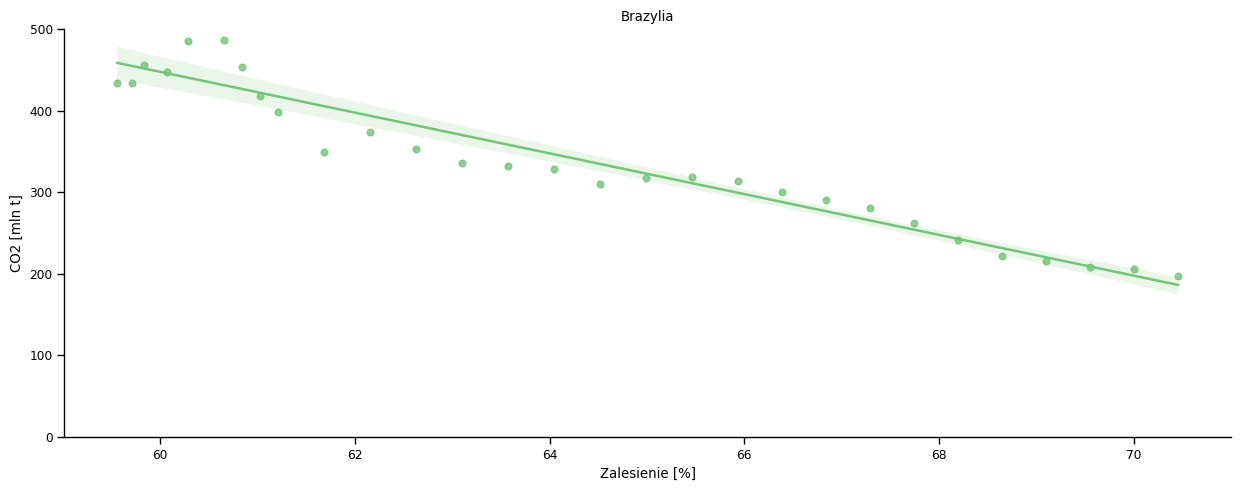

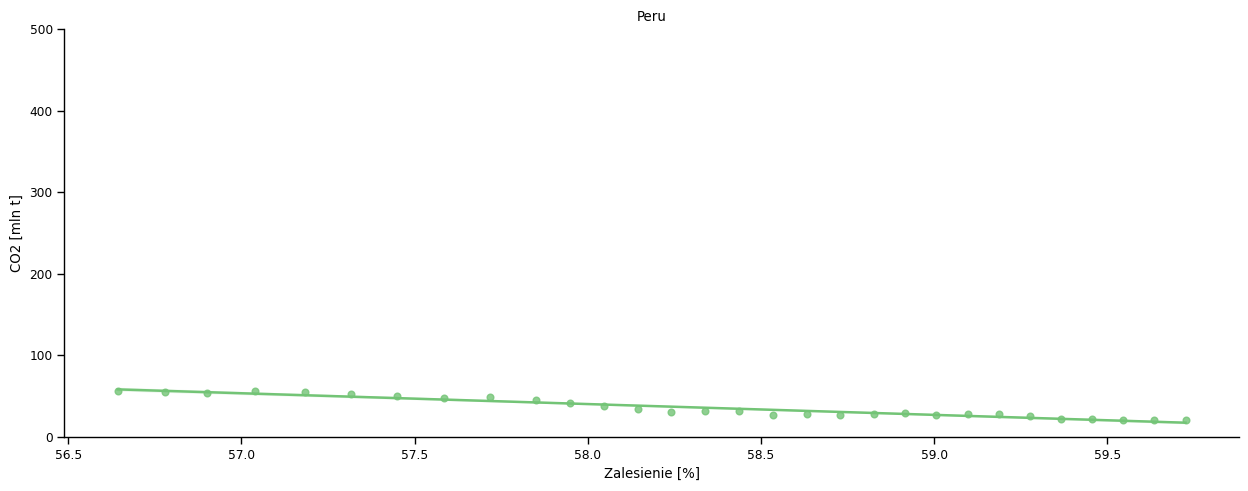

In [185]:
sns.set_context('paper')
l=sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Argentina'))],
                                    
            x="Forestation_percent",
            y="CO2",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Greens')
l.set(xlabel = 'Zalesienie [%]', ylabel = "CO2 [mln t]")
plt.title('Argentyna')
plt.ylim(0,500)

l1=sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Brazil'))],
                                    
            x="Forestation_percent",
            y="CO2",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Greens')
l1.set(xlabel = 'Zalesienie [%]', ylabel = "CO2 [mln t]")
plt.title('Brazylia')
plt.ylim(0,500)

l2=sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Peru'))],
                                    
            x="Forestation_percent",
            y="CO2",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'Greens')
l2.set(xlabel = 'Zalesienie [%]', ylabel = "CO2 [mln t]")
plt.title('Peru')
plt.ylim(0,500)
plt.show()

In[ ]:

##### Regression: CO2 vs urbanization rate

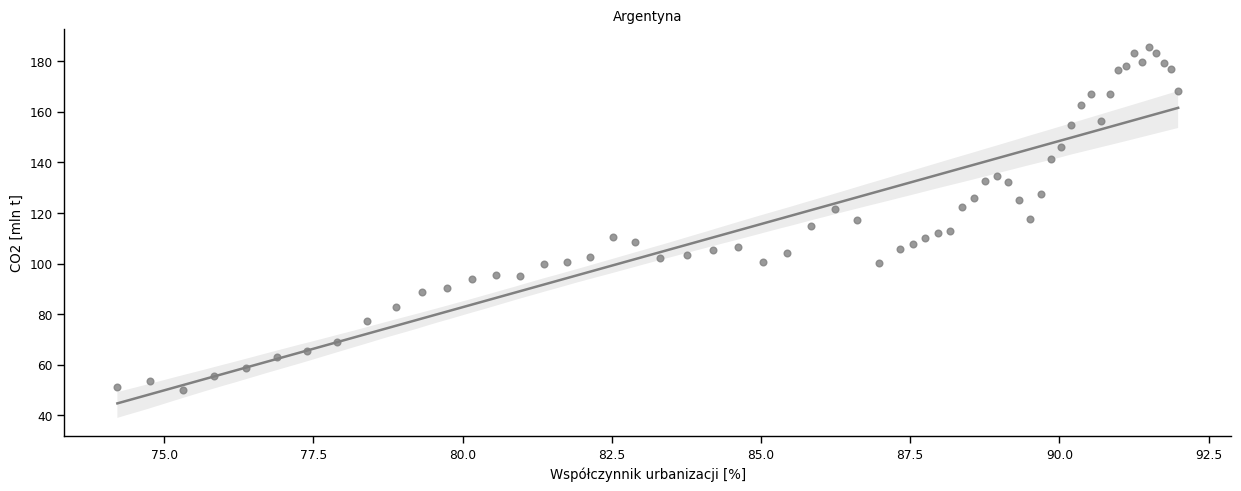

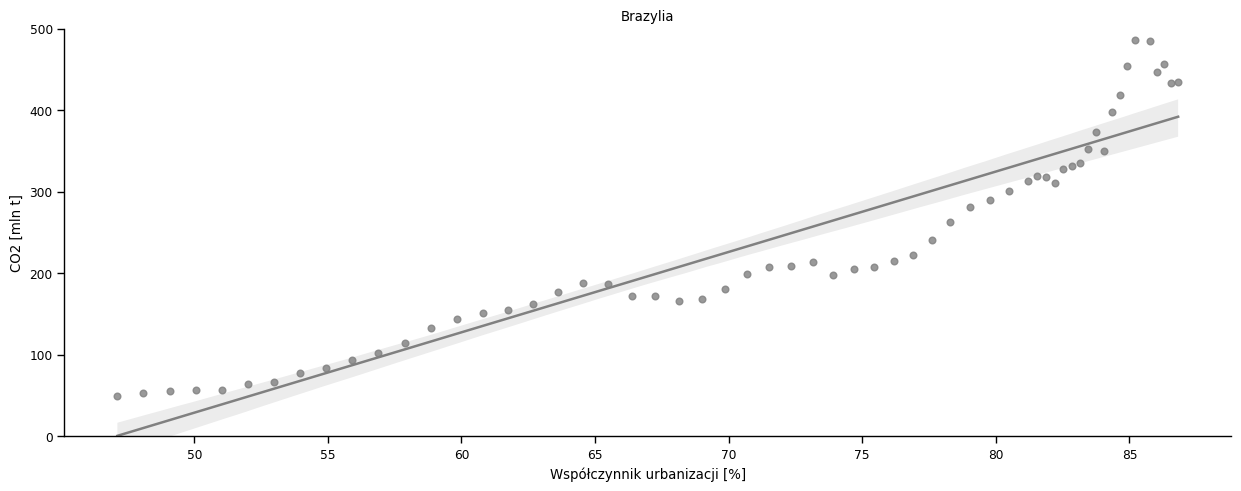

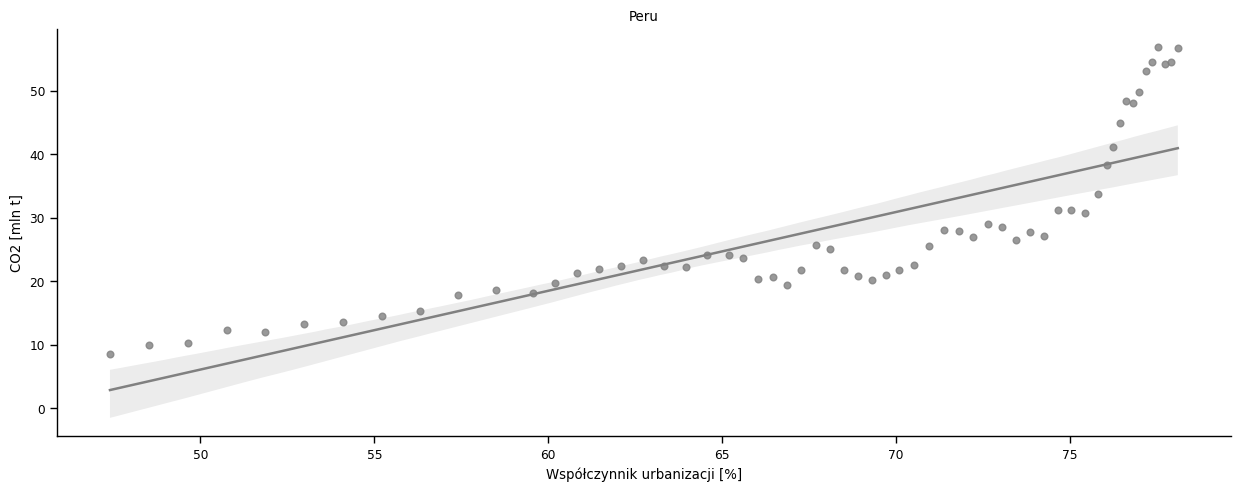

In [187]:
sns.set_context('paper')
l=sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Argentina'))],
                                    
            x="Urbanization_rate_percent",
            y="CO2",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'gray')
l.set(xlabel = 'Współczynnik urbanizacji [%]', ylabel = "CO2 [mln t]")
plt.title('Argentyna')

l1=sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Brazil'))],
                                    
            x="Urbanization_rate_percent",
            y="CO2",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'gray')
l1.set(xlabel = 'Współczynnik urbanizacji [%]', ylabel = "CO2 [mln t]")
plt.title('Brazylia')
plt.ylim(0,500)

l2=sns.lmplot(data=SouthAmerica_temp_CO2_GDP_forest_urb[((SouthAmerica_temp_CO2_GDP_forest_urb['Area'] == 'Peru'))],
                                    
            x="Urbanization_rate_percent",
            y="CO2",
            aspect=2.5, 
            col = 'Area',
            hue = 'Area',
            palette = 'gray')
l2.set(xlabel = 'Współczynnik urbanizacji [%]', ylabel = "CO2 [mln t]")
plt.title('Peru')
plt.show()

In[ ]:

Correlation Argentina

In[500]:

In [37]:
corr_Argentina = SouthAmerica_temp_CO2_GDP_forest_urb[(SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Argentina')]

In[501]:

In [38]:
del corr_Argentina['Area']
del corr_Argentina['Year']

In[502]:

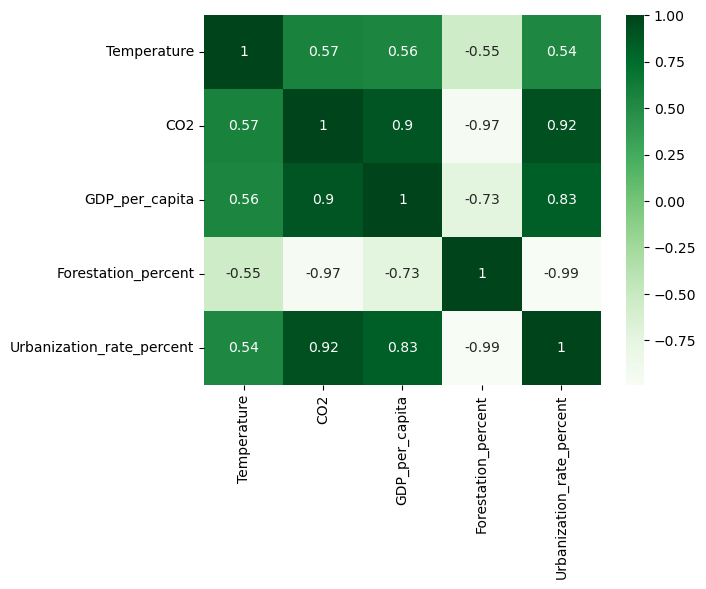

In [39]:
corr_Argentina = corr_Argentina.corr()
sns.heatmap(corr_Argentina, annot=True, cmap = 'Greens')
plt.show()

C:\Users\pauli\AppData\Local\Temp\ipykernel_18412\439070970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_Argentina.rename(columns = {'Temperature' : 'Temperatura', 'CO2': 'CO2', 'Forestation_percent' : 'Poziom zalesienia',


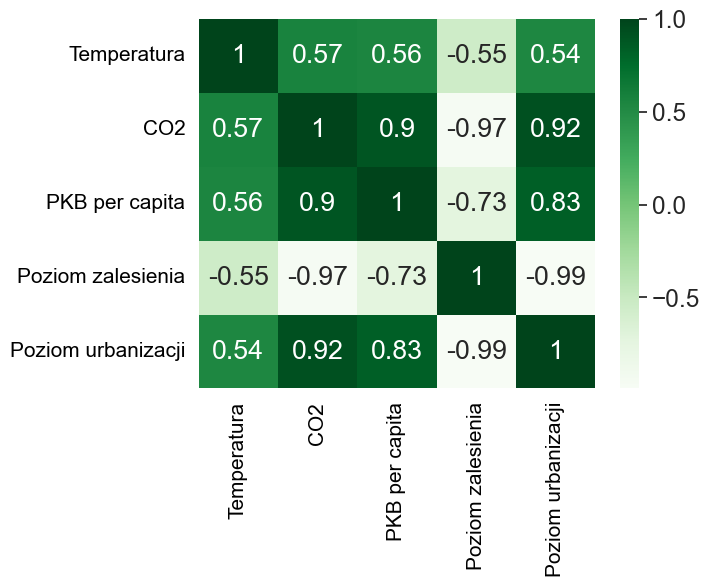

In [62]:
corr_Argentina = SouthAmerica_temp_CO2_GDP_forest_urb[(SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Argentina')]
del corr_Argentina['Area']
del corr_Argentina['Year']

corr_Argentina.rename(columns = {'Temperature' : 'Temperatura', 'CO2': 'CO2', 'Forestation_percent' : 'Poziom zalesienia', 
                                  'GDP_per_capita': 'PKB per capita', 'Urbanization_rate_percent': 'Poziom urbanizacji'}, inplace = True)
corr_Argentina = corr_Argentina.corr()

sns.heatmap(corr_Argentina, annot=True, cmap = 'Greens')
plt.tick_params(axis='x', labelcolor='#000000', labelsize = 15)
plt.tick_params(axis='y', labelcolor='#000000', labelsize = 15)
sns.set(font_scale = 1.6) 
plt.xticks(rotation = 90)



plt.show()

In[ ]:

In[ ]:

Correlation Brazil

In[503]:

In [53]:
corr_Brazil = SouthAmerica_temp_CO2_GDP_forest_urb[(SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Brazil')]

In[504]:

In [54]:
del corr_Brazil['Area']
del corr_Brazil['Year']

In[505]:

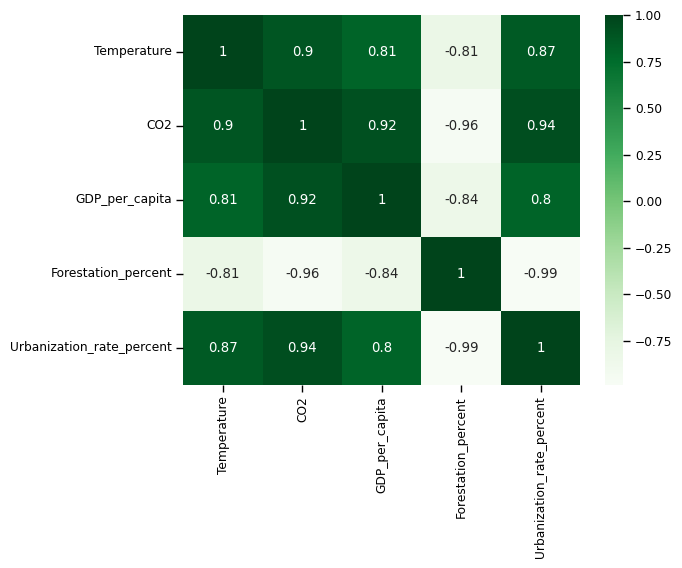

In [55]:
corr_Brazil = corr_Brazil.corr()
sns.heatmap(corr_Brazil, annot=True, cmap = "Greens")
plt.show()

C:\Users\pauli\AppData\Local\Temp\ipykernel_18412\3640616856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_Brazil.rename(columns = {'Temperature' : 'Temperatura', 'CO2': 'CO2', 'Forestation_percent' : 'Poziom zalesienia',


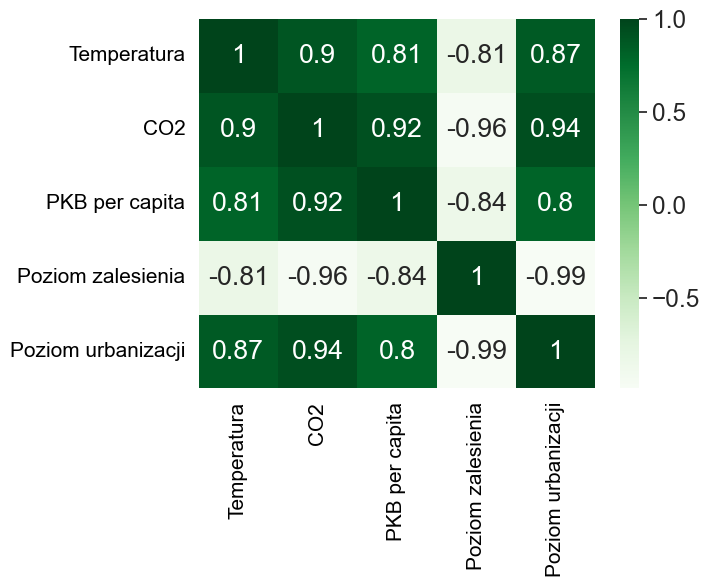

In [60]:
corr_Brazil = SouthAmerica_temp_CO2_GDP_forest_urb[(SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Brazil')]
del corr_Brazil['Area']
del corr_Brazil['Year']

corr_Brazil.rename(columns = {'Temperature' : 'Temperatura', 'CO2': 'CO2', 'Forestation_percent' : 'Poziom zalesienia', 
                                  'GDP_per_capita': 'PKB per capita', 'Urbanization_rate_percent': 'Poziom urbanizacji'}, inplace = True)
corr_Brazil = corr_Brazil.corr()

sns.heatmap(corr_Brazil, annot=True, cmap = 'Greens')
plt.tick_params(axis='x', labelcolor='#000000', labelsize = 15)
plt.tick_params(axis='y', labelcolor='#000000', labelsize = 15)
sns.set(font_scale = 1.6) 
plt.xticks(rotation = 90)



plt.show()

In[ ]:

Correlation Peru

In[506]:

In [56]:
corr_Peru = SouthAmerica_temp_CO2_GDP_forest_urb[(SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Peru')]

In[507]:

In [57]:
del corr_Peru['Area']
del corr_Peru['Year']

In[508]:

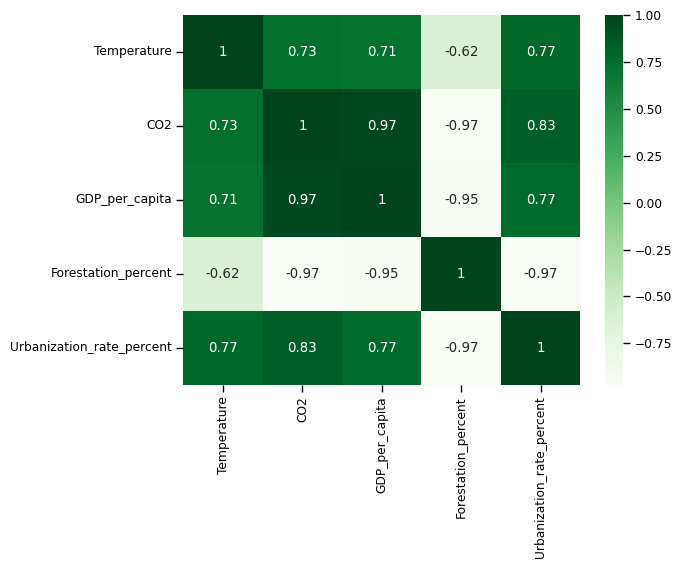

In [58]:
corr_Peru = corr_Peru.corr()
sns.heatmap(corr_Peru, annot=True, cmap = "Greens")
plt.show()

C:\Users\pauli\AppData\Local\Temp\ipykernel_18412\2050614280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_Peru.rename(columns = {'Temperature' : 'Temperatura', 'CO2': 'CO2', 'Forestation_percent' : 'Poziom zalesienia',


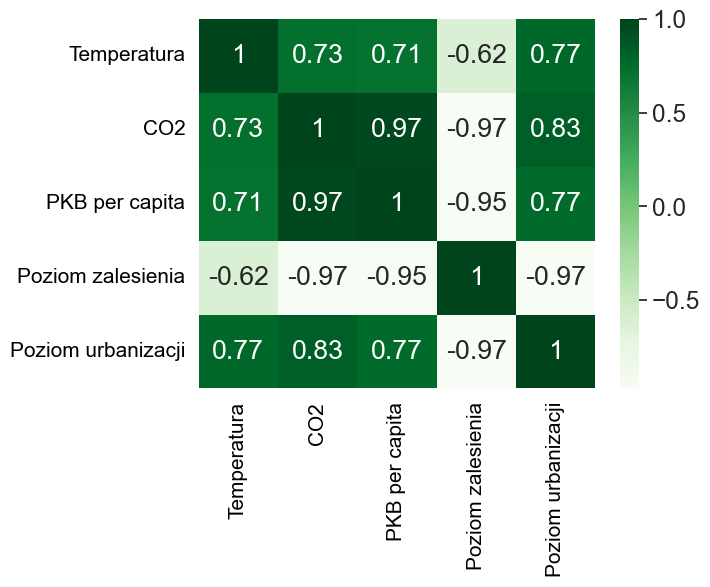

In [64]:
corr_Peru = SouthAmerica_temp_CO2_GDP_forest_urb[(SouthAmerica_temp_CO2_GDP_forest_urb.Area == 'Peru')]
del corr_Peru['Area']
del corr_Peru['Year']

corr_Peru.rename(columns = {'Temperature' : 'Temperatura', 'CO2': 'CO2', 'Forestation_percent' : 'Poziom zalesienia', 
                                  'GDP_per_capita': 'PKB per capita', 'Urbanization_rate_percent': 'Poziom urbanizacji'}, inplace = True)
corr_Peru = corr_Peru.corr()

sns.heatmap(corr_Peru, annot=True, cmap = 'Greens')
plt.tick_params(axis='x', labelcolor='#000000', labelsize = 15)
plt.tick_params(axis='y', labelcolor='#000000', labelsize = 15)
sns.set(font_scale = 1.6) 
plt.xticks(rotation = 90)



plt.show()

In[ ]:

#### Antarctica

In[ ]:

Making individual variable for group purpose working

##### Temperature change in Antarctica

In[526]:

In [28]:
Antarctica = df.copy()
Antarctica = optional_1(Antarctica)
Antarctica_temp= Antarctica [(Antarctica.Continent == 'Antarctica')]
Antarctica_temp = Antarctica[(Antarctica.Area == 'Antarctica')]
Antarctica_temp = Antarctica_temp[(Antarctica_temp.Months == 'Meteorological year') & (Antarctica_temp.Element == 'Temperature change')]
Antarctica_temp

Area   Continent  Continent_Code  Area_Code  Months_Code  \
270  Antarctica  Antarctica               7         30         7020   

                  Months  Element_Code             Element Unit  Y1961  ...  \
270  Meteorological year          7271  Temperature change   °C  0.280  ...   

     Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
270  0.813  0.725 -0.216  1.738  0.546 -0.095  0.217  0.764  1.454  0.615  

[1 rows x 68 columns]

In [29]:
Antarctica_temp.columns = Antarctica_temp.columns.str.replace('Y', '')
del Antarctica_temp['Area_Code']
del Antarctica_temp['Months_Code']
del Antarctica_temp['Months']
del Antarctica_temp['Element']
del Antarctica_temp['Unit']
del Antarctica_temp['Element_Code']
del Antarctica_temp['Continent']
del Antarctica_temp['Continent_Code']
Antarctica_temp

Area  1961   1962  1963   1964   1965   1966  1967   1968   1969  \
270  Antarctica 0.280 -0.227 0.135 -0.366 -0.099 -0.240 0.133 -0.088 -0.256   

     ...  2010  2011   2012  2013  2014   2015  2016  2017  2018  2019  
270  ... 0.813 0.725 -0.216 1.738 0.546 -0.095 0.217 0.764 1.454 0.615  

[1 rows x 60 columns]

In[ ]:

##### Modified table - Temperature change

In[527]:

In [30]:
Antarctica_temp_mdf = pd.melt(Antarctica_temp, id_vars='Area')
Antarctica_temp_mdf = Antarctica_temp_mdf.rename(columns={'variable': 'Year','value': 'Temperature'})
Antarctica_temp_mdf

Area  Year  Temperature
0   Antarctica  1961        0.280
1   Antarctica  1962       -0.227
2   Antarctica  1963        0.135
3   Antarctica  1964       -0.366
4   Antarctica  1965       -0.099
5   Antarctica  1966       -0.240
6   Antarctica  1967        0.133
7   Antarctica  1968       -0.088
8   Antarctica  1969       -0.256
9   Antarctica  1970       -0.133
10  Antarctica  1971        0.280
11  Antarctica  1972        0.621
12  Antarctica  1973        0.011
13  Antarctica  1974        0.169
14  Antarctica  1975        0.177
15  Antarctica  1976       -0.634
16  Antarctica  1977        0.250
17  Antarctica  1978       -0.118
18  Antarctica  1979       -0.234
19  Antarctica  1980        0.565
20  Antarctica  1981        0.706
21  Antarctica  1982       -0.031
22  Antarctica  1983       -0.693
23  Antarctica  1984        0.132
24  Antarctica  1985        0.180
25  Antarctica  1986       -0.269
26  Antarctica  1987       -0.698
27  Antarctica  1988        0.956
28  Antarctica  1989       -0.436
29  Antarctica  1990        0.289
30  Antarctica  1991        0.678
31  Antarctica  1992        0.334
32  Antarctica  1993       -0.734
33  Antarctica  1994       -0.234
34  Antarctica  1995       -0.285
35  Antarctica  1996        0.778
36  Antarctica  1997       -0.556
37  Antarctica  1998       -0.484
38  Antarctica  1999       -0.594
39  Antarctica  2000       -0.778
40  Antarctica  2001       -0.062
41  Antarctica  2002        1.259
42  Antarctica  2003       -0.474
43  Antarctica  2004        0.129
44  Antarctica  2005        0.875
45  Antarctica  2006       -0.081
46  Antarctica  2007        0.680
47  Antarctica  2008        0.605
48  Antarctica  2009        1.314
49  Antarctica  2010        0.813
50  Antarctica  2011        0.725
51  Antarctica  2012       -0.216
52  Antarctica  2013        1.738
53  Antarctica  2014        0.546
54  Antarctica  2015       -0.095
55  Antarctica  2016        0.217
56  Antarctica  2017        0.764
57  Antarctica  2018        1.454
58  Antarctica  2019        0.615

In[ ]:

In[530]:

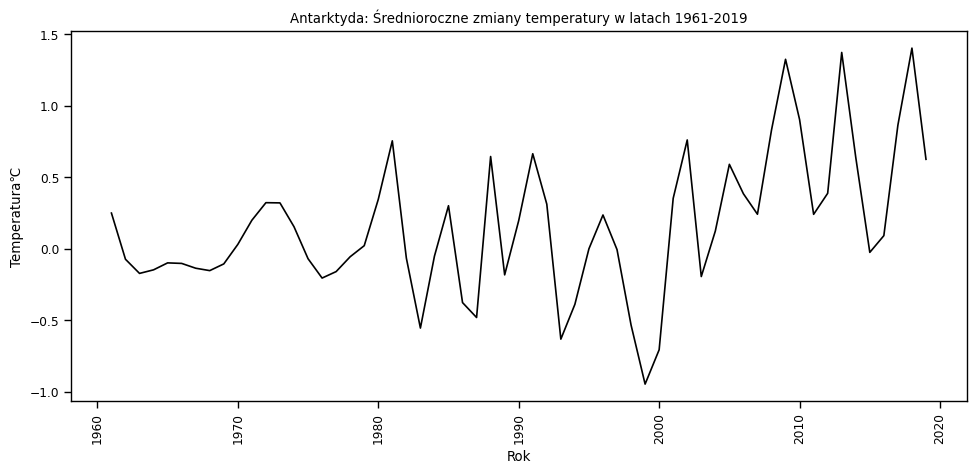

In [33]:
x1=Antarctica_temp_mdf.Year.unique()

x1 = x1.astype(np.int64)

y1_temp = Antarctica_temp_mdf[Antarctica_temp_mdf.Area == 'Antarctica'].iloc[:,2].values.T

bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'k-', label = 'Antarktyda')

plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Temperatura\u2103')
plt.title('Antarktyda: Średnioroczne zmiany temperatury w latach 1961-2019')
plt.show()

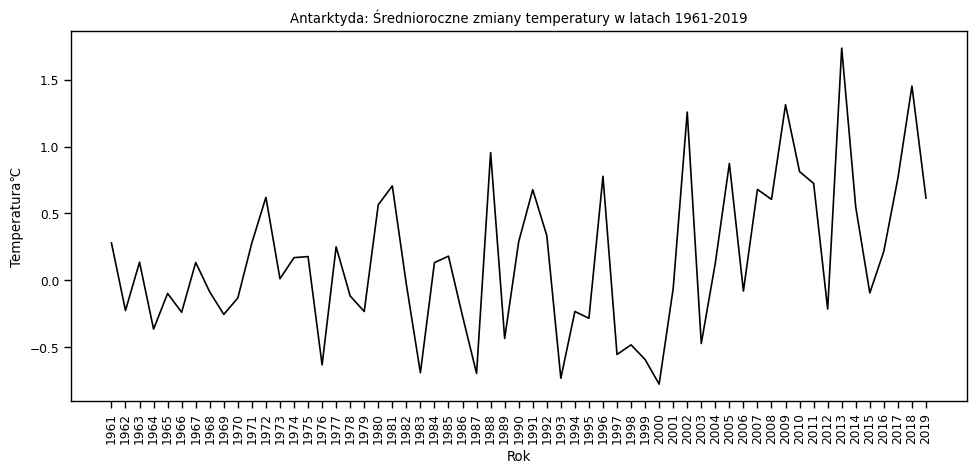

In [62]:
Antarctica_temp_change = Antarctica_temp_mdf [(Antarctica_temp_mdf.Area == 'Antarctica')]
plt.plot(Antarctica_temp_change.Year, Antarctica_temp_change.Temperature, 'k-', label = 'Antarktyda')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Temperatura\u2103')
plt.title('Antarktyda: Średnioroczne zmiany temperatury w latach 1961-2019')
plt.show()

In[ ]:

### Northern Hemisphere

#### DataFrame with temperature change 

In [122]:
NHemisphere = pd.read_csv('northern_hemisphere.csv')
NHemisphere

Season   1961   1962   1963   1964   1965   1966   1967  \
0                        jan  0.170  0.280  0.080 -0.040 -0.020 -0.250 -0.180   
1                        feb  0.290  0.360  0.500 -0.030 -0.370  0.030 -0.370   
2                        mar  0.220  0.300 -0.120 -0.320 -0.090 -0.010  0.230   
3                        apr  0.140  0.220  0.040 -0.300 -0.260 -0.220  0.050   
4                        may  0.070  0.020 -0.040 -0.100 -0.140 -0.050  0.210   
5                        jun  0.180 -0.130 -0.040 -0.090 -0.200  0.060 -0.060   
6                        jul  0.060  0.100  0.100 -0.130 -0.180  0.110  0.040   
7                        aug  0.040  0.040  0.140 -0.230 -0.200  0.140  0.060   
8                        sep -0.030 -0.020  0.130 -0.280 -0.200  0.060 -0.030   
9                        oct -0.040  0.130  0.420 -0.310 -0.020 -0.100  0.290   
10                       nov  0.070  0.120  0.430 -0.220  0.040  0.020  0.040   
11                       Dec -0.170  0.100  0.030 -0.270 -0.080 -0.030  0.020   
12        northern_temp_year  0.080  0.130  0.140 -0.190 -0.140 -0.020  0.030   
13  northern_temp_meteo_year  0.130  0.100  0.140 -0.170 -0.160 -0.020  0.020   
14                    winter  0.280  0.160  0.230 -0.010 -0.220 -0.100 -0.190   
15                    spring  0.140  0.180 -0.040 -0.240 -0.160 -0.090  0.160   
16                    summer  0.090  0.000  0.070 -0.150 -0.200  0.100  0.020   
17                    autumn  0.000  0.080  0.330 -0.270 -0.060 -0.010  0.100   

     1968   1969  ...  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
0  -0.290 -0.430  ... 0.810 0.610 0.680 0.850 0.970 1.180 1.540 1.380 1.140   
1  -0.160 -0.460  ... 0.940 0.560 0.590 0.780 0.720 1.190 1.940 1.510 1.250   
2   0.440 -0.200  ... 1.100 0.880 0.710 0.810 1.200 1.330 1.910 1.520 1.170   
3  -0.010  0.030  ... 1.130 0.840 1.060 0.680 1.080 1.020 1.470 1.190 0.970   
4  -0.060  0.110  ... 0.940 0.660 0.970 0.780 0.890 1.040 1.110 0.920 1.000   
5  -0.050 -0.040  ... 0.840 0.760 0.940 0.770 0.810 1.050 1.110 0.920 0.860   
6  -0.080  0.060  ... 0.880 0.720 0.850 0.700 0.770 0.910 1.040 0.960 0.900   
7  -0.080  0.040  ... 0.860 0.710 0.760 0.740 0.900 1.020 1.120 1.010 0.870   
8  -0.050  0.040  ... 0.700 0.730 0.860 0.700 0.830 1.170 1.220 1.000 0.960   
9  -0.010  0.030  ... 0.890 0.900 0.910 0.830 0.930 1.290 1.030 1.050 1.240   
10 -0.220  0.140  ... 1.200 0.660 0.970 1.120 0.800 1.380 1.120 1.220 0.970   
11 -0.330  0.310  ... 0.500 0.890 0.460 0.830 1.090 1.530 1.040 1.380 1.090   
12 -0.070 -0.030  ... 0.900 0.740 0.810 0.800 0.920 1.180 1.310 1.170 1.030   
13 -0.040 -0.080  ... 0.910 0.710 0.850 0.770 0.900 1.140 1.350 1.150 1.060   
14 -0.140 -0.410  ... 0.810 0.560 0.720 0.700 0.840 1.150 1.670 1.310 1.250   
15  0.120 -0.020  ... 1.060 0.790 0.910 0.760 1.060 1.130 1.500 1.210 1.050   
16 -0.070  0.020  ... 0.860 0.730 0.850 0.730 0.830 0.990 1.090 0.970 0.870   
17 -0.090  0.070  ... 0.930 0.770 0.910 0.880 0.860 1.280 1.130 1.090 1.060   

    2019  
0  1.200  
1  1.120  
2  1.550  
3  1.240  
4  0.980  
5  1.190  
6  1.030  
7  1.090  
8  1.210  
9  1.300  
10 1.200  
11 1.390  
12 1.210  
13 1.180  
14 1.130  
15 1.260  
16 1.100  
17 1.240  

[18 rows x 60 columns]

In [123]:
NHemisphere_temp = pd.melt(NHemisphere, id_vars='Season')
NHemisphere_temp = NHemisphere_temp.rename(columns={'variable': 'Year','value': 'Temperature'})
NHemisphere_temp = NHemisphere_temp.sort_values(by=['Season', 'Year'])
NHemisphere_temp

Season  Year  Temperature
11       Dec  1961       -0.170
29       Dec  1962        0.100
47       Dec  1963        0.030
65       Dec  1964       -0.270
83       Dec  1965       -0.080
...      ...   ...          ...
986   winter  2015        1.150
1004  winter  2016        1.670
1022  winter  2017        1.310
1040  winter  2018        1.250
1058  winter  2019        1.130

[1062 rows x 3 columns]

In [124]:
NHemisphere_temp.Year = pd.to_numeric(NHemisphere_temp.Year)

In [125]:
NHemisphere_temp_1 = NHemisphere_temp[((NHemisphere_temp.Season == 'winter') & (NHemisphere_temp.Year == 1974))
                            | ((NHemisphere_temp.Season == 'winter') & (NHemisphere_temp.Year == 1989))
                            | ((NHemisphere_temp.Season == 'winter') & (NHemisphere_temp.Year == 2004))
                            | ((NHemisphere_temp.Season == 'winter') & (NHemisphere_temp.Year == 2019))
                            | ((NHemisphere_temp.Season == 'spring') & (NHemisphere_temp.Year == 1974))
                            | ((NHemisphere_temp.Season == 'spring') & (NHemisphere_temp.Year == 1989))
                            | ((NHemisphere_temp.Season == 'spring') & (NHemisphere_temp.Year == 2004))
                            | ((NHemisphere_temp.Season == 'spring') & (NHemisphere_temp.Year == 2019))
                            | ((NHemisphere_temp.Season == 'summer') & (NHemisphere_temp.Year == 1974))
                            | ((NHemisphere_temp.Season == 'summer') & (NHemisphere_temp.Year == 1989))
                            | ((NHemisphere_temp.Season == 'summer') & (NHemisphere_temp.Year == 2004))
                            | ((NHemisphere_temp.Season == 'summer') & (NHemisphere_temp.Year == 2019))
                            | ((NHemisphere_temp.Season == 'autumn') & (NHemisphere_temp.Year == 1974))
                            | ((NHemisphere_temp.Season == 'autumn') & (NHemisphere_temp.Year == 1989))
                            | ((NHemisphere_temp.Season == 'autumn') & (NHemisphere_temp.Year == 2004))
                            | ((NHemisphere_temp.Season == 'autumn') & (NHemisphere_temp.Year == 2019))]

NHemisphere_temp_2=NHemisphere_temp_1.sort_values(ascending = False, by= ['Season'])
NHemisphere_temp_2

Season  Year  Temperature
248   winter  1974       -0.210
518   winter  1989        0.300
788   winter  2004        0.860
1058  winter  2019        1.130
250   summer  1974       -0.140
520   summer  1989        0.270
790   summer  2004        0.500
1060  summer  2019        1.100
249   spring  1974       -0.090
519   spring  1989        0.330
789   spring  2004        0.690
1059  spring  2019        1.260
251   autumn  1974       -0.200
521   autumn  1989        0.200
791   autumn  2004        0.760
1061  autumn  2019        1.240

In [90]:
sns.set_theme(style="dark")
NHemisphere_temp_2

# Plot each year's time series in its own facet
g = sns.relplot(
    data=NHemisphere_temp_2,
    x="Season", y="Temperature", col="Year", hue="Year",
    kind="line", palette="Greys", linewidth=4, zorder=5,
    col_wrap=2, height=4, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=NHemisphere_temp_2, x="Season", y="Temperature", units="Year",
        estimator=None, color=".8", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::1])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Temperatura [°C]")
g.tight_layout()

In [126]:
NHemisphere_temp_3 = NHemisphere_temp[(NHemisphere_temp.Season == 'northern_temp_meteo_year')]
NHemisphere_temp_3

Season  Year  Temperature
13    northern_temp_meteo_year  1961        0.130
31    northern_temp_meteo_year  1962        0.100
49    northern_temp_meteo_year  1963        0.140
67    northern_temp_meteo_year  1964       -0.170
85    northern_temp_meteo_year  1965       -0.160
103   northern_temp_meteo_year  1966       -0.020
121   northern_temp_meteo_year  1967        0.020
139   northern_temp_meteo_year  1968       -0.040
157   northern_temp_meteo_year  1969       -0.080
175   northern_temp_meteo_year  1970        0.010
193   northern_temp_meteo_year  1971       -0.170
211   northern_temp_meteo_year  1972       -0.180
229   northern_temp_meteo_year  1973        0.090
247   northern_temp_meteo_year  1974       -0.160
265   northern_temp_meteo_year  1975       -0.060
283   northern_temp_meteo_year  1976       -0.200
301   northern_temp_meteo_year  1977        0.100
319   northern_temp_meteo_year  1978        0.020
337   northern_temp_meteo_year  1979        0.040
355   northern_temp_meteo_year  1980        0.210
373   northern_temp_meteo_year  1981        0.330
391   northern_temp_meteo_year  1982        0.070
409   northern_temp_meteo_year  1983        0.270
427   northern_temp_meteo_year  1984        0.080
445   northern_temp_meteo_year  1985       -0.050
463   northern_temp_meteo_year  1986        0.140
481   northern_temp_meteo_year  1987        0.210
499   northern_temp_meteo_year  1988        0.380
517   northern_temp_meteo_year  1989        0.280
535   northern_temp_meteo_year  1990        0.520
553   northern_temp_meteo_year  1991        0.420
571   northern_temp_meteo_year  1992        0.130
589   northern_temp_meteo_year  1993        0.190
607   northern_temp_meteo_year  1994        0.360
625   northern_temp_meteo_year  1995        0.580
643   northern_temp_meteo_year  1996        0.260
661   northern_temp_meteo_year  1997        0.510
679   northern_temp_meteo_year  1998        0.690
697   northern_temp_meteo_year  1999        0.490
715   northern_temp_meteo_year  2000        0.530
733   northern_temp_meteo_year  2001        0.610
751   northern_temp_meteo_year  2002        0.730
769   northern_temp_meteo_year  2003        0.700
787   northern_temp_meteo_year  2004        0.700
805   northern_temp_meteo_year  2005        0.820
823   northern_temp_meteo_year  2006        0.790
841   northern_temp_meteo_year  2007        0.880
859   northern_temp_meteo_year  2008        0.690
877   northern_temp_meteo_year  2009        0.720
895   northern_temp_meteo_year  2010        0.910
913   northern_temp_meteo_year  2011        0.710
931   northern_temp_meteo_year  2012        0.850
949   northern_temp_meteo_year  2013        0.770
967   northern_temp_meteo_year  2014        0.900
985   northern_temp_meteo_year  2015        1.140
1003  northern_temp_meteo_year  2016        1.350
1021  northern_temp_meteo_year  2017        1.150
1039  northern_temp_meteo_year  2018        1.060
1057  northern_temp_meteo_year  2019        1.180

In[ ]:

### Southern Hemisphere

#### DataFrame with temperature change

In [127]:
SHemisphere = pd.read_csv('southern_hemisphere.csv')
SHemisphere

Season   1961   1962   1963   1964   1965   1966   1967  \
0                        jan -0.030 -0.170 -0.140 -0.130 -0.140 -0.130  0.030   
1                        feb  0.080 -0.070 -0.140 -0.170  0.020 -0.120 -0.040   
2                        mar -0.040 -0.090 -0.160 -0.100 -0.160  0.070 -0.140   
3                        apr  0.120 -0.130 -0.180 -0.320 -0.120 -0.040 -0.150   
4                        may  0.170 -0.150 -0.070 -0.390 -0.100 -0.190  0.040   
5                        jun  0.050  0.190  0.130  0.010  0.040 -0.040 -0.100   
6                        jul -0.040 -0.060  0.020  0.040 -0.080  0.060 -0.010   
7                        aug -0.040 -0.060  0.300 -0.200  0.120 -0.300 -0.060   
8                        sep  0.190  0.030  0.220 -0.310 -0.090 -0.120 -0.100   
9                        oct  0.030 -0.100 -0.120 -0.320 -0.080 -0.230 -0.130   
10                       nov -0.010  0.000 -0.120 -0.210 -0.150 -0.030 -0.140   
11                       Dec -0.150 -0.150 -0.080 -0.330 -0.070 -0.020 -0.130   
12        southern_temp_year  0.030 -0.060 -0.030 -0.200 -0.070 -0.090 -0.080   
13  southern_temp_meteo_year  0.040 -0.060 -0.030 -0.180 -0.090 -0.090 -0.070   
14                    winter  0.010 -0.130 -0.140 -0.130 -0.150 -0.100 -0.010   
15                    spring  0.090 -0.120 -0.140 -0.270 -0.130 -0.050 -0.080   
16                    summer -0.010  0.020  0.150 -0.050  0.030 -0.090 -0.050   
17                    autumn  0.070 -0.020  0.000 -0.280 -0.110 -0.130 -0.120   

     1968   1969  ...  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
0  -0.240  0.220  ... 0.700 0.420 0.300 0.570 0.540 0.530 0.800 0.660 0.490   
1  -0.130  0.110  ... 0.730 0.400 0.400 0.460 0.380 0.610 0.790 0.750 0.450   
2  -0.050  0.220  ... 0.740 0.420 0.440 0.530 0.350 0.590 0.810 0.800 0.590   
3  -0.110  0.310  ... 0.560 0.450 0.380 0.400 0.510 0.500 0.740 0.690 0.810   
4  -0.230  0.260  ... 0.580 0.410 0.600 0.440 0.820 0.560 0.800 0.910 0.630   
5  -0.140  0.110  ... 0.520 0.490 0.360 0.610 0.540 0.580 0.500 0.520 0.690   
6  -0.170 -0.130  ... 0.380 0.680 0.320 0.510 0.400 0.560 0.660 0.680 0.750   
7  -0.090  0.030  ... 0.480 0.770 0.550 0.640 0.750 0.610 0.920 0.730 0.670   
8  -0.320  0.130  ... 0.560 0.400 0.590 0.830 0.910 0.550 0.600 0.540 0.650   
9   0.180  0.170  ... 0.520 0.410 0.680 0.550 0.690 0.910 0.750 0.750 0.800   
10  0.120  0.100  ... 0.420 0.510 0.600 0.540 0.540 0.760 0.720 0.540 0.680   
11  0.050  0.190  ... 0.390 0.320 0.610 0.560 0.470 0.800 0.690 0.480 0.740   
12 -0.090  0.140  ... 0.550 0.470 0.480 0.550 0.580 0.630 0.730 0.670 0.660   
13 -0.110  0.130  ... 0.570 0.480 0.460 0.560 0.580 0.600 0.740 0.690 0.640   
14 -0.160  0.130  ... 0.700 0.410 0.340 0.550 0.490 0.540 0.800 0.700 0.470   
15 -0.130  0.260  ... 0.630 0.430 0.470 0.460 0.560 0.550 0.780 0.800 0.680   
16 -0.130  0.010  ... 0.460 0.650 0.410 0.590 0.560 0.580 0.700 0.640 0.700   
17  0.000  0.130  ... 0.500 0.440 0.620 0.640 0.710 0.740 0.690 0.610 0.710   

    2019  
0  0.660  
1  0.780  
2  0.780  
3  0.780  
4  0.720  
5  0.630  
6  0.860  
7  0.810  
8  0.650  
9  0.730  
10 0.790  
11 0.790  
12 0.750  
13 0.740  
14 0.730  
15 0.760  
16 0.770  
17 0.720  

[18 rows x 60 columns]

In [128]:
SHemisphere_temp = pd.melt(SHemisphere, id_vars='Season')
SHemisphere_temp = SHemisphere_temp.rename(columns={'variable': 'Year','value': 'Temperature'})
SHemisphere_temp = SHemisphere_temp.sort_values(by=['Season', 'Year'])
SHemisphere_temp

Season  Year  Temperature
11       Dec  1961       -0.150
29       Dec  1962       -0.150
47       Dec  1963       -0.080
65       Dec  1964       -0.330
83       Dec  1965       -0.070
...      ...   ...          ...
986   winter  2015        0.540
1004  winter  2016        0.800
1022  winter  2017        0.700
1040  winter  2018        0.470
1058  winter  2019        0.730

[1062 rows x 3 columns]

In [129]:
SHemisphere_temp.Year = pd.to_numeric(SHemisphere_temp.Year)

In [130]:
SHemisphere_temp_1 = SHemisphere_temp[((SHemisphere_temp.Season == 'winter') & (SHemisphere_temp.Year == 1974))
                            | ((SHemisphere_temp.Season == 'winter') & (SHemisphere_temp.Year == 1989))
                            | ((SHemisphere_temp.Season == 'winter') & (SHemisphere_temp.Year == 2004))
                            | ((SHemisphere_temp.Season == 'winter') & (SHemisphere_temp.Year == 2019))
                            | ((SHemisphere_temp.Season == 'spring') & (SHemisphere_temp.Year == 1974))
                            | ((SHemisphere_temp.Season == 'spring') & (SHemisphere_temp.Year == 1989))
                            | ((SHemisphere_temp.Season == 'spring') & (SHemisphere_temp.Year == 2004))
                            | ((SHemisphere_temp.Season == 'spring') & (SHemisphere_temp.Year == 2019))
                            | ((SHemisphere_temp.Season == 'summer') & (SHemisphere_temp.Year == 1974))
                            | ((SHemisphere_temp.Season == 'summer') & (SHemisphere_temp.Year == 1989))
                            | ((SHemisphere_temp.Season == 'summer') & (SHemisphere_temp.Year == 2004))
                            | ((SHemisphere_temp.Season == 'summer') & (SHemisphere_temp.Year == 2019))
                            | ((SHemisphere_temp.Season == 'autumn') & (SHemisphere_temp.Year == 1974))
                            | ((SHemisphere_temp.Season == 'autumn') & (SHemisphere_temp.Year == 1989))
                            | ((SHemisphere_temp.Season == 'autumn') & (SHemisphere_temp.Year == 2004))
                            | ((SHemisphere_temp.Season == 'autumn') & (SHemisphere_temp.Year == 2019))]

SHemisphere_temp_2=SHemisphere_temp_1.sort_values(ascending = False, by= ['Season'])
SHemisphere_temp_2

Season  Year  Temperature
248   winter  1974       -0.080
518   winter  1989        0.170
788   winter  2004        0.520
1058  winter  2019        0.730
250   summer  1974        0.150
520   summer  1989        0.280
790   summer  2004        0.270
1060  summer  2019        0.770
249   spring  1974       -0.050
519   spring  1989        0.210
789   spring  2004        0.380
1059  spring  2019        0.760
251   autumn  1974        0.050
521   autumn  1989        0.350
791   autumn  2004        0.460
1061  autumn  2019        0.720

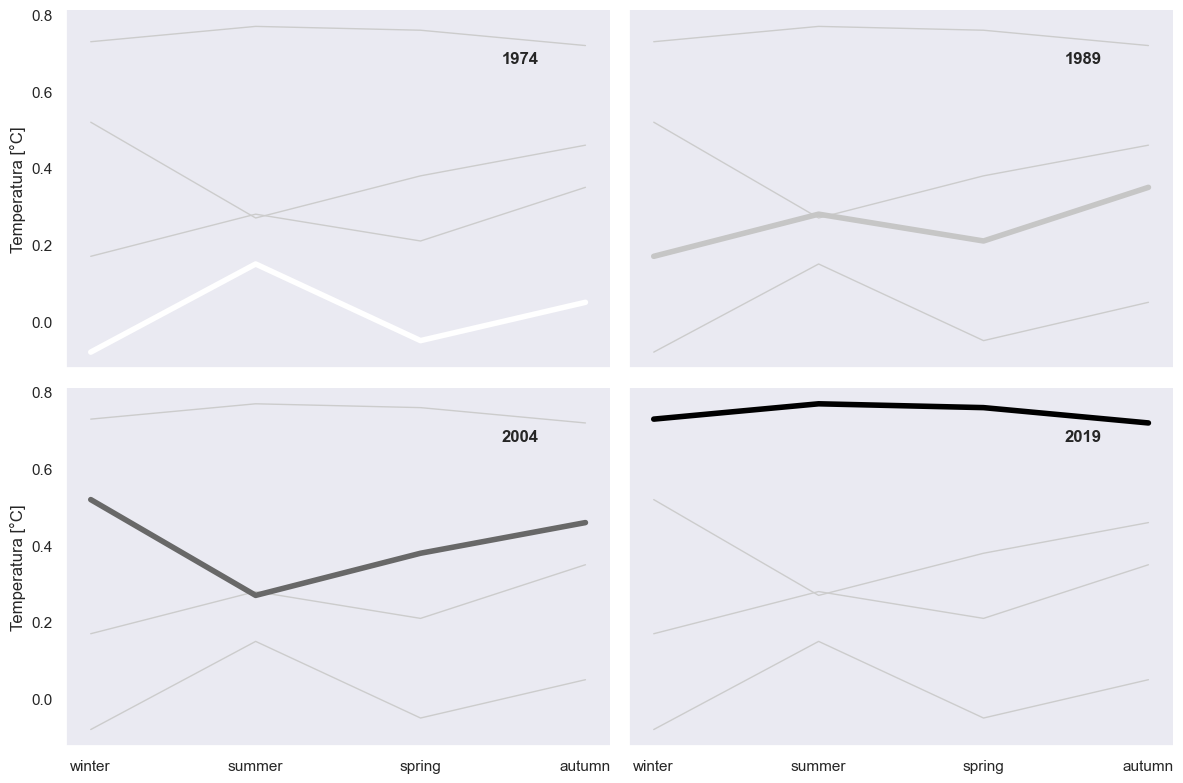

In [373]:

SHemisphere_temp_2

# Plot each year's time series in its own facet
g = sns.relplot(
    data=SHemisphere_temp_2,
    x="Season", y="Temperature", col="Year", hue="Year",
    kind="line", palette="Greys", linewidth=4, zorder=5,
    col_wrap=2, height=4, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=SHemisphere_temp_2, x="Season", y="Temperature", units="Year",
        estimator=None, color=".8", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::1])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Temperatura [°C]")
g.tight_layout()

In [131]:
SHemisphere_temp_3 = SHemisphere_temp[(SHemisphere_temp.Season == 'southern_temp_meteo_year')]
SHemisphere_temp_3

Season  Year  Temperature
13    southern_temp_meteo_year  1961        0.040
31    southern_temp_meteo_year  1962       -0.060
49    southern_temp_meteo_year  1963       -0.030
67    southern_temp_meteo_year  1964       -0.180
85    southern_temp_meteo_year  1965       -0.090
103   southern_temp_meteo_year  1966       -0.090
121   southern_temp_meteo_year  1967       -0.070
139   southern_temp_meteo_year  1968       -0.110
157   southern_temp_meteo_year  1969        0.130
175   southern_temp_meteo_year  1970        0.100
193   southern_temp_meteo_year  1971       -0.010
211   southern_temp_meteo_year  1972        0.160
229   southern_temp_meteo_year  1973        0.270
247   southern_temp_meteo_year  1974        0.020
265   southern_temp_meteo_year  1975        0.040
283   southern_temp_meteo_year  1976       -0.040
301   southern_temp_meteo_year  1977        0.270
319   southern_temp_meteo_year  1978        0.110
337   southern_temp_meteo_year  1979        0.230
355   southern_temp_meteo_year  1980        0.350
373   southern_temp_meteo_year  1981        0.280
391   southern_temp_meteo_year  1982        0.210
409   southern_temp_meteo_year  1983        0.400
427   southern_temp_meteo_year  1984        0.270
445   southern_temp_meteo_year  1985        0.250
463   southern_temp_meteo_year  1986        0.220
481   southern_temp_meteo_year  1987        0.390
499   southern_temp_meteo_year  1988        0.430
517   southern_temp_meteo_year  1989        0.250
535   southern_temp_meteo_year  1990        0.370
553   southern_temp_meteo_year  1991        0.400
571   southern_temp_meteo_year  1992        0.330
589   southern_temp_meteo_year  1993        0.280
607   southern_temp_meteo_year  1994        0.240
625   southern_temp_meteo_year  1995        0.330
643   southern_temp_meteo_year  1996        0.380
661   southern_temp_meteo_year  1997        0.390
679   southern_temp_meteo_year  1998        0.540
697   southern_temp_meteo_year  1999        0.300
715   southern_temp_meteo_year  2000        0.280
733   southern_temp_meteo_year  2001        0.420
751   southern_temp_meteo_year  2002        0.540
769   southern_temp_meteo_year  2003        0.490
787   southern_temp_meteo_year  2004        0.410
805   southern_temp_meteo_year  2005        0.500
823   southern_temp_meteo_year  2006        0.470
841   southern_temp_meteo_year  2007        0.490
859   southern_temp_meteo_year  2008        0.390
877   southern_temp_meteo_year  2009        0.570
895   southern_temp_meteo_year  2010        0.570
913   southern_temp_meteo_year  2011        0.480
931   southern_temp_meteo_year  2012        0.460
949   southern_temp_meteo_year  2013        0.560
967   southern_temp_meteo_year  2014        0.580
985   southern_temp_meteo_year  2015        0.600
1003  southern_temp_meteo_year  2016        0.740
1021  southern_temp_meteo_year  2017        0.690
1039  southern_temp_meteo_year  2018        0.640
1057  southern_temp_meteo_year  2019        0.740

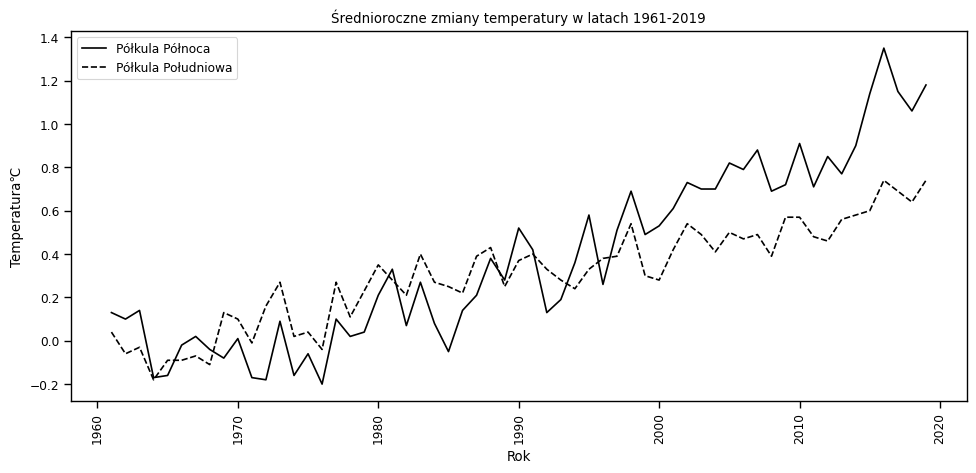

In [46]:
NHemisphere_temp_3
SHemisphere_temp_3
plt.plot(NHemisphere_temp_3.Year, NHemisphere_temp_3.Temperature, 'k-', label = 'Półkula Północa')
plt.plot(SHemisphere_temp_3.Year, SHemisphere_temp_3.Temperature, 'k--', label = 'Półkula Południowa')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.show()

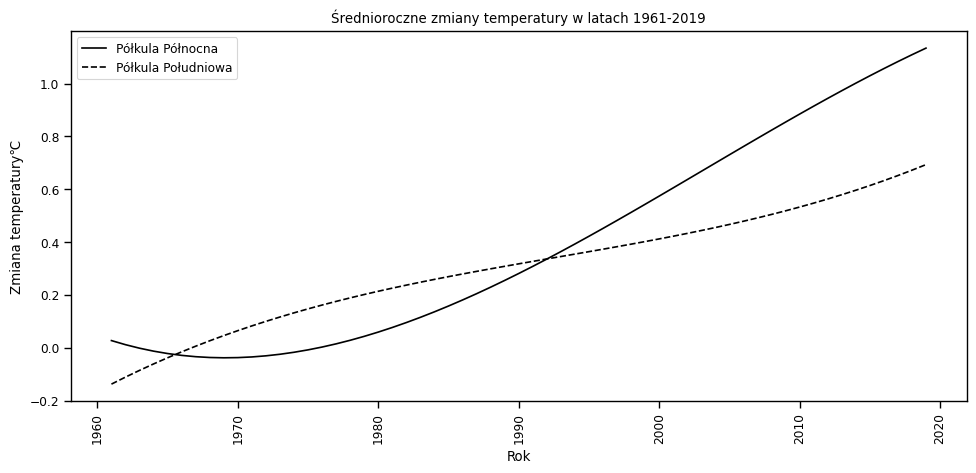

In [132]:
x1=NHemisphere_temp_3.Year.unique()

x1 = x1.astype(np.int64)

y1_temp = NHemisphere_temp_3[NHemisphere_temp_3.Season == 'northern_temp_meteo_year'].iloc[:,2].values.T

bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 


x2=SHemisphere_temp_3.Year.unique()

x2 = x1.astype(np.int64)

y2_temp = SHemisphere_temp_3[SHemisphere_temp_3.Season == 'southern_temp_meteo_year'].iloc[:,2].values.T

bspl2 = splrep(x2, y2_temp, s=4)
bspl_y2 = splev(x2, bspl2)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'k-', label = 'Półkula Północna')
plt.plot(x2, bspl_y2, 'k--', label = 'Półkula Południowa')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Zmiana temperatury\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.show()

In [133]:
Hemispheres = pd.merge(NHemisphere_temp_3, SHemisphere_temp_3, on =['Season','Year', 'Temperature'], how = 'outer')
Hemispheres

Season  Year  Temperature
0    northern_temp_meteo_year  1961        0.130
1    northern_temp_meteo_year  1962        0.100
2    northern_temp_meteo_year  1963        0.140
3    northern_temp_meteo_year  1964       -0.170
4    northern_temp_meteo_year  1965       -0.160
..                        ...   ...          ...
113  southern_temp_meteo_year  2015        0.600
114  southern_temp_meteo_year  2016        0.740
115  southern_temp_meteo_year  2017        0.690
116  southern_temp_meteo_year  2018        0.640
117  southern_temp_meteo_year  2019        0.740

[118 rows x 3 columns]

In [134]:
Hemispheres_1 = Hemispheres[(((Hemispheres.Season == 'northern_temp_meteo_year') & (Hemispheres.Year == 1961))
                            | ((Hemispheres.Season == 'southern_temp_meteo_year') & (Hemispheres.Year == 1961))
                            | ((Hemispheres.Season == 'northern_temp_meteo_year') & (Hemispheres.Year == 1976))
                            | ((Hemispheres.Season == 'southern_temp_meteo_year') & (Hemispheres.Year == 1976))
                            | ((Hemispheres.Season == 'northern_temp_meteo_year') & (Hemispheres.Year == 1991))
                            | ((Hemispheres.Season == 'southern_temp_meteo_year') & (Hemispheres.Year == 1991))
                            | ((Hemispheres.Season == 'northern_temp_meteo_year') & (Hemispheres.Year == 2006))
                            | ((Hemispheres.Season == 'southern_temp_meteo_year') & (Hemispheres.Year == 2006))
                            | ((Hemispheres.Season == 'northern_temp_meteo_year') & (Hemispheres.Year == 2019))
                            | ((Hemispheres.Season == 'southern_temp_meteo_year') & (Hemispheres.Year == 2019)))]

Hemispheres_1

Season  Year  Temperature
0    northern_temp_meteo_year  1961        0.130
15   northern_temp_meteo_year  1976       -0.200
30   northern_temp_meteo_year  1991        0.420
45   northern_temp_meteo_year  2006        0.790
58   northern_temp_meteo_year  2019        1.180
59   southern_temp_meteo_year  1961        0.040
74   southern_temp_meteo_year  1976       -0.040
89   southern_temp_meteo_year  1991        0.400
104  southern_temp_meteo_year  2006        0.470
117  southern_temp_meteo_year  2019        0.740

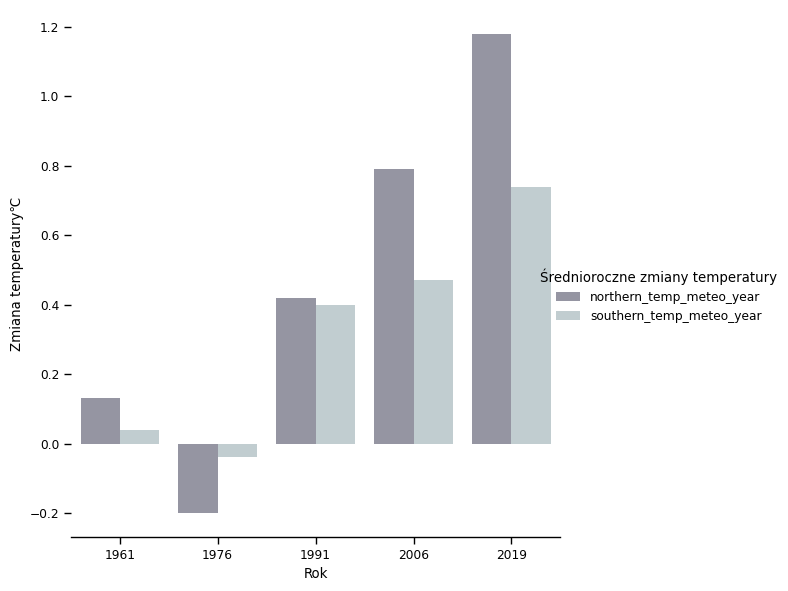

In [139]:
Hemispheres_1

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=Hemispheres_1, kind="bar",
    x="Year", y="Temperature", hue="Season",
    palette="bone", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Rok", "Zmiana temperatury\u2103")
g.legend.set_title("Średnioroczne zmiany temperatury")

In[ ]:

### Climatic zones

#### DataFrame with temperature change

In [11]:
climatic_zone = pd.read_csv('climatic_zones.csv')
climatic_zone

Strefa   1961   1962   1963   1964   1965   1966   1967  \
0     A_okołobiegunowa (N) -0.150  0.440 -0.160 -0.660 -0.280 -0.760  0.360   
1        B_umiarkowana (N)  0.380  0.310  0.310 -0.200 -0.240 -0.190  0.260   
2     C_podzwrotnikowa (N)  0.200  0.200  0.190 -0.140 -0.150  0.050 -0.030   
3        D_zwrotnikowa (N)  0.180  0.140  0.130 -0.120 -0.120  0.080 -0.050   
4              E_równikowa -0.030 -0.050  0.120 -0.140 -0.030  0.080 -0.140   
5        F_zwrotnikowa (S)  0.140  0.090 -0.100 -0.300 -0.230 -0.240 -0.090   
6     G_podzwrotnikowa (S)  0.120  0.050 -0.140 -0.250 -0.190 -0.240 -0.050   
7        H_umiarkowana (S) -0.170 -0.080 -0.170 -0.070 -0.030 -0.140 -0.020   
8     I_okołobiegunowa (S)  0.210 -0.650 -0.030 -0.380 -0.010  0.110  0.300   
9   J_pozostałe_strefy_(N)  0.190  0.240  0.140 -0.230 -0.190 -0.140  0.120   
10  K_pozostałe_strefy_(S)  0.050 -0.080 -0.120 -0.240 -0.130 -0.150 -0.010   

     1968   1969  ...  2010  2011  2012  2013  2014   2015  2016  2017  2018  \
0  -0.330 -0.040  ... 2.210 2.340 2.200 1.540 2.020  2.000 3.230 2.500 2.130   
1  -0.020 -0.610  ... 0.860 0.930 0.920 1.040 1.140  1.480 1.430 1.380 1.090   
2  -0.050 -0.200  ... 0.740 0.580 0.740 0.750 0.780  1.170 1.200 1.150 1.060   
3  -0.090 -0.170  ... 0.740 0.580 0.740 0.690 0.730  0.990 1.070 1.030 1.050   
4  -0.070  0.330  ... 0.690 0.370 0.530 0.580 0.670  0.960 1.020 0.820 0.680   
5  -0.140  0.000  ... 0.630 0.640 0.560 0.630 0.730  0.750 0.670 0.760 0.800   
6  -0.090  0.000  ... 0.630 0.640 0.560 0.590 0.700  0.690 0.600 0.760 0.950   
7   0.000  0.130  ... 0.200 0.180 0.190 0.220 0.180  0.180 0.250 0.350 0.370   
8  -0.080 -0.140  ... 0.500 1.090 0.420 0.860 0.560 -0.300 0.400 0.550 0.970   
9  -0.110 -0.290  ... 1.020 0.980 1.040 0.940 1.070  1.310 1.540 1.380 1.240   
10 -0.080  0.020  ... 0.480 0.560 0.420 0.540 0.520  0.410 0.490 0.600 0.690   

    2019  
0  2.700  
1  1.430  
2  1.030  
3  0.990  
4  0.900  
5  0.750  
6  0.650  
7  0.390  
8  0.860  
9  1.410  
10 0.650  

[11 rows x 60 columns]

In [12]:
climatic_zone_temp = pd.melt(climatic_zone, id_vars='Strefa')
climatic_zone_temp = climatic_zone_temp.rename(columns={'variable': 'Year','value': 'Temperature'})
climatic_zone_temp = climatic_zone_temp.sort_values(by=['Strefa', 'Year'])
climatic_zone_temp

Strefa  Year  Temperature
0      A_okołobiegunowa (N)  1961       -0.150
11     A_okołobiegunowa (N)  1962        0.440
22     A_okołobiegunowa (N)  1963       -0.160
33     A_okołobiegunowa (N)  1964       -0.660
44     A_okołobiegunowa (N)  1965       -0.280
..                      ...   ...          ...
604  K_pozostałe_strefy_(S)  2015        0.410
615  K_pozostałe_strefy_(S)  2016        0.490
626  K_pozostałe_strefy_(S)  2017        0.600
637  K_pozostałe_strefy_(S)  2018        0.690
648  K_pozostałe_strefy_(S)  2019        0.650

[649 rows x 3 columns]

In [13]:
climatic_zone_temp.Year = pd.to_numeric(climatic_zone_temp.Year)

In [14]:
climatic_zone_temp_1 = climatic_zone_temp[((climatic_zone_temp.Strefa == 'A_okołobiegunowa (N)') & (climatic_zone_temp.Year == 1961))
                            | ((climatic_zone_temp.Strefa == 'B_umiarkowana (N)') & (climatic_zone_temp.Year == 1961))
                            | ((climatic_zone_temp.Strefa == 'C_podzwrotnikowa (N)') & (climatic_zone_temp.Year == 1961))
                            | ((climatic_zone_temp.Strefa == 'D_zwrotnikowa (N)') & (climatic_zone_temp.Year == 1961))
                            | ((climatic_zone_temp.Strefa == 'E_równikowa') & (climatic_zone_temp.Year == 1961))
                            | ((climatic_zone_temp.Strefa == 'F_zwrotnikowa (S)') & (climatic_zone_temp.Year == 1961))
                            | ((climatic_zone_temp.Strefa == 'G_podzwrotnikowa (S)') & (climatic_zone_temp.Year == 1961))
                            | ((climatic_zone_temp.Strefa == 'H_umiarkowana (S)') & (climatic_zone_temp.Year == 1961))
                            | ((climatic_zone_temp.Strefa == 'I_okołobiegunowa (S)') & (climatic_zone_temp.Year == 1961))
                            | ((climatic_zone_temp.Strefa == 'A_okołobiegunowa (N)') & (climatic_zone_temp.Year == 1976))
                            | ((climatic_zone_temp.Strefa == 'B_umiarkowana (N)') & (climatic_zone_temp.Year == 1976))
                            | ((climatic_zone_temp.Strefa == 'C_podzwrotnikowa (N)') & (climatic_zone_temp.Year == 1976))
                            | ((climatic_zone_temp.Strefa == 'D_zwrotnikowa (N)') & (climatic_zone_temp.Year == 1976))
                            | ((climatic_zone_temp.Strefa == 'E_równikowa') & (climatic_zone_temp.Year == 1976))
                            | ((climatic_zone_temp.Strefa == 'F_zwrotnikowa (S)') & (climatic_zone_temp.Year == 1976))
                            | ((climatic_zone_temp.Strefa == 'G_podzwrotnikowa (S)') & (climatic_zone_temp.Year == 1976))
                            | ((climatic_zone_temp.Strefa == 'H_umiarkowana (S)') & (climatic_zone_temp.Year == 1976))
                            | ((climatic_zone_temp.Strefa == 'I_okołobiegunowa (S)') & (climatic_zone_temp.Year == 1976))
                            | ((climatic_zone_temp.Strefa == 'A_okołobiegunowa (N)') & (climatic_zone_temp.Year == 1991))
                            | ((climatic_zone_temp.Strefa == 'B_umiarkowana (N)') & (climatic_zone_temp.Year == 1991))
                            | ((climatic_zone_temp.Strefa == 'C_podzwrotnikowa (N)') & (climatic_zone_temp.Year == 1991))
                            | ((climatic_zone_temp.Strefa == 'D_zwrotnikowa (N)') & (climatic_zone_temp.Year == 1991))
                            | ((climatic_zone_temp.Strefa == 'E_równikowa') & (climatic_zone_temp.Year == 1991))
                            | ((climatic_zone_temp.Strefa == 'F_zwrotnikowa (S)') & (climatic_zone_temp.Year == 1991))
                            | ((climatic_zone_temp.Strefa == 'G_podzwrotnikowa (S)') & (climatic_zone_temp.Year == 1991))
                            | ((climatic_zone_temp.Strefa == 'H_umiarkowana (S)') & (climatic_zone_temp.Year == 1991))
                            | ((climatic_zone_temp.Strefa == 'I_okołobiegunowa (S)') & (climatic_zone_temp.Year == 1991))
                            | ((climatic_zone_temp.Strefa == 'A_okołobiegunowa (N)') & (climatic_zone_temp.Year == 2006))
                            | ((climatic_zone_temp.Strefa == 'B_umiarkowana (N)') & (climatic_zone_temp.Year == 2006))
                            | ((climatic_zone_temp.Strefa == 'C_podzwrotnikowa (N)') & (climatic_zone_temp.Year == 2006))
                            | ((climatic_zone_temp.Strefa == 'D_zwrotnikowa (N)') & (climatic_zone_temp.Year == 2006))
                            | ((climatic_zone_temp.Strefa == 'E_równikowa') & (climatic_zone_temp.Year == 2006))
                            | ((climatic_zone_temp.Strefa == 'F_zwrotnikowa (S)') & (climatic_zone_temp.Year == 2006))
                            | ((climatic_zone_temp.Strefa == 'G_podzwrotnikowa (S)') & (climatic_zone_temp.Year == 2006))
                            | ((climatic_zone_temp.Strefa == 'H_umiarkowana (S)') & (climatic_zone_temp.Year == 2006))
                            | ((climatic_zone_temp.Strefa == 'I_okołobiegunowa (S)') & (climatic_zone_temp.Year == 2006))
                            | ((climatic_zone_temp.Strefa == 'A_okołobiegunowa (N)') & (climatic_zone_temp.Year == 2019))
                            | ((climatic_zone_temp.Strefa == 'B_umiarkowana (N)') & (climatic_zone_temp.Year == 2019))
                            | ((climatic_zone_temp.Strefa == 'C_podzwrotnikowa (N)') & (climatic_zone_temp.Year == 2019))
                            | ((climatic_zone_temp.Strefa == 'D_zwrotnikowa (N)') & (climatic_zone_temp.Year == 2019))
                            | ((climatic_zone_temp.Strefa == 'E_równikowa') & (climatic_zone_temp.Year == 2019))
                            | ((climatic_zone_temp.Strefa == 'F_zwrotnikowa (S)') & (climatic_zone_temp.Year == 2019))
                            | ((climatic_zone_temp.Strefa == 'G_podzwrotnikowa (S)') & (climatic_zone_temp.Year == 2019))
                            | ((climatic_zone_temp.Strefa == 'H_umiarkowana (S)') & (climatic_zone_temp.Year == 2019))
                            | ((climatic_zone_temp.Strefa == 'I_okołobiegunowa (S)') & (climatic_zone_temp.Year == 2019))]

Climatic_zone_temp_2=climatic_zone_temp_1.sort_values(ascending = True, by= ['Strefa'])                                     
Climatic_zone_temp_2


Strefa  Year  Temperature
0    A_okołobiegunowa (N)  1961       -0.150
165  A_okołobiegunowa (N)  1976       -0.070
330  A_okołobiegunowa (N)  1991        0.750
495  A_okołobiegunowa (N)  2006        1.730
638  A_okołobiegunowa (N)  2019        2.700
1       B_umiarkowana (N)  1961        0.380
166     B_umiarkowana (N)  1976       -0.320
331     B_umiarkowana (N)  1991        0.660
496     B_umiarkowana (N)  2006        1.050
639     B_umiarkowana (N)  2019        1.430
640  C_podzwrotnikowa (N)  2019        1.030
497  C_podzwrotnikowa (N)  2006        0.800
2    C_podzwrotnikowa (N)  1961        0.200
167  C_podzwrotnikowa (N)  1976       -0.300
332  C_podzwrotnikowa (N)  1991        0.320
3       D_zwrotnikowa (N)  1961        0.180
168     D_zwrotnikowa (N)  1976       -0.280
333     D_zwrotnikowa (N)  1991        0.260
498     D_zwrotnikowa (N)  2006        0.700
641     D_zwrotnikowa (N)  2019        0.990
642           E_równikowa  2019        0.900
499           E_równikowa  2006        0.560
334           E_równikowa  1991        0.360
169           E_równikowa  1976       -0.110
4             E_równikowa  1961       -0.030
5       F_zwrotnikowa (S)  1961        0.140
170     F_zwrotnikowa (S)  1976        0.100
335     F_zwrotnikowa (S)  1991        0.310
500     F_zwrotnikowa (S)  2006        0.510
643     F_zwrotnikowa (S)  2019        0.750
644  G_podzwrotnikowa (S)  2019        0.650
336  G_podzwrotnikowa (S)  1991        0.300
501  G_podzwrotnikowa (S)  2006        0.480
6    G_podzwrotnikowa (S)  1961        0.120
171  G_podzwrotnikowa (S)  1976        0.190
7       H_umiarkowana (S)  1961       -0.170
172     H_umiarkowana (S)  1976        0.220
337     H_umiarkowana (S)  1991        0.290
502     H_umiarkowana (S)  2006        0.190
645     H_umiarkowana (S)  2019        0.390
503  I_okołobiegunowa (S)  2006        0.410
8    I_okołobiegunowa (S)  1961        0.210
173  I_okołobiegunowa (S)  1976       -0.240
338  I_okołobiegunowa (S)  1991        0.950
646  I_okołobiegunowa (S)  2019        0.860

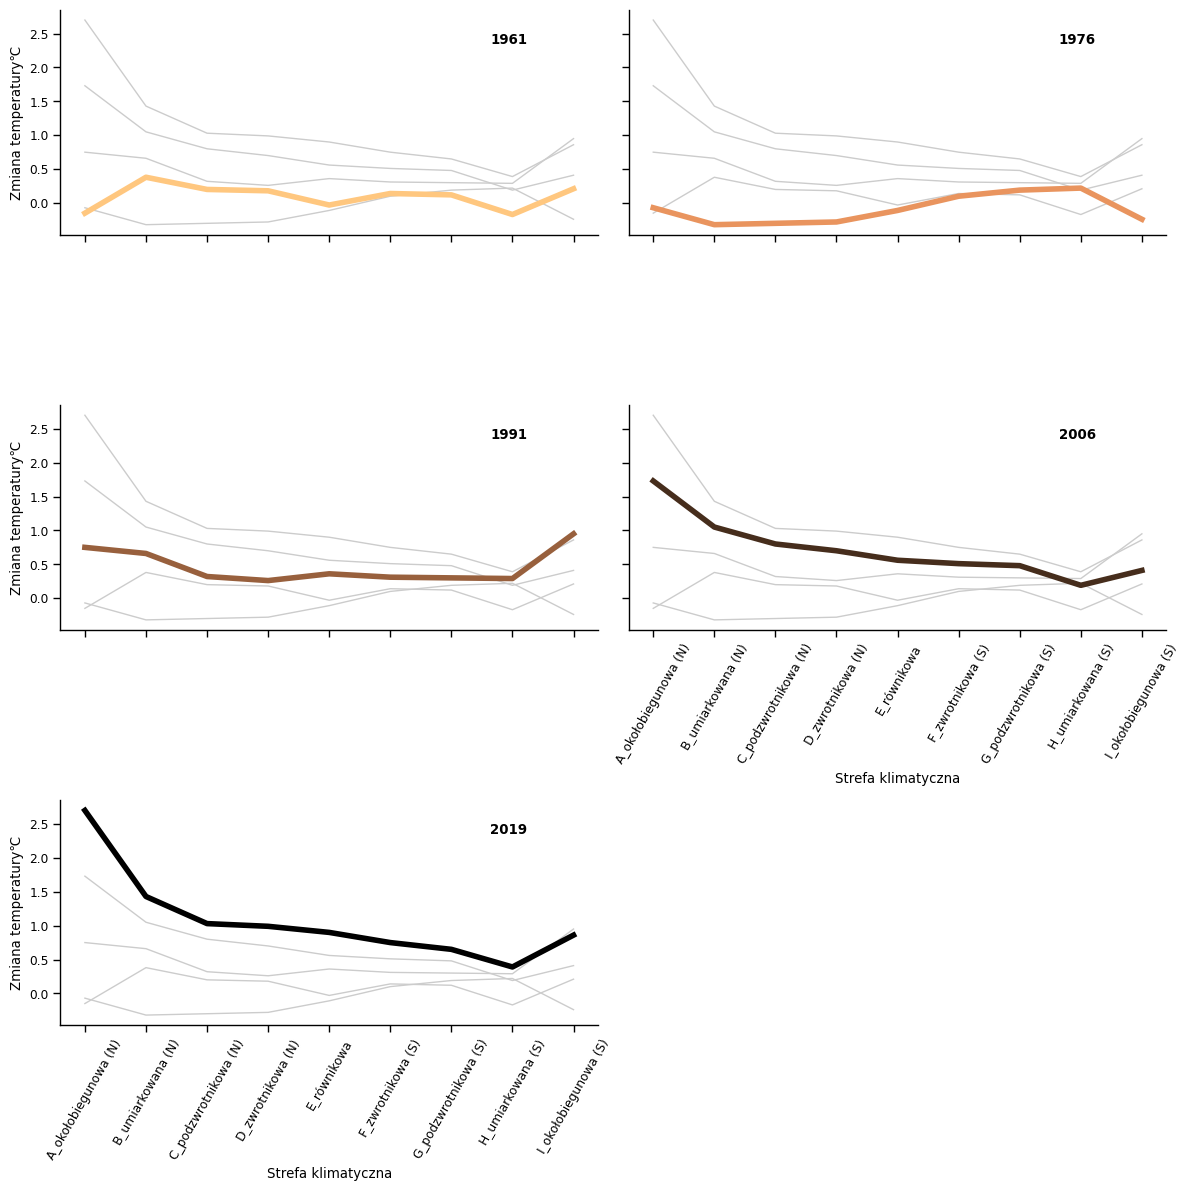

In [146]:
Climatic_zone_temp_2

# Plot each year's time series in its own facet
g = sns.relplot(
    data=Climatic_zone_temp_2,
    x="Strefa", y="Temperature", col="Year", hue="Year",
    kind="line", palette="copper_r", linewidth=4, zorder=5,
    col_wrap=2, height=4, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=Climatic_zone_temp_2, x="Strefa", y="Temperature", units="Year",
        estimator=None, color=".8", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::1])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("Strefa klimatyczna", "Zmiana temperatury\u2103")
g.set_xticklabels(rotation=60)
g.tight_layout()

In[ ]:

##### Comparing climatic zones

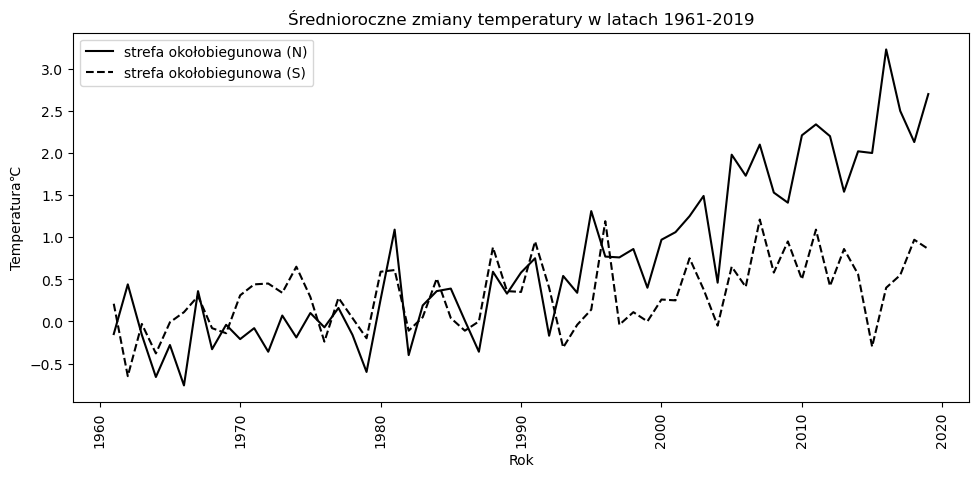

In [66]:
ob_zone_A = climatic_zone_temp[(climatic_zone_temp.Strefa == 'A_okołobiegunowa (N)')]
ob_zone_I = climatic_zone_temp[(climatic_zone_temp.Strefa == 'I_okołobiegunowa (S)')]

plt.plot(ob_zone_A.Year, ob_zone_A.Temperature,'k-', label = 'strefa okołobiegunowa (N)')
plt.plot(ob_zone_I.Year, ob_zone_I.Temperature, 'k--', label = 'strefa okołobiegunowa (S)')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('Rok')
plt.ylabel('Temperatura\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.show()

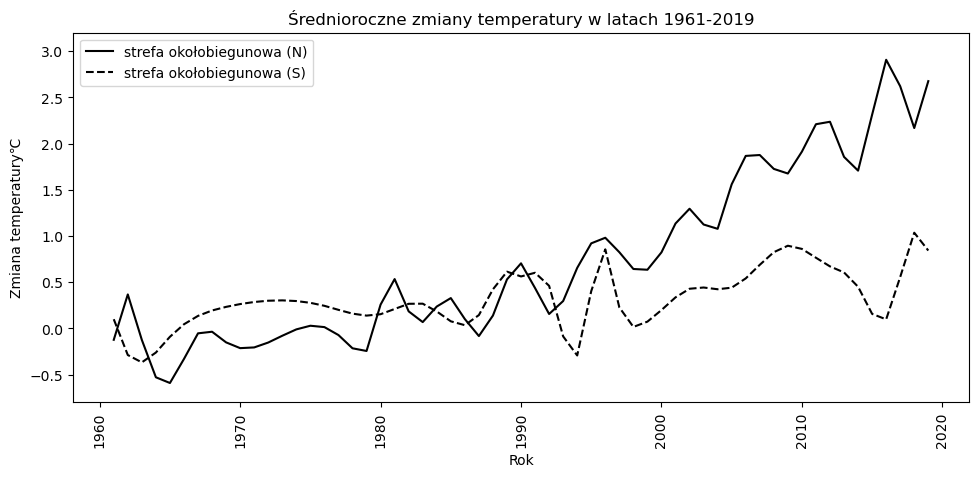

In [19]:
x1=climatic_zone_temp.Year.unique()
x1 = x1.astype(np.int64)

y1_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'A_okołobiegunowa (N)'].iloc[:,2].values.T
y2_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'I_okołobiegunowa (S)'].iloc[:,2].values.T
bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 

bspl2 = splrep(x1, y2_temp, s=4)
bspl_y2 = splev(x1, bspl2)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'k-', label = 'strefa okołobiegunowa (N)')
plt.plot(x1, bspl_y2, 'k--', label = 'strefa okołobiegunowa (S)')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Zmiana temperatury\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.ylim(-0.8, 3.2)
plt.show()


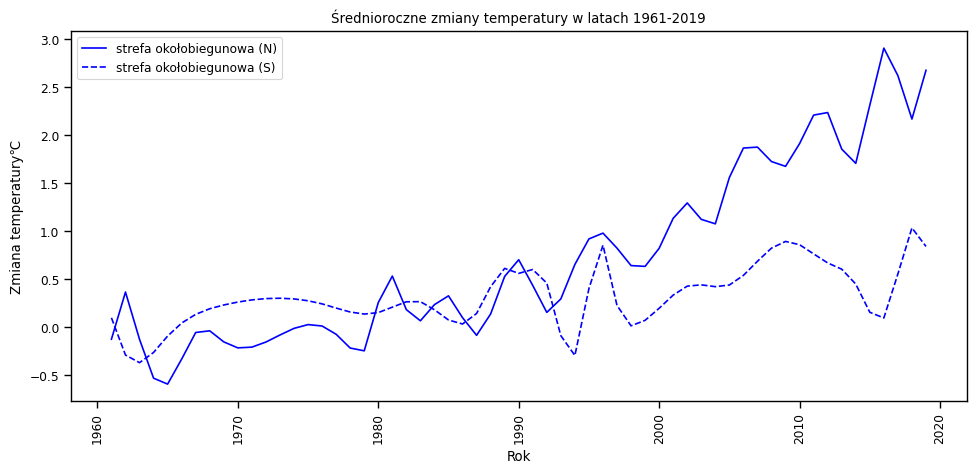

In [149]:
x1=climatic_zone_temp.Year.unique()
x1 = x1.astype(np.int64)

y1_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'A_okołobiegunowa (N)'].iloc[:,2].values.T
y2_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'I_okołobiegunowa (S)'].iloc[:,2].values.T
bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 

bspl2 = splrep(x1, y2_temp, s=4)
bspl_y2 = splev(x1, bspl2)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'b-', label = 'strefa okołobiegunowa (N)')
plt.plot(x1, bspl_y2, 'b--', label = 'strefa okołobiegunowa (S)')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Zmiana temperatury\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.show()

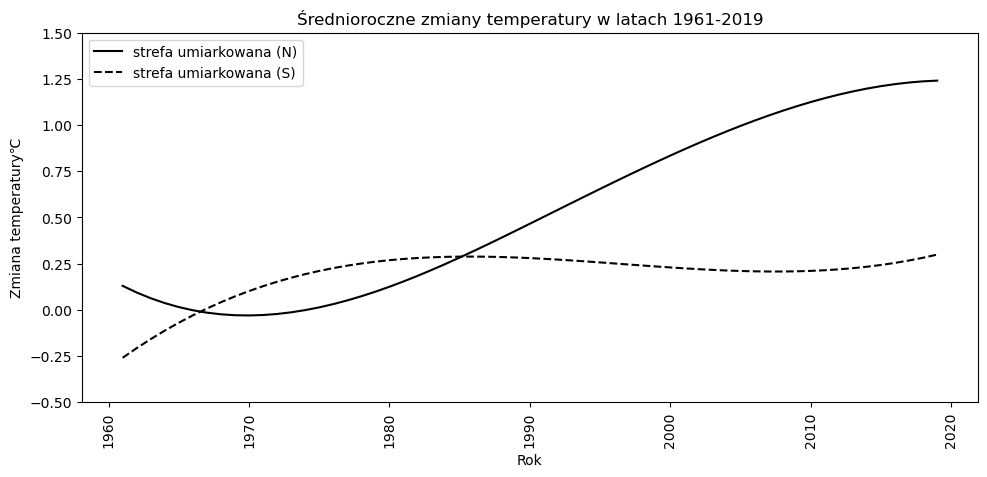

In [20]:
x1=climatic_zone_temp.Year.unique()
x1 = x1.astype(np.int64)

y1_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'B_umiarkowana (N)'].iloc[:,2].values.T
y2_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'H_umiarkowana (S)'].iloc[:,2].values.T
bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 

bspl2 = splrep(x1, y2_temp, s=4)
bspl_y2 = splev(x1, bspl2)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'k-', label = 'strefa umiarkowana (N)')
plt.plot(x1, bspl_y2, 'k--', label = 'strefa umiarkowana (S)')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Zmiana temperatury\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.ylim(-0.5, 1.5)
plt.show()

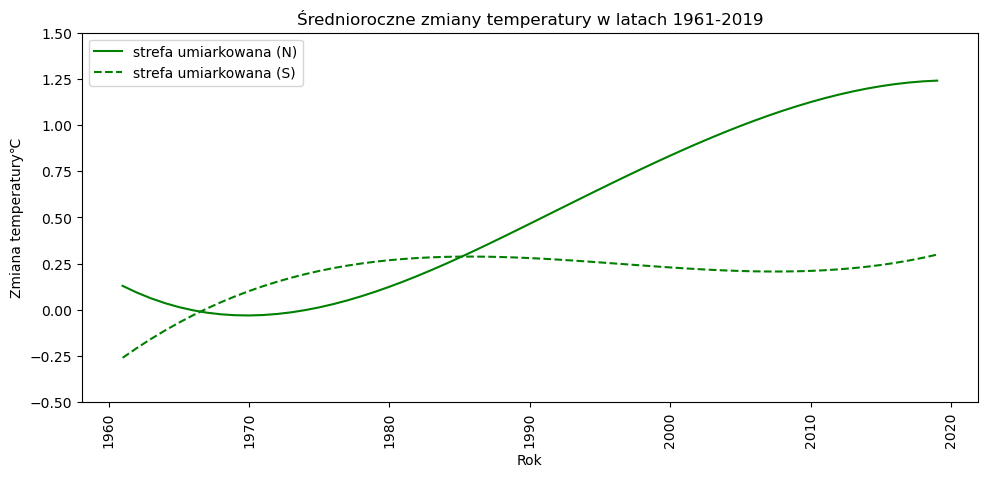

In [21]:
x1=climatic_zone_temp.Year.unique()
x1 = x1.astype(np.int64)

y1_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'B_umiarkowana (N)'].iloc[:,2].values.T
y2_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'H_umiarkowana (S)'].iloc[:,2].values.T
bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 

bspl2 = splrep(x1, y2_temp, s=4)
bspl_y2 = splev(x1, bspl2)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'g-', label = 'strefa umiarkowana (N)')
plt.plot(x1, bspl_y2, 'g--', label = 'strefa umiarkowana (S)')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Zmiana temperatury\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.ylim(-0.5, 1.5)
plt.show()

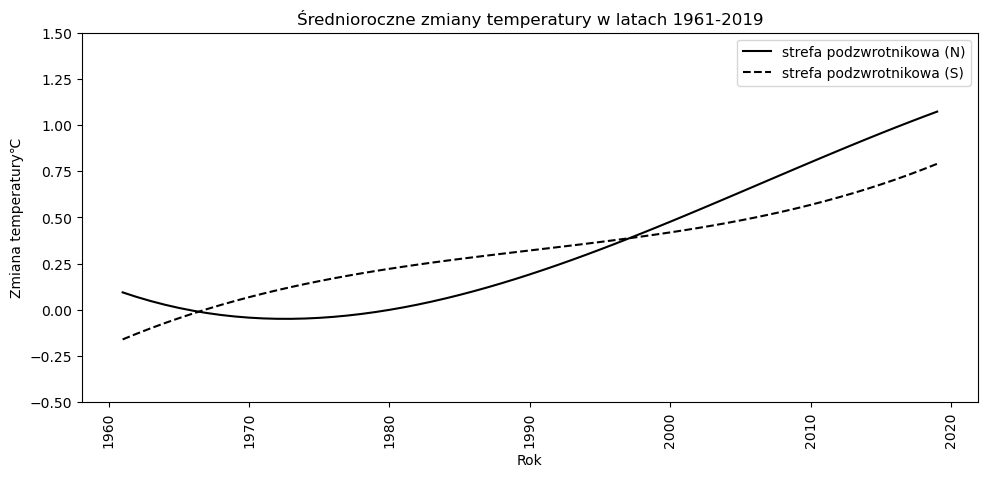

In [22]:
x1=climatic_zone_temp.Year.unique()
x1 = x1.astype(np.int64)

y1_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'C_podzwrotnikowa (N)'].iloc[:,2].values.T
y2_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'G_podzwrotnikowa (S)'].iloc[:,2].values.T
bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 

bspl2 = splrep(x1, y2_temp, s=4)
bspl_y2 = splev(x1, bspl2)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'k-', label = 'strefa podzwrotnikowa (N)')
plt.plot(x1, bspl_y2, 'k--', label = 'strefa podzwrotnikowa (S)')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Zmiana temperatury\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.ylim(-0.5, 1.5)
plt.show()

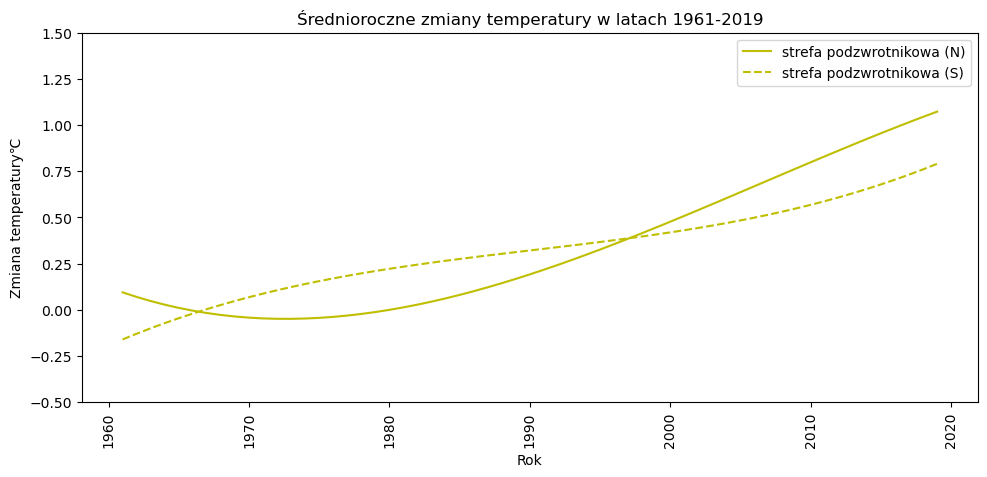

In [23]:
x1=climatic_zone_temp.Year.unique()
x1 = x1.astype(np.int64)

y1_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'C_podzwrotnikowa (N)'].iloc[:,2].values.T
y2_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'G_podzwrotnikowa (S)'].iloc[:,2].values.T
bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 

bspl2 = splrep(x1, y2_temp, s=4)
bspl_y2 = splev(x1, bspl2)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'y-', label = 'strefa podzwrotnikowa (N)')
plt.plot(x1, bspl_y2, 'y--', label = 'strefa podzwrotnikowa (S)')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Zmiana temperatury\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.ylim(-0.5, 1.5)
plt.show()

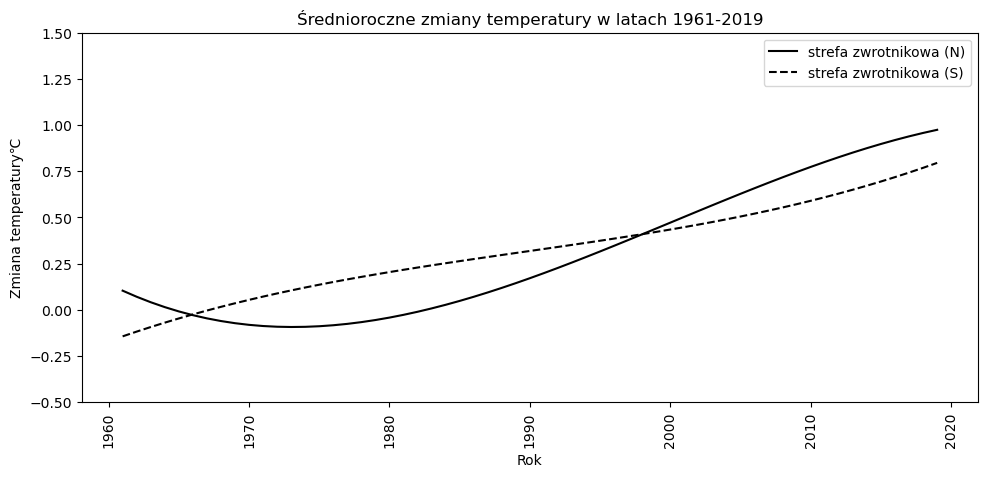

In [24]:
x1=climatic_zone_temp.Year.unique()
x1 = x1.astype(np.int64)

y1_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'D_zwrotnikowa (N)'].iloc[:,2].values.T
y2_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'F_zwrotnikowa (S)'].iloc[:,2].values.T
bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 

bspl2 = splrep(x1, y2_temp, s=4)
bspl_y2 = splev(x1, bspl2)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'k-', label = 'strefa zwrotnikowa (N)')
plt.plot(x1, bspl_y2, 'k--', label = 'strefa zwrotnikowa (S)')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Zmiana temperatury\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.ylim(-0.5, 1.5)
plt.show()

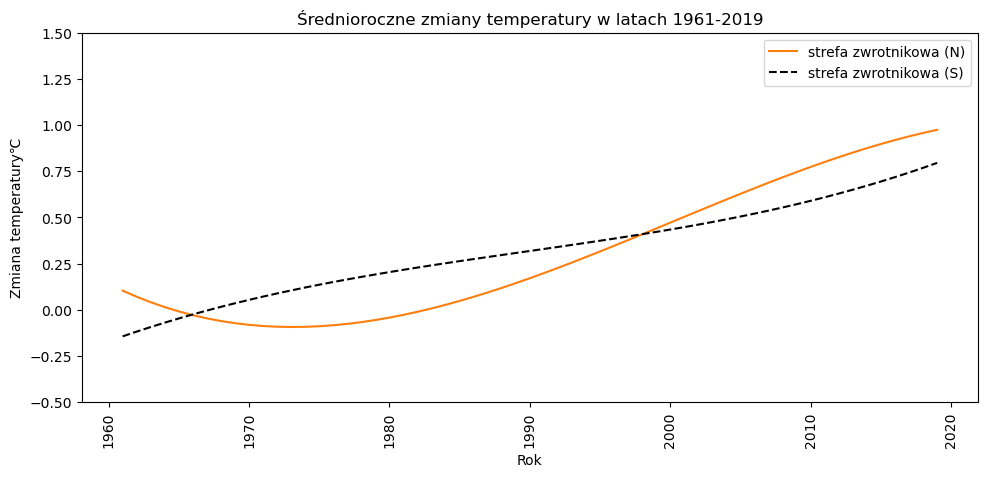

In [28]:
x1=climatic_zone_temp.Year.unique()
x1 = x1.astype(np.int64)

y1_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'D_zwrotnikowa (N)'].iloc[:,2].values.T
y2_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'F_zwrotnikowa (S)'].iloc[:,2].values.T
bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 

bspl2 = splrep(x1, y2_temp, s=4)
bspl_y2 = splev(x1, bspl2)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'tab:orange', label = 'strefa zwrotnikowa (N)')
plt.plot(x1, bspl_y2, 'k--',label = 'strefa zwrotnikowa (S)')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Zmiana temperatury\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.ylim(-0.5, 1.5)
plt.legend()
plt.show()

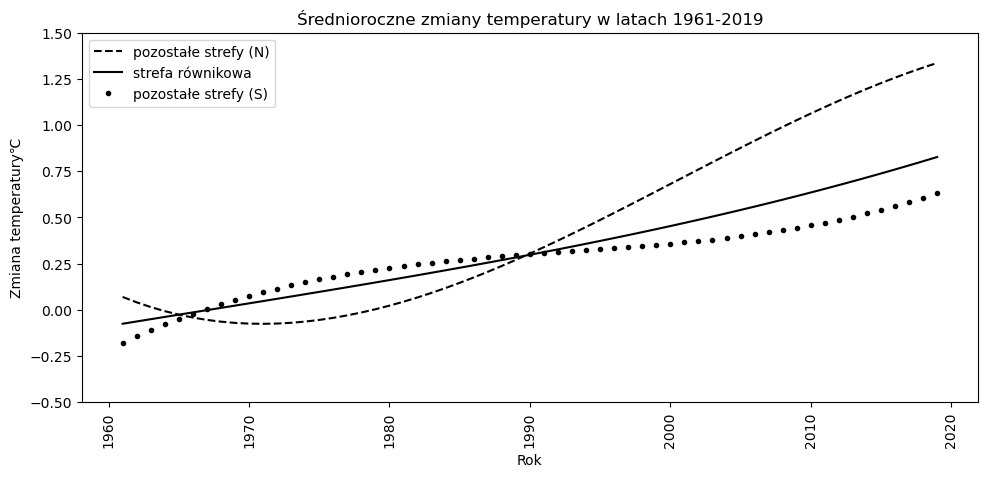

In [26]:
x1=climatic_zone_temp.Year.unique()
x1 = x1.astype(np.int64)

y1_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'J_pozostałe_strefy_(N)'].iloc[:,2].values.T
y2_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'E_równikowa'].iloc[:,2].values.T
y3_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'K_pozostałe_strefy_(S)'].iloc[:,2].values.T
bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 

bspl2 = splrep(x1, y2_temp, s=4)
bspl_y2 = splev(x1, bspl2)

bspl3 = splrep(x1, y3_temp, s=4)
bspl_y3 = splev(x1, bspl3)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'k--', label = 'pozostałe strefy (N)')
plt.plot(x1, bspl_y2, 'k-', label = 'strefa równikowa')
plt.plot(x1, bspl_y3, 'k.', label = 'pozostałe strefy (S)')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Zmiana temperatury\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.ylim(-0.5, 1.5)
plt.show()

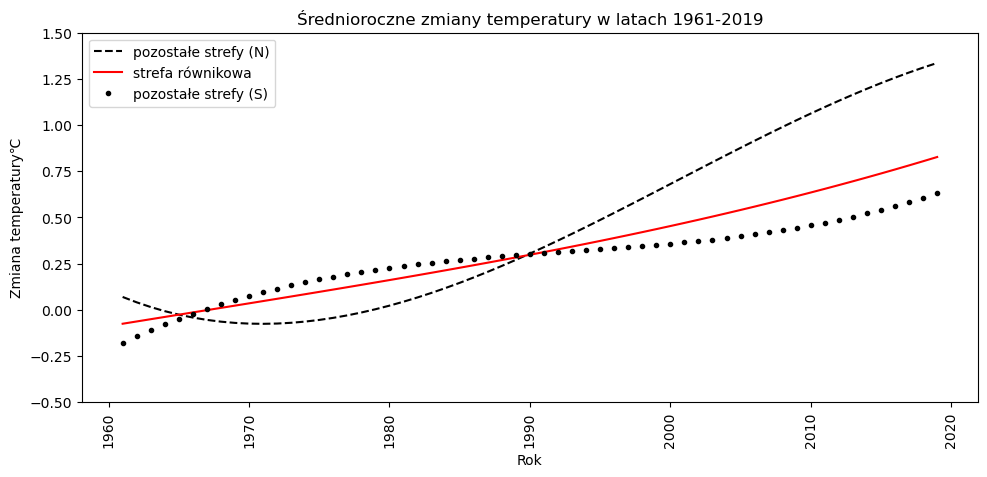

In [27]:
x1=climatic_zone_temp.Year.unique()
x1 = x1.astype(np.int64)

y1_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'J_pozostałe_strefy_(N)'].iloc[:,2].values.T
y2_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'E_równikowa'].iloc[:,2].values.T
y3_temp = climatic_zone_temp[climatic_zone_temp.Strefa == 'K_pozostałe_strefy_(S)'].iloc[:,2].values.T
bspl1 = splrep(x1, y1_temp, s=4)
bspl_y1 = splev(x1, bspl1) 

bspl2 = splrep(x1, y2_temp, s=4)
bspl_y2 = splev(x1, bspl2)

bspl3 = splrep(x1, y3_temp, s=4)
bspl_y3 = splev(x1, bspl3)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(x1, bspl_y1, 'k--', label = 'pozostałe strefy (N)')
plt.plot(x1, bspl_y2, 'r-', label = 'strefa równikowa')
plt.plot(x1, bspl_y3, 'k.', label = 'pozostałe strefy (S)')
plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5) 
plt.xlabel('Rok')
plt.ylabel('Zmiana temperatury\u2103')
plt.title('Średnioroczne zmiany temperatury w latach 1961-2019')
plt.legend()
plt.ylim(-0.5, 1.5)
plt.show()

In[ ]:

In[ ]:

#### URSULA

In[ ]:

Making individual variable for group purpose working

In[ ]:

In [ ]:
urs = df.copy()

In[ ]: